In [51]:
## F1 practice and grid data from 2003 to 2024. 

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_style
set_style("whitegrid")

import pandas as pd
import numpy as np
import math
import requests
from bs4 import BeautifulSoup

In [53]:
## Put all the possible years in a list.
url = 'https://pitwall.app/races'
html = requests.get(url)
soup = BeautifulSoup(html.text, 'html.parser')
ul = soup.find('ul', attrs = {'class':'options'})
possible_years = [x.text for x in ul.find_all('a')]

In [54]:
## Define a function that converts minutes to seconds.
def convert(t):
    if ':' in t:
        sec_from_min = float(t.split(':')[0]) * 60
        sec = float(t.split(':')[1])
        return sec_from_min + sec
    else:
        return float(t)

In [80]:
F1 = pd.DataFrame(columns=['Season',
                               'Grand Prix',
                               'Driver',
                               'Constructor',
                               'FP1 Time','FP1 Gap','FP1 Laps',
                               'FP2 Time','FP2 Gap','FP2 Laps',
                               'FP3 Time','FP3 Gap','FP3 Laps',
                               'Grid Position', 'Qualifying Time'])

## You can slice possible_years
for year in possible_years[:22]:
    url = 'https://pitwall.app/races/archive/' + year
    html = requests.get(url)
    soup = BeautifulSoup(html.text, 'html.parser')
    tbody = soup.find('tbody')
    possible_races = [x['href'] for x in tbody.find_all('a')]

    ## You can slice possible races
    for race in possible_races:
        url = 'https://pitwall.app/races/' + year + race[11:]
        html = requests.get(url)
        soup = BeautifulSoup(html.text, 'html.parser')
        print('')
        print('working on', race)
        print('')
        
        ### Get the Free Practice data ###
        
        ## Get FP1
        FP1 = soup.find('div', attrs = {'id':'free_practice_1'})
        data_1 = []
        if FP1 != None:
            FP1_table = FP1.find('table', attrs = {'class':'data-table'})
            body = FP1_table.find('tbody')
            rows_1 = body.find_all('tr')
            data_1 = []
            for row in rows_1:
                row_data = []
                for cell in row.find_all('td')[1:]:
                    row_data.append(cell.text)
                ## Name
                name = row_data[0].split(' ')[2]
                row_data[0] = name
                ## Time
                if row_data[2] != '':
                    row_data[2] = round(convert(row_data[2]), 3)
                else:
                    row_data[2] = np.nan
                ## Gap
                if row_data[3] == '':
                    row_data[3] = 0 
                else:
                    if row_data[3] != '':
                        row_data[3] = float(convert(row_data[3].replace('+','')))
                    else:
                        row_data[3] = np.nan
                ## Lap
                if row_data[4] != '':
                    row_data[4] = float(row_data[4])
                else:
                    row_data[4] = np.nan
                data_1.append(row_data)
            print(data_1)
            print('')
        else:
            print('FP1 does not exists')
            print('')
        
        ## Get FP2
        FP2 = soup. find('div', attrs = {'id':'free_practice_2'}) 
        data_2 = []
        if FP2 != None:
            FP2_table = FP2.find('table', attrs = {'class':'data-table'})
            body = FP2_table.find('tbody')
            rows_2 = body.find_all('tr')
            for row in rows_2:
                row_data = []
                for cell in row.find_all('td')[1:]:
                    row_data.append(cell.text)
                ## Name
                name = row_data[0].split(' ')[2]
                row_data[0] = name
                ## Time
                if row_data[2] != '':
                    row_data[2] = round(convert(row_data[2]), 3)
                else:
                    row_data[2] = np.nan
                ## Gap
                if row_data[3] == '':
                    row_data[3] = 0 
                else:
                    if row_data[3] != '':
                        row_data[3] = float(convert(row_data[3].replace('+','')))
                    else:
                        row_data[3] = np.nan
                ## Lap
                if row_data[4] != '':
                    row_data[4] = float(row_data[4])
                else:
                    row_data[4] = np.nan
                data_2.append(row_data)
            print(data_2)    
            print('')
            ## Update data_1
            for row in data_1:
                if row[0] in [x[0] for x in data_2]:
                    index = [x[0] for x in data_2].index(row[0])
                    for i in data_2[index][2:]:
                        row.append(i)
                else:
                    row = [y for x in [row, [np.nan, np.nan, np.nan]] for y in x]
        else:
            print('FP2 does not exists')
            print('')
        
        ## Get FP3
        FP3 = soup.find('div', attrs = {'id':'free_practice_3'})
        data_3 = []
        if FP3 != None:
            FP3_table = FP3.find('table', attrs = {'class':'data-table'})
            body = FP3_table.find('tbody')
            rows_3 = body.find_all('tr')
            for row in rows_3:
                row_data = []
                for cell in row.find_all('td')[1:]:
                        row_data.append(cell.text)
                ## Name
                name = row_data[0].split(' ')[2]
                row_data[0] = name
                ## Time
                if row_data[2] != '':
                    row_data[2] = round(convert(row_data[2]), 3)
                else:
                    row_data[2] = np.nan
                ## Gap
                if row_data[3] == '':
                    row_data[3] = 0 
                else:
                    if row_data[3] != '':
                        row_data[3] = float(convert(row_data[3].replace('+','')))
                    else:
                        row_data[3] = np.nan
                ## Lap
                if row_data[4] != '':
                    row_data[4] = float(row_data[4])
                else:
                    row_data[4] = np.nan
                data_3.append(row_data)
            print(data_3)
            print('')
            ## Update data_1
            for row in data_1:
                if row[0] in [x[0] for x in data_3]:
                    index = [x[0] for x in data_3].index(row[0])
                    for i in data_3[index][2:]:
                        row.append(i)
                else:
                    row = [y for x in [row, [np.nan, np.nan, np.nan]] for y in x]
        else:
            print('FP3 does not exists')
            print('')
        
        ### Get the Starting grid ###
        grid = soup.find('div', attrs = {'id':'qualifying'})
        if grid != None:
            grid_table = grid.find('table', attrs = {'class':'data-table'})
            body = grid_table.find('tbody')
            rows_grid = body.find_all('tr')
            row_data_names = []
            row_data_times = []
            
            for row in rows_grid:
                for cell in row.find_all('td')[1:2]:
                    name = cell.text
                    row_data_names.append(name)
            
            row_data_names = [x.split(' ')[2] for x in row_data_names]
            
            for row in rows_grid:
                for cell in row.find_all('td')[4:5]:
                    time = cell.text
                    if time == '':
                        row_data_times.append(np.nan)
                    else:
                        row_data_times.append(time)
#             row_data_times = [round(convert(x), 3) for x in row_data_times] 
            
            ## Update data_1
            for row in data_1:
                if row[0] in row_data_names:
                    index = row_data_names.index(row[0])
                    row.append(index + 1)
                else:
                    row.append(np.nan)
                if row[0] in row_data_names:
                    index = row_data_names.index(row[0])
                    row.append(row_data_times[index]) 
                else:
                    row.append(np.nan)    
        else:
            print('Grid does not exist')
            print('')
            
        
        ### Update the data frame ###
        if (FP1 != None) and (FP2 != None) and (FP3 != None) and (grid != None):
            ## Make clean dataframes for the current race and year.
            L = [year, race[12:]]
            data_1 = [L + x for x in data_1]
            df = pd.DataFrame(data_1, columns=['Season',
                                   'Grand Prix',
                                   'Driver',
                                   'Constructor',
                                   'FP1 Time','FP1 Gap','FP1 Laps',
                                   'FP2 Time','FP2 Gap','FP2 Laps',
                                   'FP3 Time','FP3 Gap','FP3 Laps',
                                   'Grid Position', 'Qualifying Time'])
            F1 = pd.concat([F1, df])
            


working on /races/2023-bahrain-grand-prix

[['Pérez', 'Red Bull', 92.758, 0, 21.0], ['Alonso', 'Aston Martin', 93.196, 0.438, 22.0], ['Verstappen', 'Red Bull', 93.375, 0.617, 21.0], ['Norris', 'McLaren', 94.165, 1.407, 21.0], ['Leclerc', 'Ferrari', 94.257, 1.499, 17.0], ['Stroll', 'Aston Martin', 94.298, 1.54, 17.0], ['Magnussen', 'Haas', 94.402, 1.644, 20.0], ['Zhou', 'Alfa Romeo', 94.575, 1.817, 18.0], ['Bottas', 'Alfa Romeo', 94.689, 1.931, 20.0], ['Hamilton', 'Mercedes', 94.917, 2.159, 13.0], ['Russell', 'Mercedes', 94.966, 2.208, 20.0], ['Piastri', 'McLaren', 94.997, 2.239, 24.0], ['Tsunoda', 'AlphaTauri', 95.015, 2.257, 20.0], ['Hülkenberg', 'Haas', 95.043, 2.285, 22.0], ['Ocon', 'Alpine', 95.105, 2.347, 20.0], ['de', 'AlphaTauri', 95.402, 2.644, 25.0], ['Gasly', 'Alpine', 95.455, 2.697, 22.0], ['Sargeant', 'Williams', 95.749, 2.991, 24.0], ['Albon', 'Williams', 96.018, 3.26, 15.0], ['Sainz', 'Ferrari', 96.072, 3.314, 21.0]]

[['Alonso', 'Aston Martin', 90.907, 0, 25.0], ['Verst

/var/folders/yd/kp6bpgzj2x5211sc99wjp9z80000gn/T/ipykernel_57516/3916355438.py:218: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  F1 = pd.concat([F1, df])



working on /races/2023-saudi-arabian-grand-prix

[['Verstappen', 'Red Bull', 89.617, 0, 18.0], ['Pérez', 'Red Bull', 90.1, 0.483, 20.0], ['Alonso', 'Aston Martin', 90.315, 0.698, 22.0], ['Stroll', 'Aston Martin', 90.577, 0.96, 20.0], ['Russell', 'Mercedes', 90.771, 1.154, 26.0], ['Hamilton', 'Mercedes', 90.787, 1.17, 26.0], ['Sainz', 'Ferrari', 90.924, 1.307, 23.0], ['Gasly', 'Alpine', 90.949, 1.332, 24.0], ['Albon', 'Williams', 91.03, 1.413, 23.0], ['Tsunoda', 'AlphaTauri', 91.11, 1.493, 25.0], ['Leclerc', 'Ferrari', 91.118, 1.501, 26.0], ['Ocon', 'Alpine', 91.181, 1.564, 22.0], ['de', 'AlphaTauri', 91.45, 1.833, 29.0], ['Piastri', 'McLaren', 91.491, 1.874, 24.0], ['Hülkenberg', 'Haas', 91.552, 1.935, 22.0], ['Magnussen', 'Haas', 91.566, 1.949, 23.0], ['Sargeant', 'Williams', 91.922, 2.305, 26.0], ['Bottas', 'Alfa Romeo', 91.97, 2.353, 25.0], ['Zhou', 'Alfa Romeo', 91.986, 2.369, 22.0], ['Norris', 'McLaren', 92.149, 2.532, 21.0]]

[['Verstappen', 'Red Bull', 89.603, 0, 29.0], ['Alons


working on /races/2023-monaco-grand-prix

[['Sainz', 'Ferrari', 73.372, 0, 26.0], ['Alonso', 'Aston Martin', 73.71, 0.338, 28.0], ['Hamilton', 'Mercedes', 74.035, 0.663, 27.0], ['Pérez', 'Red Bull', 74.038, 0.666, 27.0], ['Leclerc', 'Ferrari', 74.093, 0.721, 24.0], ['Verstappen', 'Red Bull', 74.244, 0.872, 26.0], ['Norris', 'McLaren', 74.467, 1.095, 25.0], ['Ocon', 'Alpine', 74.585, 1.213, 29.0], ['Stroll', 'Aston Martin', 74.653, 1.281, 28.0], ['Albon', 'Williams', 74.666, 1.294, 32.0], ['Bottas', 'Alfa Romeo', 74.718, 1.346, 29.0], ['Magnussen', 'Haas', 74.725, 1.353, 29.0], ['Tsunoda', 'AlphaTauri', 74.82, 1.448, 29.0], ['Gasly', 'Alpine', 74.866, 1.494, 30.0], ['Russell', 'Mercedes', 75.066, 1.694, 24.0], ['de', 'AlphaTauri', 75.083, 1.711, 33.0], ['Piastri', 'McLaren', 75.192, 1.82, 32.0], ['Sargeant', 'Williams', 75.557, 2.185, 30.0], ['Zhou', 'Alfa Romeo', 75.684, 2.312, 25.0], ['Hülkenberg', 'Haas', 75.785, 2.413, 17.0]]

[['Verstappen', 'Red Bull', 72.462, 0, 30.0], ['Leclerc


working on /races/2023-british-grand-prix

[['Verstappen', 'Red Bull', 88.6, 0, 26.0], ['Pérez', 'Red Bull', 89.048, 0.448, 22.0], ['Albon', 'Williams', 89.089, 0.489, 22.0], ['Alonso', 'Aston Martin', 89.268, 0.668, 21.0], ['Leclerc', 'Ferrari', 89.28, 0.68, 25.0], ['Ocon', 'Alpine', 89.319, 0.719, 23.0], ['Sainz', 'Ferrari', 89.357, 0.757, 25.0], ['Norris', 'McLaren', 89.441, 0.841, 25.0], ['Stroll', 'Aston Martin', 89.471, 0.871, 26.0], ['Piastri', 'McLaren', 89.658, 1.058, 16.0], ['de', 'AlphaTauri', 89.691, 1.091, 26.0], ['Hamilton', 'Mercedes', 89.768, 1.168, 23.0], ['Gasly', 'Alpine', 89.828, 1.228, 24.0], ['Russell', 'Mercedes', 89.874, 1.274, 28.0], ['Bottas', 'Alfa Romeo', 90.09, 1.49, 22.0], ['Tsunoda', 'AlphaTauri', 90.092, 1.492, 28.0], ['Sargeant', 'Williams', 90.124, 1.524, 24.0], ['Zhou', 'Alfa Romeo', 90.321, 1.721, 20.0], ['Magnussen', 'Haas', 90.385, 1.785, 21.0], ['Hülkenberg', 'Haas', 90.591, 1.991, 22.0]]

[['Verstappen', 'Red Bull', 88.078, 0, 27.0], ['Sainz', '


working on /races/2023-italian-grand-prix

[['Verstappen', 'Red Bull', 82.657, 0, 31.0], ['Sainz', 'Ferrari', 82.703, 0.046, 28.0], ['Pérez', 'Red Bull', 82.834, 0.177, 30.0], ['Leclerc', 'Ferrari', 82.966, 0.309, 22.0], ['Russell', 'Mercedes', 83.189, 0.532, 28.0], ['Alonso', 'Aston Martin', 83.214, 0.557, 24.0], ['Norris', 'McLaren', 83.241, 0.584, 22.0], ['Hamilton', 'Mercedes', 83.269, 0.612, 26.0], ['Tsunoda', 'AlphaTauri', 83.271, 0.614, 23.0], ['Albon', 'Williams', 83.444, 0.787, 18.0], ['Piastri', 'McLaren', 83.446, 0.789, 24.0], ['Sargeant', 'Williams', 83.661, 1.004, 21.0], ['Lawson', 'AlphaTauri', 83.833, 1.176, 29.0], ['Gasly', 'Alpine', 83.931, 1.274, 26.0], ['Bottas', 'Alfa Romeo', 83.952, 1.295, 17.0], ['Hülkenberg', 'Haas', 84.067, 1.41, 23.0], ['Ocon', 'Alpine', 84.09, 1.433, 26.0], ['Drugovich', 'Aston Martin', 84.14, 1.483, 24.0], ['Magnussen', 'Haas', 84.217, 1.56, 24.0], ['Zhou', 'Alfa Romeo', 84.232, 1.575, 17.0]]

[['Sainz', 'Ferrari', 81.355, 0, 23.0], ['Norris


working on /races/2023-qatar-grand-prix

[['Verstappen', 'Red Bull', 87.428, 0, 26.0], ['Sainz', 'Ferrari', 87.762, 0.334, 27.0], ['Leclerc', 'Ferrari', 87.909, 0.481, 27.0], ['Alonso', 'Aston Martin', 87.919, 0.491, 28.0], ['Pérez', 'Red Bull', 88.016, 0.588, 24.0], ['Tsunoda', 'AlphaTauri', 88.027, 0.599, 28.0], ['Hülkenberg', 'Haas', 88.171, 0.743, 22.0], ['Russell', 'Mercedes', 88.336, 0.908, 28.0], ['Piastri', 'McLaren', 88.38, 0.952, 20.0], ['Norris', 'McLaren', 88.441, 1.013, 24.0], ['Sargeant', 'Williams', 88.55, 1.122, 25.0], ['Albon', 'Williams', 88.59, 1.162, 26.0], ['Hamilton', 'Mercedes', 88.679, 1.251, 26.0], ['Stroll', 'Aston Martin', 88.69, 1.262, 28.0], ['Ocon', 'Alpine', 88.732, 1.304, 25.0], ['Gasly', 'Alpine', 88.821, 1.393, 23.0], ['Bottas', 'Alfa Romeo', 89.041, 1.613, 27.0], ['Zhou', 'Alfa Romeo', 89.106, 1.678, 29.0], ['Lawson', 'AlphaTauri', 89.238, 1.81, 29.0], ['Magnussen', 'Haas', 89.502, 2.074, 26.0]]

FP2 does not exists

FP3 does not exists


working on 


working on /races/2023-abu-dhabi-grand-prix

[['Russell', 'Mercedes', 86.072, 0, 26.0], ['Drugovich', 'Aston Martin', 86.36, 0.288, 26.0], ['Ricciardo', 'AlphaTauri', 86.433, 0.361, 26.0], ['Bottas', 'Alfa Romeo', 86.453, 0.381, 21.0], ['Stroll', 'Aston Martin', 86.631, 0.559, 21.0], ['Piastri', 'McLaren', 86.665, 0.593, 25.0], ['Sainz', 'Ferrari', 86.676, 0.604, 24.0], ['Shwartzman', 'Ferrari', 86.703, 0.631, 25.0], ['Gasly', 'Alpine', 86.72, 0.648, 26.0], ['Tsunoda', 'AlphaTauri', 86.725, 0.653, 27.0], ['Sargeant', 'Williams', 86.742, 0.67, 27.0], ['Vesti', 'Mercedes', 86.815, 0.743, 27.0], ['Doohan', 'Alpine', 86.865, 0.793, 23.0], ['Pourchaire', 'Alfa Romeo', 87.093, 1.021, 20.0], ["O'Ward", 'McLaren', 87.114, 1.042, 23.0], ['Dennis', 'Red Bull', 87.208, 1.136, 24.0], ['Hadjar', 'Red Bull', 87.244, 1.172, 20.0], ["O'Sullivan", 'Williams', 87.46, 1.388, 28.0], ['Magnussen', 'Haas', 87.462, 1.39, 26.0], ['Bearman', 'Haas', 87.569, 1.497, 24.0]]

[['Leclerc', 'Ferrari', 84.809, 0, 16


working on /races/2022-australian-grand-prix

[['Sainz', 'Ferrari', 79.806, 0, 24.0], ['Leclerc', 'Ferrari', 80.377, 0.571, 21.0], ['Pérez', 'Red Bull', 80.399, 0.593, 20.0], ['Verstappen', 'Red Bull', 80.626, 0.82, 22.0], ['Norris', 'McLaren', 80.878, 1.072, 22.0], ['Ocon', 'Alpine', 81.004, 1.198, 27.0], ['Hamilton', 'Mercedes', 81.027, 1.221, 26.0], ['Ricciardo', 'McLaren', 81.155, 1.349, 23.0], ['Alonso', 'Alpine', 81.229, 1.423, 21.0], ['Bottas', 'Alfa Romeo', 81.247, 1.441, 23.0], ['Tsunoda', 'AlphaTauri', 81.289, 1.483, 26.0], ['Russell', 'Mercedes', 81.457, 1.651, 26.0], ['Vettel', 'Aston Martin', 81.661, 1.855, 18.0], ['Gasly', 'AlphaTauri', 81.701, 1.895, 26.0], ['Zhou', 'Alfa Romeo', 81.821, 2.015, 21.0], ['Stroll', 'Aston Martin', 81.869, 2.063, 24.0], ['Albon', 'Williams', 82.754, 2.948, 25.0], ['Magnussen', 'Haas', 83.186, 3.38, 18.0], ['Latifi', 'Williams', 83.924, 4.118, 25.0], ['Schumacher', 'Haas', 84.349, 4.543, 15.0]]

[['Leclerc', 'Ferrari', 78.978, 0, 27.0], ['Ve


working on /races/2022-monaco-grand-prix

[['Leclerc', 'Ferrari', 74.531, 0, 29.0], ['Pérez', 'Red Bull', 74.57, 0.039, 30.0], ['Sainz', 'Ferrari', 74.601, 0.07, 28.0], ['Verstappen', 'Red Bull', 74.712, 0.181, 26.0], ['Norris', 'McLaren', 75.056, 0.525, 31.0], ['Gasly', 'AlphaTauri', 75.083, 0.552, 33.0], ['Ricciardo', 'McLaren', 75.157, 0.626, 33.0], ['Russell', 'Mercedes', 75.211, 0.68, 34.0], ['Vettel', 'Aston Martin', 75.387, 0.856, 33.0], ['Hamilton', 'Mercedes', 75.499, 0.968, 29.0], ['Tsunoda', 'AlphaTauri', 75.536, 1.005, 36.0], ['Stroll', 'Aston Martin', 75.539, 1.008, 26.0], ['Alonso', 'Alpine', 75.749, 1.218, 28.0], ['Magnussen', 'Haas', 75.806, 1.275, 30.0], ['Albon', 'Williams', 76.11, 1.579, 39.0], ['Ocon', 'Alpine', 76.315, 1.784, 24.0], ['Zhou', 'Alfa Romeo', 76.417, 1.886, 27.0], ['Latifi', 'Williams', 77.714, 3.183, 30.0], ['Schumacher', 'Haas', 78.636, 4.105, 12.0], ['Bottas', 'Alfa Romeo', nan, 0, 2.0]]

[['Leclerc', 'Ferrari', 72.656, 0, 30.0], ['Sainz', 'Ferrari


working on /races/2022-british-grand-prix

[['Bottas', 'Alfa Romeo', 102.249, 0, 9.0], ['Hamilton', 'Mercedes', 102.781, 0.532, 10.0], ['Sainz', 'Ferrari', 102.967, 0.718, 8.0], ['Leclerc', 'Ferrari', 103.801, 1.552, 7.0], ['Schumacher', 'Haas', 103.895, 1.646, 3.0], ['Zhou', 'Alfa Romeo', 106.171, 3.922, 4.0], ['Magnussen', 'Haas', 108.161, 5.912, 3.0], ['Stroll', 'Aston Martin', 111.243, 8.994, 5.0], ['Tsunoda', 'AlphaTauri', 111.373, 9.124, 5.0], ['Vettel', 'Aston Martin', 119.168, 16.919, 5.0], ['Russell', 'Mercedes', nan, 0, 2.0], ['Pérez', 'Red Bull', nan, 0, 3.0], ['Ocon', 'Alpine', nan, 0, 2.0], ['Alonso', 'Alpine', nan, 0, 1.0], ['Albon', 'Williams', nan, 0, 1.0], ['Ricciardo', 'McLaren', nan, 0, 4.0], ['Gasly', 'AlphaTauri', nan, 0, 3.0], ['Norris', 'McLaren', nan, 0, 4.0], ['Latifi', 'Williams', nan, 0, 1.0], ['Verstappen', 'Red Bull', nan, 0, 3.0]]

[['Sainz', 'Ferrari', 88.942, 0, 28.0], ['Hamilton', 'Mercedes', 89.105, 0.163, 21.0], ['Norris', 'McLaren', 89.118, 0.176, 2


working on /races/2022-belgian-grand-prix

[['Sainz', 'Ferrari', 106.538, 0, 16.0], ['Leclerc', 'Ferrari', 106.607, 0.069, 16.0], ['Verstappen', 'Red Bull', 106.755, 0.217, 10.0], ['Russell', 'Mercedes', 107.396, 0.858, 13.0], ['Stroll', 'Aston Martin', 107.437, 0.899, 13.0], ['Albon', 'Williams', 107.835, 1.297, 15.0], ['Ricciardo', 'McLaren', 108.081, 1.543, 14.0], ['Tsunoda', 'AlphaTauri', 108.31, 1.772, 17.0], ['Hamilton', 'Mercedes', 108.42, 1.882, 10.0], ['Pérez', 'Red Bull', 108.474, 1.936, 13.0], ['Latifi', 'Williams', 108.485, 1.947, 13.0], ['Zhou', 'Alfa Romeo', 108.672, 2.134, 16.0], ['Norris', 'McLaren', 109.47, 2.932, 15.0], ['Alonso', 'Alpine', 109.664, 3.126, 17.0], ['Vettel', 'Aston Martin', 109.813, 3.275, 12.0], ['Ocon', 'Alpine', 110.315, 3.777, 5.0], ['Magnussen', 'Haas', 110.982, 4.444, 9.0], ['Schumacher', 'Haas', 111.259, 4.721, 15.0], ['Lawson', 'AlphaTauri', 112.065, 5.527, 14.0], ['Bottas', 'Alfa Romeo', nan, 0, 2.0]]

[['Verstappen', 'Red Bull', 105.507, 0, 


working on /races/2022-singapore-grand-prix

[['Hamilton', 'Mercedes', 103.033, 0, 20.0], ['Verstappen', 'Red Bull', 103.117, 0.084, 20.0], ['Leclerc', 'Ferrari', 103.435, 0.402, 17.0], ['Pérez', 'Red Bull', 103.839, 0.806, 15.0], ['Russell', 'Mercedes', 104.066, 1.033, 21.0], ['Sainz', 'Ferrari', 104.138, 1.105, 24.0], ['Ocon', 'Alpine', 104.736, 1.703, 24.0], ['Stroll', 'Aston Martin', 105.221, 2.188, 12.0], ['Gasly', 'AlphaTauri', 105.258, 2.225, 24.0], ['Alonso', 'Alpine', 105.336, 2.303, 11.0], ['Vettel', 'Aston Martin', 105.354, 2.321, 22.0], ['Ricciardo', 'McLaren', 105.724, 2.691, 21.0], ['Bottas', 'Alfa Romeo', 105.725, 2.692, 24.0], ['Magnussen', 'Haas', 106.028, 2.995, 22.0], ['Tsunoda', 'AlphaTauri', 106.081, 3.048, 26.0], ['Albon', 'Williams', 106.119, 3.086, 20.0], ['Zhou', 'Alfa Romeo', 106.408, 3.375, 25.0], ['Schumacher', 'Haas', 106.601, 3.568, 23.0], ['Norris', 'McLaren', 106.68, 3.647, 22.0], ['Latifi', 'Williams', 107.092, 4.059, 18.0]]

[['Sainz', 'Ferrari', 102.


working on /races/2022-mexican-grand-prix

[['Sainz', 'Ferrari', 80.707, 0, 25.0], ['Leclerc', 'Ferrari', 80.753, 0.046, 20.0], ['Pérez', 'Red Bull', 80.827, 0.12, 22.0], ['Verstappen', 'Red Bull', 80.827, 0.12, 22.0], ['Hamilton', 'Mercedes', 80.849, 0.142, 17.0], ['Alonso', 'Alpine', 80.899, 0.192, 26.0], ['Bottas', 'Alfa Romeo', 81.083, 0.376, 23.0], ['Norris', 'McLaren', 81.12, 0.413, 21.0], ['Gasly', 'AlphaTauri', 81.31, 0.603, 25.0], ['Vettel', 'Aston Martin', 81.525, 0.818, 24.0], ['Ricciardo', 'McLaren', 81.762, 1.055, 16.0], ['Zhou', 'Alfa Romeo', 81.82, 1.113, 20.0], ['Stroll', 'Aston Martin', 81.865, 1.158, 24.0], ['Schumacher', 'Haas', 81.952, 1.245, 22.0], ['Latifi', 'Williams', 82.912, 2.205, 20.0], ['Lawson', 'AlphaTauri', 83.861, 3.154, 19.0], ['Sargeant', 'Williams', 84.246, 3.539, 22.0], ['de', 'Mercedes', 84.582, 3.875, 20.0], ['Doohan', 'Alpine', 84.615, 3.908, 13.0], ['Fittipaldi', 'Haas', 86.766, 6.059, 9.0]]

[['Russell', 'Mercedes', 79.97, 0, 32.0], ['Tsunoda',


working on /races/2021-emilia-romagna-grand-prix

[['Bottas', 'Mercedes', 76.564, 0, 23.0], ['Hamilton', 'Mercedes', 76.605, 0.041, 25.0], ['Verstappen', 'Red Bull', 76.622, 0.058, 21.0], ['Gasly', 'AlphaTauri', 76.888, 0.324, 21.0], ['Sainz', 'Ferrari', 76.888, 0.324, 26.0], ['Leclerc', 'Ferrari', 76.909, 0.345, 13.0], ['Alonso', 'Alpine', 77.457, 0.893, 23.0], ['Stroll', 'Aston Martin', 77.489, 0.925, 19.0], ['Latifi', 'Williams', 77.739, 1.175, 24.0], ['Ricciardo', 'McLaren', 77.769, 1.205, 23.0], ['Russell', 'Williams', 77.866, 1.302, 25.0], ['Räikkönen', 'Alfa Romeo', 77.883, 1.319, 16.0], ['Norris', 'McLaren', 77.935, 1.371, 16.0], ['Vettel', 'Aston Martin', 77.984, 1.42, 23.0], ['Giovinazzi', 'Alfa Romeo', 78.058, 1.494, 24.0], ['Pérez', 'Red Bull', 78.228, 1.664, 15.0], ['Ocon', 'Alpine', 78.36, 1.796, 20.0], ['Mazepin', 'Haas', 78.823, 2.259, 22.0], ['Schumacher', 'Haas', 79.48, 2.916, 18.0], ['Tsunoda', 'AlphaTauri', 79.781, 3.217, 11.0]]

[['Bottas', 'Mercedes', 75.551, 0, 


working on /races/2021-monaco-grand-prix

[['Pérez', 'Red Bull', 72.487, 0, 36.0], ['Sainz', 'Ferrari', 72.606, 0.119, 32.0], ['Verstappen', 'Red Bull', 72.648, 0.161, 39.0], ['Gasly', 'AlphaTauri', 72.929, 0.442, 37.0], ['Hamilton', 'Mercedes', 72.995, 0.508, 34.0], ['Bottas', 'Mercedes', 73.131, 0.644, 36.0], ['Norris', 'McLaren', 73.236, 0.749, 31.0], ['Vettel', 'Aston Martin', 73.732, 1.245, 33.0], ['Tsunoda', 'AlphaTauri', 73.746, 1.259, 39.0], ['Räikkönen', 'Alfa Romeo', 74.081, 1.594, 31.0], ['Stroll', 'Aston Martin', 74.09, 1.603, 33.0], ['Giovinazzi', 'Alfa Romeo', 74.106, 1.619, 27.0], ['Alonso', 'Alpine', 74.205, 1.718, 37.0], ['Latifi', 'Williams', 74.268, 1.781, 41.0], ['Ricciardo', 'McLaren', 74.281, 1.794, 36.0], ['Ocon', 'Alpine', 74.32, 1.833, 37.0], ['Mazepin', 'Haas', 74.616, 2.129, 33.0], ['Schumacher', 'Haas', 74.801, 2.314, 35.0], ['Russell', 'Williams', 74.84, 2.353, 35.0], ['Leclerc', 'Ferrari', 79.618, 7.131, 4.0]]

[['Leclerc', 'Ferrari', 71.684, 0, 30.0], ['


working on /races/2021-styrian-grand-prix

[['Verstappen', 'Red Bull', 65.91, 0, 34.0], ['Gasly', 'AlphaTauri', 66.166, 0.256, 33.0], ['Hamilton', 'Mercedes', 66.332, 0.422, 32.0], ['Bottas', 'Mercedes', 66.386, 0.476, 34.0], ['Tsunoda', 'AlphaTauri', 66.397, 0.487, 36.0], ['Alonso', 'Alpine', 66.519, 0.609, 36.0], ['Ocon', 'Alpine', 66.551, 0.641, 35.0], ['Stroll', 'Aston Martin', 66.584, 0.674, 33.0], ['Giovinazzi', 'Alfa Romeo', 66.614, 0.704, 29.0], ['Leclerc', 'Ferrari', 66.629, 0.719, 36.0], ['Sainz', 'Ferrari', 66.63, 0.72, 33.0], ['Ricciardo', 'McLaren', 66.669, 0.759, 38.0], ['Pérez', 'Red Bull', 66.696, 0.786, 33.0], ['Vettel', 'Aston Martin', 66.708, 0.798, 32.0], ['Russell', 'Williams', 66.848, 0.938, 32.0], ['Norris', 'McLaren', 66.861, 0.951, 35.0], ['Latifi', 'Williams', 67.18, 1.27, 31.0], ['Schumacher', 'Haas', 67.473, 1.563, 30.0], ['Kubica', 'Alfa Romeo', 67.823, 1.913, 30.0], ['Mazepin', 'Haas', 68.081, 2.171, 31.0]]

[['Verstappen', 'Red Bull', 65.412, 0, 37.0], [


working on /races/2021-belgian-grand-prix

[['Bottas', 'Mercedes', 105.199, 0, 18.0], ['Verstappen', 'Red Bull', 105.363, 0.164, 14.0], ['Gasly', 'AlphaTauri', 105.699, 0.5, 20.0], ['Leclerc', 'Ferrari', 105.818, 0.619, 19.0], ['Sainz', 'Ferrari', 105.935, 0.736, 20.0], ['Pérez', 'Red Bull', 106.127, 0.928, 17.0], ['Vettel', 'Aston Martin', 106.177, 0.978, 19.0], ['Norris', 'McLaren', 106.336, 1.137, 17.0], ['Ocon', 'Alpine', 106.497, 1.298, 16.0], ['Alonso', 'Alpine', 106.612, 1.413, 16.0], ['Stroll', 'Aston Martin', 106.649, 1.45, 19.0], ['Ricciardo', 'McLaren', 106.683, 1.484, 20.0], ['Giovinazzi', 'Alfa Romeo', 106.755, 1.556, 17.0], ['Russell', 'Williams', 106.772, 1.573, 19.0], ['Tsunoda', 'AlphaTauri', 106.928, 1.729, 19.0], ['Latifi', 'Williams', 107.101, 1.902, 20.0], ['Räikkönen', 'Alfa Romeo', 108.125, 2.926, 15.0], ['Hamilton', 'Mercedes', 108.224, 3.025, 17.0], ['Mazepin', 'Haas', 108.705, 3.506, 16.0], ['Schumacher', 'Haas', 109.059, 3.86, 15.0]]

[['Verstappen', 'Red Bu


working on /races/2021-turkish-grand-prix

[['Hamilton', 'Mercedes', 84.178, 0, 26.0], ['Verstappen', 'Red Bull', 84.603, 0.425, 24.0], ['Leclerc', 'Ferrari', 84.654, 0.476, 27.0], ['Bottas', 'Mercedes', 84.842, 0.664, 28.0], ['Sainz', 'Ferrari', 84.86, 0.682, 25.0], ['Ocon', 'Alpine', 84.909, 0.731, 30.0], ['Norris', 'McLaren', 85.347, 1.169, 26.0], ['Gasly', 'AlphaTauri', 85.382, 1.204, 30.0], ['Alonso', 'Alpine', 85.383, 1.205, 26.0], ['Pérez', 'Red Bull', 85.459, 1.281, 24.0], ['Russell', 'Williams', 85.685, 1.507, 25.0], ['Ricciardo', 'McLaren', 85.75, 1.572, 26.0], ['Vettel', 'Aston Martin', 85.81, 1.632, 26.0], ['Giovinazzi', 'Alfa Romeo', 85.813, 1.635, 24.0], ['Latifi', 'Williams', 85.863, 1.685, 28.0], ['Räikkönen', 'Alfa Romeo', 85.933, 1.755, 24.0], ['Stroll', 'Aston Martin', 86.361, 2.183, 29.0], ['Tsunoda', 'AlphaTauri', 86.424, 2.246, 28.0], ['Schumacher', 'Haas', 86.636, 2.458, 25.0], ['Mazepin', 'Haas', 87.019, 2.841, 28.0]]

[['Hamilton', 'Mercedes', 83.804, 0, 30.0]


working on /races/2021-brazilian-grand-prix

[['Hamilton', 'Mercedes', 69.05, 0, 31.0], ['Verstappen', 'Red Bull', 69.417, 0.367, 22.0], ['Pérez', 'Red Bull', 69.492, 0.442, 28.0], ['Bottas', 'Mercedes', 69.567, 0.517, 30.0], ['Gasly', 'AlphaTauri', 69.88, 0.83, 32.0], ['Sainz', 'Ferrari', 70.124, 1.074, 31.0], ['Leclerc', 'Ferrari', 70.142, 1.092, 32.0], ['Ocon', 'Alpine', 70.145, 1.095, 27.0], ['Alonso', 'Alpine', 70.201, 1.151, 26.0], ['Stroll', 'Aston Martin', 70.352, 1.302, 27.0], ['Tsunoda', 'AlphaTauri', 70.374, 1.324, 33.0], ['Vettel', 'Aston Martin', 70.413, 1.363, 28.0], ['Räikkönen', 'Alfa Romeo', 70.443, 1.393, 31.0], ['Giovinazzi', 'Alfa Romeo', 70.587, 1.537, 31.0], ['Norris', 'McLaren', 70.61, 1.56, 27.0], ['Schumacher', 'Haas', 70.885, 1.835, 27.0], ['Latifi', 'Williams', 70.902, 1.852, 23.0], ['Russell', 'Williams', 70.938, 1.888, 24.0], ['Ricciardo', 'McLaren', 70.99, 1.94, 25.0], ['Mazepin', 'Haas', 71.342, 2.292, 28.0]]

[['Alonso', 'Alpine', 71.238, 0, 23.0], ['Ve


working on /races/2020-austrian-grand-prix

[['Hamilton', 'Mercedes', 64.816, 0, 42.0], ['Bottas', 'Mercedes', 65.172, 0.356, 38.0], ['Verstappen', 'Red Bull', 65.418, 0.602, 37.0], ['Sainz', 'McLaren', 65.431, 0.615, 41.0], ['Pérez', 'Racing Point', 65.512, 0.696, 33.0], ['Norris', 'McLaren', 65.621, 0.805, 41.0], ['Albon', 'Red Bull', 65.701, 0.885, 29.0], ['Ricciardo', 'Renault', 65.86, 1.044, 29.0], ['Magnussen', 'Haas', 65.907, 1.091, 27.0], ['Leclerc', 'Ferrari', 65.924, 1.108, 31.0], ['Stroll', 'Racing Point', 66.074, 1.258, 34.0], ['Vettel', 'Ferrari', 66.077, 1.261, 32.0], ['Ocon', 'Renault', 66.27, 1.454, 22.0], ['Giovinazzi', 'Alfa Romeo', 66.36, 1.544, 24.0], ['Räikkönen', 'Alfa Romeo', 66.365, 1.549, 28.0], ['Gasly', 'AlphaTauri', 66.404, 1.588, 25.0], ['Russell', 'Williams', 66.495, 1.679, 27.0], ['Latifi', 'Williams', 66.906, 2.09, 31.0], ['Kvyat', 'AlphaTauri', 66.943, 2.127, 19.0], ['Grosjean', 'Haas', 106.361, 41.545, 6.0]]

[['Hamilton', 'Mercedes', 64.304, 0, 42.0]


working on /races/2020-70th-anniversary-grand-prix

[['Bottas', 'Mercedes', 86.166, 0, 21.0], ['Hamilton', 'Mercedes', 86.304, 0.138, 23.0], ['Verstappen', 'Red Bull', 86.893, 0.727, 24.0], ['Hülkenberg', 'Racing Point', 86.942, 0.776, 25.0], ['Leclerc', 'Ferrari', 87.062, 0.896, 20.0], ['Albon', 'Red Bull', 87.28, 1.114, 22.0], ['Vettel', 'Ferrari', 87.498, 1.332, 21.0], ['Stroll', 'Racing Point', 87.539, 1.373, 26.0], ['Kvyat', 'AlphaTauri', 87.653, 1.487, 27.0], ['Ocon', 'Renault', 87.701, 1.535, 23.0], ['Gasly', 'AlphaTauri', 87.707, 1.541, 23.0], ['Norris', 'McLaren', 87.846, 1.68, 26.0], ['Grosjean', 'Haas', 87.908, 1.742, 26.0], ['Sainz', 'McLaren', 88.138, 1.972, 28.0], ['Russell', 'Williams', 88.17, 2.004, 24.0], ['Latifi', 'Williams', 88.226, 2.06, 24.0], ['Ricciardo', 'Renault', 88.511, 2.345, 23.0], ['Räikkönen', 'Alfa Romeo', 88.655, 2.489, 24.0], ['Kubica', 'Alfa Romeo', 88.96, 2.794, 22.0], ['Magnussen', 'Haas', 89.319, 3.153, 17.0]]

[['Hamilton', 'Mercedes', 85.606, 0


working on /races/2020-italian-grand-prix

[['Bottas', 'Mercedes', 80.703, 0, 28.0], ['Hamilton', 'Mercedes', 80.948, 0.245, 27.0], ['Albon', 'Red Bull', 81.5, 0.797, 30.0], ['Kvyat', 'AlphaTauri', 81.555, 0.852, 31.0], ['Verstappen', 'Red Bull', 81.641, 0.938, 22.0], ['Gasly', 'AlphaTauri', 81.667, 0.964, 27.0], ['Pérez', 'Racing Point', 81.747, 1.044, 25.0], ['Norris', 'McLaren', 81.747, 1.044, 29.0], ['Ricciardo', 'Renault', 81.789, 1.086, 22.0], ['Sainz', 'McLaren', 81.821, 1.118, 27.0], ['Leclerc', 'Ferrari', 81.904, 1.201, 25.0], ['Ocon', 'Renault', 81.984, 1.281, 28.0], ['Stroll', 'Racing Point', 82.131, 1.428, 21.0], ['Grosjean', 'Haas', 82.409, 1.706, 20.0], ['Magnussen', 'Haas', 82.422, 1.719, 19.0], ['Giovinazzi', 'Alfa Romeo', 82.552, 1.849, 24.0], ['Räikkönen', 'Alfa Romeo', 82.619, 1.916, 27.0], ['Nissany', 'Williams', 82.826, 2.123, 25.0], ['Vettel', 'Ferrari', 82.988, 2.285, 24.0], ['Latifi', 'Williams', 83.12, 2.417, 22.0]]

[['Hamilton', 'Mercedes', 80.192, 0, 32.0],


working on /races/2020-eifel-grand-prix

FP1 does not exists

FP2 does not exists

[['Bottas', 'Mercedes', 86.225, 0, 25.0], ['Hamilton', 'Mercedes', 86.361, 0.136, 27.0], ['Leclerc', 'Ferrari', 86.681, 0.456, 25.0], ['Verstappen', 'Red Bull', 86.896, 0.671, 24.0], ['Vettel', 'Ferrari', 87.038, 0.813, 25.0], ['Norris', 'McLaren', 87.167, 0.942, 29.0], ['Pérez', 'Racing Point', 87.245, 1.02, 25.0], ['Ricciardo', 'Renault', 87.392, 1.167, 23.0], ['Albon', 'Red Bull', 87.449, 1.224, 23.0], ['Gasly', 'AlphaTauri', 87.528, 1.303, 28.0], ['Ocon', 'Renault', 87.634, 1.409, 27.0], ['Kvyat', 'AlphaTauri', 87.795, 1.57, 26.0], ['Sainz', 'McLaren', 87.924, 1.699, 29.0], ['Räikkönen', 'Alfa Romeo', 87.956, 1.731, 25.0], ['Grosjean', 'Haas', 88.115, 1.89, 27.0], ['Magnussen', 'Haas', 88.293, 2.068, 27.0], ['Russell', 'Williams', 88.343, 2.118, 30.0], ['Giovinazzi', 'Alfa Romeo', 88.37, 2.145, 25.0], ['Latifi', 'Williams', 88.941, 2.716, 26.0]]


working on /races/2020-portuguese-grand-prix

[['Bot


working on /races/2020-sakhir-grand-prix

[['Russell', 'Mercedes', 54.546, 0, 49.0], ['Verstappen', 'Red Bull', 54.722, 0.176, 29.0], ['Albon', 'Red Bull', 54.811, 0.265, 18.0], ['Bottas', 'Mercedes', 54.868, 0.322, 44.0], ['Kvyat', 'AlphaTauri', 55.011, 0.465, 40.0], ['Gasly', 'AlphaTauri', 55.166, 0.62, 37.0], ['Ocon', 'Renault', 55.273, 0.727, 49.0], ['Vettel', 'Ferrari', 55.281, 0.735, 40.0], ['Ricciardo', 'Renault', 55.379, 0.833, 39.0], ['Leclerc', 'Ferrari', 55.449, 0.903, 35.0], ['Stroll', 'Racing Point', 55.558, 1.012, 41.0], ['Pérez', 'Racing Point', 55.716, 1.17, 33.0], ['Sainz', 'McLaren', 55.757, 1.211, 41.0], ['Räikkönen', 'Alfa Romeo', 55.783, 1.237, 32.0], ['Giovinazzi', 'Alfa Romeo', 55.858, 1.312, 35.0], ['Norris', 'McLaren', 56.078, 1.532, 47.0], ['Magnussen', 'Haas', 56.13, 1.584, 37.0], ['Latifi', 'Williams', 56.764, 2.218, 48.0], ['Fittipaldi', 'Haas', 57.077, 2.531, 24.0], ['Aitken', 'Williams', 57.187, 2.641, 33.0]]

[['Russell', 'Mercedes', 54.713, 0, 48.0], [


working on /races/2019-bahrain-grand-prix

[['Leclerc', 'Ferrari', 90.354, 0, 20.0], ['Vettel', 'Ferrari', 90.617, 0.263, 21.0], ['Bottas', 'Mercedes', 91.328, 0.974, 26.0], ['Hamilton', 'Mercedes', 91.601, 1.247, 23.0], ['Verstappen', 'Red Bull', 91.673, 1.319, 21.0], ['Gasly', 'Red Bull', 91.815, 1.461, 17.0], ['Sainz', 'McLaren', 91.952, 1.598, 28.0], ['Hülkenberg', 'Renault', 92.04, 1.686, 17.0], ['Kvyat', 'Toro Rosso', 92.339, 1.985, 24.0], ['Räikkönen', 'Alfa Romeo', 92.385, 2.031, 23.0], ['Ricciardo', 'Renault', 92.401, 2.047, 19.0], ['Magnussen', 'Haas', 92.602, 2.248, 21.0], ['Albon', 'Toro Rosso', 92.874, 2.52, 24.0], ['Pérez', 'Racing Point', 92.885, 2.531, 20.0], ['Norris', 'McLaren', 92.945, 2.591, 29.0], ['Giovinazzi', 'Alfa Romeo', 92.949, 2.595, 22.0], ['Grosjean', 'Haas', 92.994, 2.64, 22.0], ['Stroll', 'Racing Point', 93.518, 3.164, 16.0], ['Russell', 'Williams', 94.188, 3.834, 26.0], ['Kubica', 'Williams', 94.253, 3.899, 27.0]]

[['Vettel', 'Ferrari', 88.846, 0, 32.


working on /races/2019-monaco-grand-prix

[['Hamilton', 'Mercedes', 72.106, 0, 47.0], ['Verstappen', 'Red Bull', 72.165, 0.059, 35.0], ['Bottas', 'Mercedes', 72.178, 0.072, 43.0], ['Leclerc', 'Ferrari', 72.467, 0.361, 25.0], ['Vettel', 'Ferrari', 72.823, 0.717, 36.0], ['Gasly', 'Red Bull', 73.17, 1.064, 41.0], ['Hülkenberg', 'Renault', 73.227, 1.121, 45.0], ['Magnussen', 'Haas', 73.232, 1.126, 24.0], ['Räikkönen', 'Alfa Romeo', 73.363, 1.257, 39.0], ['Grosjean', 'Haas', 73.379, 1.273, 23.0], ['Ricciardo', 'Renault', 73.413, 1.307, 41.0], ['Giovinazzi', 'Alfa Romeo', 73.437, 1.331, 39.0], ['Kvyat', 'Toro Rosso', 73.731, 1.625, 40.0], ['Albon', 'Toro Rosso', 73.827, 1.721, 45.0], ['Norris', 'McLaren', 74.278, 2.172, 39.0], ['Pérez', 'Racing Point', 74.566, 2.46, 40.0], ['Russell', 'Williams', 75.115, 3.009, 40.0], ['Kubica', 'Williams', 75.514, 3.408, 24.0], ['Stroll', 'Racing Point', 76.135, 4.029, 37.0], ['Sainz', 'McLaren', 120.67, 48.564, 4.0]]

[['Hamilton', 'Mercedes', 71.118, 0, 


working on /races/2019-austrian-grand-prix

[['Hamilton', 'Mercedes', 64.838, 0, 34.0], ['Vettel', 'Ferrari', 64.982, 0.144, 23.0], ['Bottas', 'Mercedes', 64.999, 0.161, 37.0], ['Leclerc', 'Ferrari', 65.141, 0.303, 26.0], ['Verstappen', 'Red Bull', 65.26, 0.422, 30.0], ['Gasly', 'Red Bull', 65.378, 0.54, 30.0], ['Sainz', 'McLaren', 65.502, 0.664, 34.0], ['Ricciardo', 'Renault', 65.846, 1.008, 27.0], ['Magnussen', 'Haas', 65.876, 1.038, 27.0], ['Norris', 'McLaren', 66.125, 1.287, 27.0], ['Grosjean', 'Haas', 66.135, 1.297, 20.0], ['Kvyat', 'Toro Rosso', 66.272, 1.434, 29.0], ['Albon', 'Toro Rosso', 66.285, 1.447, 32.0], ['Hülkenberg', 'Renault', 66.383, 1.545, 30.0], ['Pérez', 'Racing Point', 66.457, 1.619, 36.0], ['Giovinazzi', 'Alfa Romeo', 66.708, 1.87, 30.0], ['Räikkönen', 'Alfa Romeo', 66.729, 1.891, 23.0], ['Stroll', 'Racing Point', 66.756, 1.918, 29.0], ['Russell', 'Williams', 66.805, 1.967, 28.0], ['Kubica', 'Williams', 67.665, 2.827, 28.0]]

[['Leclerc', 'Ferrari', 65.086, 0, 3


working on /races/2019-hungarian-grand-prix

[['Hamilton', 'Mercedes', 77.233, 0, 41.0], ['Verstappen', 'Red Bull', 77.398, 0.165, 28.0], ['Vettel', 'Ferrari', 77.399, 0.166, 25.0], ['Gasly', 'Red Bull', 77.682, 0.449, 25.0], ['Magnussen', 'Haas', 77.942, 0.709, 31.0], ['Leclerc', 'Ferrari', 78.188, 0.955, 29.0], ['Hülkenberg', 'Renault', 78.417, 1.184, 31.0], ['Norris', 'McLaren', 78.531, 1.298, 34.0], ['Sainz', 'McLaren', 78.702, 1.469, 23.0], ['Räikkönen', 'Alfa Romeo', 78.787, 1.554, 32.0], ['Ricciardo', 'Renault', 78.894, 1.661, 30.0], ['Grosjean', 'Haas', 78.973, 1.74, 32.0], ['Kvyat', 'Toro Rosso', 78.982, 1.749, 33.0], ['Albon', 'Toro Rosso', 79.223, 1.99, 28.0], ['Pérez', 'Racing Point', 79.325, 2.092, 20.0], ['Giovinazzi', 'Alfa Romeo', 79.488, 2.255, 24.0], ['Russell', 'Williams', 79.649, 2.416, 33.0], ['Stroll', 'Racing Point', 79.722, 2.489, 34.0], ['Kubica', 'Williams', 80.322, 3.089, 30.0], ['Bottas', 'Mercedes', nan, 0, 2.0]]

[['Gasly', 'Red Bull', 77.854, 0, 16.0], [


working on /races/2019-singapore-grand-prix

[['Verstappen', 'Red Bull', 100.259, 0, 22.0], ['Vettel', 'Ferrari', 100.426, 0.167, 23.0], ['Hamilton', 'Mercedes', 100.925, 0.666, 26.0], ['Bottas', 'Mercedes', 101.336, 1.077, 14.0], ['Albon', 'Red Bull', 101.467, 1.208, 24.0], ['Hülkenberg', 'Renault', 101.812, 1.553, 26.0], ['Sainz', 'McLaren', 101.966, 1.707, 20.0], ['Norris', 'McLaren', 102.18, 1.921, 19.0], ['Kvyat', 'Toro Rosso', 102.305, 2.046, 26.0], ['Gasly', 'Toro Rosso', 102.377, 2.118, 24.0], ['Ricciardo', 'Renault', 102.527, 2.268, 20.0], ['Grosjean', 'Haas', 102.63, 2.371, 23.0], ['Giovinazzi', 'Alfa Romeo', 102.677, 2.418, 15.0], ['Räikkönen', 'Alfa Romeo', 102.786, 2.527, 13.0], ['Stroll', 'Racing Point', 102.791, 2.532, 28.0], ['Magnussen', 'Haas', 103.15, 2.891, 22.0], ['Kubica', 'Williams', 103.336, 3.077, 28.0], ['Pérez', 'Racing Point', 103.369, 3.11, 23.0], ['Leclerc', 'Ferrari', 103.618, 3.359, 12.0], ['Russell', 'Williams', 103.993, 3.734, 29.0]]

[['Hamilton', 'M


working on /races/2019-united-states-grand-prix

[['Verstappen', 'Red Bull', 94.057, 0, 26.0], ['Vettel', 'Ferrari', 94.226, 0.169, 30.0], ['Albon', 'Red Bull', 94.316, 0.259, 28.0], ['Gasly', 'Toro Rosso', 95.008, 0.951, 32.0], ['Ricciardo', 'Renault', 95.263, 1.206, 29.0], ['Grosjean', 'Haas', 95.356, 1.299, 24.0], ['Leclerc', 'Ferrari', 95.38, 1.323, 23.0], ['Hamilton', 'Mercedes', 95.439, 1.382, 32.0], ['Stroll', 'Racing Point', 95.586, 1.529, 31.0], ['Magnussen', 'Haas', 95.659, 1.602, 23.0], ['Kvyat', 'Toro Rosso', 95.661, 1.604, 31.0], ['Sainz', 'McLaren', 95.723, 1.666, 26.0], ['Räikkönen', 'Alfa Romeo', 95.854, 1.797, 22.0], ['Pérez', 'Racing Point', 95.971, 1.914, 29.0], ['Giovinazzi', 'Alfa Romeo', 96.037, 1.98, 26.0], ['Hülkenberg', 'Renault', 96.124, 2.067, 24.0], ['Bottas', 'Mercedes', 96.159, 2.102, 40.0], ['Norris', 'McLaren', 96.263, 2.206, 23.0], ['Kubica', 'Williams', 97.948, 3.891, 28.0], ['Latifi', 'Williams', 101.112, 7.055, 7.0]]

[['Hamilton', 'Mercedes', 93.23


working on /races/2018-australian-grand-prix

[['Hamilton', 'Mercedes', 84.026, 0, 27.0], ['Bottas', 'Mercedes', 84.577, 0.551, 29.0], ['Verstappen', 'Red Bull', 84.771, 0.745, 26.0], ['Räikkönen', 'Ferrari', 84.875, 0.849, 23.0], ['Vettel', 'Ferrari', 84.995, 0.969, 22.0], ['Ricciardo', 'Red Bull', 85.063, 1.037, 25.0], ['Grosjean', 'Haas', 85.73, 1.704, 24.0], ['Alonso', 'McLaren', 85.896, 1.87, 16.0], ['Sainz', 'Renault', 85.922, 1.896, 23.0], ['Vandoorne', 'McLaren', 86.482, 2.456, 15.0], ['Gasly', 'Toro Rosso', 86.494, 2.468, 25.0], ['Sirotkin', 'Williams', 86.536, 2.51, 25.0], ['Hülkenberg', 'Renault', 86.583, 2.557, 25.0], ['Ocon', 'Force India', 86.605, 2.579, 30.0], ['Stroll', 'Williams', 86.636, 2.61, 30.0], ['Pérez', 'Force India', 86.767, 2.741, 26.0], ['Magnussen', 'Haas', 87.035, 3.009, 13.0], ['Hartley', 'Toro Rosso', 87.745, 3.719, 16.0], ['Ericsson', 'Sauber', 87.964, 3.938, 28.0], ['Leclerc', 'Sauber', 88.853, 4.827, 28.0]]

[['Hamilton', 'Mercedes', 83.931, 0, 35.0]


working on /races/2018-azerbaijan-grand-prix

[['Bottas', 'Mercedes', 104.242, 0, 26.0], ['Ricciardo', 'Red Bull', 104.277, 0.035, 24.0], ['Pérez', 'Force India', 105.075, 0.833, 26.0], ['Hamilton', 'Mercedes', 105.2, 0.958, 24.0], ['Ocon', 'Force India', 105.237, 0.995, 29.0], ['Verstappen', 'Red Bull', 105.559, 1.317, 11.0], ['Alonso', 'McLaren', 106.465, 2.223, 25.0], ['Sirotkin', 'Williams', 106.48, 2.238, 28.0], ['Gasly', 'Toro Rosso', 106.492, 2.25, 18.0], ['Vettel', 'Ferrari', 106.513, 2.271, 18.0], ['Stroll', 'Williams', 106.59, 2.348, 26.0], ['Hartley', 'Toro Rosso', 106.747, 2.505, 32.0], ['Hülkenberg', 'Renault', 106.749, 2.507, 11.0], ['Grosjean', 'Haas', 106.856, 2.614, 23.0], ['Räikkönen', 'Ferrari', 106.861, 2.619, 10.0], ['Leclerc', 'Sauber', 106.875, 2.633, 21.0], ['Ericsson', 'Sauber', 107.073, 2.831, 21.0], ['Magnussen', 'Haas', 107.434, 3.192, 18.0], ['Vandoorne', 'McLaren', 107.967, 3.725, 21.0], ['Sainz', 'Renault', 108.741, 4.499, 11.0]]

[['Ricciardo', 'Red Bul


working on /races/2018-canadian-grand-prix

[['Verstappen', 'Red Bull', 73.302, 0, 26.0], ['Hamilton', 'Mercedes', 73.39, 0.088, 29.0], ['Ricciardo', 'Red Bull', 73.518, 0.216, 24.0], ['Vettel', 'Ferrari', 73.574, 0.272, 19.0], ['Bottas', 'Mercedes', 73.617, 0.315, 31.0], ['Räikkönen', 'Ferrari', 73.727, 0.425, 28.0], ['Alonso', 'McLaren', 73.9, 0.598, 27.0], ['Sainz', 'Renault', 74.116, 0.814, 24.0], ['Vandoorne', 'McLaren', 74.311, 1.009, 19.0], ['Gasly', 'Toro Rosso', 75.004, 1.702, 31.0], ['Ocon', 'Force India', 75.071, 1.769, 29.0], ['Grosjean', 'Haas', 75.119, 1.817, 21.0], ['Ericsson', 'Sauber', 75.386, 2.084, 30.0], ['Leclerc', 'Sauber', 75.439, 2.137, 30.0], ['Magnussen', 'Haas', 75.579, 2.277, 21.0], ['Hartley', 'Toro Rosso', 75.756, 2.454, 38.0], ['Sirotkin', 'Williams', 75.768, 2.466, 30.0], ['Stroll', 'Williams', 76.259, 2.957, 16.0], ['Latifi', 'Force India', 77.145, 3.843, 28.0], ['Hülkenberg', 'Renault', nan, 0, 3.0]]

[['Verstappen', 'Red Bull', 72.198, 0, 39.0], ['Rä


working on /races/2018-british-grand-prix

[['Hamilton', 'Mercedes', 87.487, 0, 24.0], ['Bottas', 'Mercedes', 87.854, 0.367, 27.0], ['Vettel', 'Ferrari', 87.998, 0.511, 22.0], ['Ricciardo', 'Red Bull', 88.144, 0.657, 30.0], ['Räikkönen', 'Ferrari', 88.218, 0.731, 24.0], ['Verstappen', 'Red Bull', 88.325, 0.838, 24.0], ['Grosjean', 'Haas', 89.352, 1.865, 12.0], ['Pérez', 'Force India', 89.812, 2.325, 23.0], ['Ocon', 'Force India', 89.815, 2.328, 24.0], ['Stroll', 'Williams', 89.878, 2.391, 25.0], ['Ericsson', 'Sauber', 89.942, 2.455, 25.0], ['Gasly', 'Toro Rosso', 90.004, 2.517, 31.0], ['Leclerc', 'Sauber', 90.027, 2.54, 27.0], ['Magnussen', 'Haas', 90.065, 2.578, 20.0], ['Alonso', 'McLaren', 90.322, 2.835, 19.0], ['Sainz', 'Renault', 90.358, 2.871, 22.0], ['Vandoorne', 'McLaren', 90.416, 2.929, 25.0], ['Hülkenberg', 'Renault', 90.701, 3.214, 18.0], ['Hartley', 'Toro Rosso', 90.749, 3.262, 31.0], ['Sirotkin', 'Williams', 91.017, 3.53, 22.0]]

[['Vettel', 'Ferrari', 87.552, 0, 36.0], ['


working on /races/2018-belgian-grand-prix

[['Vettel', 'Ferrari', 104.358, 0, 19.0], ['Verstappen', 'Red Bull', 104.509, 0.151, 20.0], ['Hamilton', 'Mercedes', 104.676, 0.318, 22.0], ['Räikkönen', 'Ferrari', 104.718, 0.36, 17.0], ['Bottas', 'Mercedes', 104.724, 0.366, 25.0], ['Ricciardo', 'Red Bull', 105.558, 1.2, 4.0], ['Ocon', 'Force India', 105.786, 1.428, 22.0], ['Hülkenberg', 'Renault', 105.951, 1.593, 19.0], ['Pérez', 'Force India', 106.169, 1.811, 21.0], ['Sainz', 'Renault', 106.21, 1.852, 19.0], ['Gasly', 'Toro Rosso', 106.3, 1.942, 25.0], ['Grosjean', 'Haas', 106.387, 2.029, 20.0], ['Leclerc', 'Sauber', 106.554, 2.196, 20.0], ['Ericsson', 'Sauber', 106.557, 2.199, 19.0], ['Hartley', 'Toro Rosso', 106.932, 2.574, 23.0], ['Stroll', 'Williams', 106.965, 2.607, 25.0], ['Magnussen', 'Haas', 107.012, 2.654, 21.0], ['Norris', 'McLaren', 107.364, 3.006, 26.0], ['Sirotkin', 'Williams', 107.367, 3.009, 23.0], ['Vandoorne', 'McLaren', 107.452, 3.094, 13.0]]

[['Räikkönen', 'Ferrari', 10


working on /races/2018-russian-grand-prix

[['Vettel', 'Ferrari', 94.488, 0, 19.0], ['Verstappen', 'Red Bull', 94.538, 0.05, 22.0], ['Hamilton', 'Mercedes', 94.818, 0.33, 23.0], ['Bottas', 'Mercedes', 94.999, 0.511, 28.0], ['Ricciardo', 'Red Bull', 95.524, 1.036, 11.0], ['Ocon', 'Force India', 95.663, 1.175, 24.0], ['Räikkönen', 'Ferrari', 95.696, 1.208, 19.0], ['Magnussen', 'Haas', 96.196, 1.708, 21.0], ['Hülkenberg', 'Renault', 96.274, 1.786, 18.0], ['Giovinazzi', 'Sauber', 96.712, 2.224, 22.0], ['Grosjean', 'Haas', 96.816, 2.328, 23.0], ['Gasly', 'Toro Rosso', 96.944, 2.456, 25.0], ['Norris', 'McLaren', 97.022, 2.534, 25.0], ['Leclerc', 'Sauber', 97.054, 2.566, 24.0], ['Markelov', 'Renault', 97.183, 2.695, 22.0], ['Vandoorne', 'McLaren', 97.187, 2.699, 27.0], ['Latifi', 'Force India', 97.206, 2.718, 24.0], ['Sirotkin', 'Williams', 97.225, 2.737, 25.0], ['Hartley', 'Toro Rosso', 97.944, 3.456, 28.0], ['Stroll', 'Williams', 99.137, 4.649, 13.0]]

[['Hamilton', 'Mercedes', 93.385, 0, 


working on /races/2018-brazilian-grand-prix

[['Verstappen', 'Red Bull', 69.011, 0, 16.0], ['Vettel', 'Ferrari', 69.06, 0.049, 20.0], ['Hamilton', 'Mercedes', 69.107, 0.096, 28.0], ['Ricciardo', 'Red Bull', 69.395, 0.384, 23.0], ['Räikkönen', 'Ferrari', 69.573, 0.562, 28.0], ['Bottas', 'Mercedes', 69.679, 0.668, 23.0], ['Grosjean', 'Haas', 69.922, 0.911, 28.0], ['Magnussen', 'Haas', 70.236, 1.225, 15.0], ['Leclerc', 'Sauber', 70.346, 1.335, 28.0], ['Ocon', 'Force India', 70.361, 1.35, 34.0], ['Sainz', 'Renault', 70.662, 1.651, 34.0], ['Hülkenberg', 'Renault', 70.679, 1.668, 34.0], ['Giovinazzi', 'Sauber', 70.685, 1.674, 29.0], ['Stroll', 'Williams', 70.799, 1.788, 30.0], ['Gasly', 'Toro Rosso', 70.934, 1.923, 30.0], ['Norris', 'McLaren', 71.013, 2.002, 28.0], ['Sirotkin', 'Williams', 71.037, 2.026, 30.0], ['Hartley', 'Toro Rosso', 71.176, 2.165, 32.0], ['Vandoorne', 'McLaren', 71.452, 2.441, 23.0], ['Latifi', 'Force India', 71.493, 2.482, 34.0]]

[['Bottas', 'Mercedes', 68.846, 0, 48.


working on /races/2017-chinese-grand-prix

[['Verstappen', 'Red Bull', 110.491, 0, 4.0], ['Massa', 'Williams', 112.086, 1.595, 7.0], ['Stroll', 'Williams', 112.507, 2.016, 7.0], ['Sainz', 'Toro Rosso', 112.84, 2.349, 5.0], ['Grosjean', 'Haas', 113.039, 2.548, 6.0], ['Kvyat', 'Toro Rosso', 113.314, 2.823, 4.0], ['Alonso', 'McLaren', 113.52, 3.029, 5.0], ['Ricciardo', 'Red Bull', 114.038, 3.547, 7.0], ['Bottas', 'Mercedes', 114.664, 4.173, 4.0], ['Magnussen', 'Haas', 115.104, 4.613, 8.0], ['Hülkenberg', 'Renault', 115.608, 5.117, 6.0], ['Vandoorne', 'McLaren', 117.445, 6.954, 4.0], ['Ericsson', 'Sauber', 135.138, 24.647, 4.0], ['Giovinazzi', 'Sauber', 135.281, 24.79, 4.0], ['Palmer', 'Renault', nan, 0, 3.0], ['Vettel', 'Ferrari', nan, 0, 2.0], ['Räikkönen', 'Ferrari', nan, 0, 1.0], ['Ocon', 'Force India', nan, 0, 2.0], ['Pérez', 'Force India', nan, 0, 3.0], ['Hamilton', 'Mercedes', nan, 0, 2.0]]

FP2 does not exists

[['Vettel', 'Ferrari', 93.336, 0, 20.0], ['Räikkönen', 'Ferrari', 93.3


working on /races/2017-monaco-grand-prix

[['Hamilton', 'Mercedes', 73.425, 0, 40.0], ['Vettel', 'Ferrari', 73.621, 0.196, 34.0], ['Verstappen', 'Red Bull', 73.771, 0.346, 32.0], ['Bottas', 'Mercedes', 73.791, 0.366, 40.0], ['Ricciardo', 'Red Bull', 73.854, 0.429, 45.0], ['Kvyat', 'Toro Rosso', 74.111, 0.686, 42.0], ['Räikkönen', 'Ferrari', 74.164, 0.739, 37.0], ['Pérez', 'Force India', 74.201, 0.776, 32.0], ['Sainz', 'Toro Rosso', 74.333, 0.908, 39.0], ['Ocon', 'Force India', 74.425, 1.0, 39.0], ['Massa', 'Williams', 74.617, 1.192, 37.0], ['Vandoorne', 'McLaren', 74.813, 1.388, 38.0], ['Magnussen', 'Haas', 74.87, 1.445, 34.0], ['Button', 'McLaren', 74.954, 1.529, 35.0], ['Grosjean', 'Haas', 75.321, 1.896, 33.0], ['Stroll', 'Williams', 75.595, 2.17, 44.0], ['Palmer', 'Renault', 75.949, 2.524, 42.0], ['Wehrlein', 'Sauber', 76.258, 2.833, 33.0], ['Hülkenberg', 'Renault', nan, 0, 3.0], ['Ericsson', 'Sauber', nan, 0, 3.0]]

[['Vettel', 'Ferrari', 72.72, 0, 38.0], ['Ricciardo', 'Red Bull',


working on /races/2017-austrian-grand-prix

[['Hamilton', 'Mercedes', 65.975, 0, 38.0], ['Verstappen', 'Red Bull', 66.165, 0.19, 23.0], ['Bottas', 'Mercedes', 66.345, 0.37, 35.0], ['Vettel', 'Ferrari', 66.424, 0.449, 28.0], ['Ricciardo', 'Red Bull', 66.62, 0.645, 32.0], ['Räikkönen', 'Ferrari', 66.848, 0.873, 24.0], ['Vandoorne', 'McLaren', 67.283, 1.308, 31.0], ['Kvyat', 'Toro Rosso', 67.437, 1.462, 31.0], ['Alonso', 'McLaren', 67.51, 1.535, 28.0], ['Ocon', 'Force India', 67.511, 1.536, 39.0], ['Massa', 'Williams', 67.55, 1.575, 29.0], ['Magnussen', 'Haas', 67.594, 1.619, 30.0], ['Sainz', 'Toro Rosso', 67.633, 1.658, 32.0], ['Palmer', 'Renault', 67.649, 1.674, 31.0], ['Stroll', 'Williams', 68.041, 2.066, 35.0], ['Grosjean', 'Haas', 68.074, 2.099, 20.0], ['Sirotkin', 'Renault', 68.586, 2.611, 27.0], ['Celis', 'Force India', 69.28, 3.305, 15.0], ['Wehrlein', 'Sauber', 69.323, 3.348, 29.0], ['Ericsson', 'Sauber', 70.853, 4.878, 12.0]]

[['Hamilton', 'Mercedes', 65.483, 0, 30.0], ['Vette


working on /races/2017-belgian-grand-prix

[['Räikkönen', 'Ferrari', 105.502, 0, 13.0], ['Hamilton', 'Mercedes', 105.555, 0.053, 19.0], ['Vettel', 'Ferrari', 105.647, 0.145, 13.0], ['Verstappen', 'Red Bull', 106.302, 0.8, 18.0], ['Ricciardo', 'Red Bull', 106.352, 0.85, 22.0], ['Bottas', 'Mercedes', 106.424, 0.922, 20.0], ['Sainz', 'Toro Rosso', 107.446, 1.944, 22.0], ['Ocon', 'Force India', 107.67, 2.168, 27.0], ['Kvyat', 'Toro Rosso', 107.851, 2.349, 20.0], ['Vandoorne', 'McLaren', 107.865, 2.363, 18.0], ['Palmer', 'Renault', 107.93, 2.428, 14.0], ['Hülkenberg', 'Renault', 108.037, 2.535, 15.0], ['Alonso', 'McLaren', 108.252, 2.75, 18.0], ['Pérez', 'Force India', 108.452, 2.95, 19.0], ['Stroll', 'Williams', 108.541, 3.039, 24.0], ['Magnussen', 'Haas', 108.615, 3.113, 20.0], ['Grosjean', 'Haas', 108.626, 3.124, 20.0], ['Ericsson', 'Sauber', 110.16, 4.658, 21.0], ['Wehrlein', 'Sauber', 111.263, 5.761, 13.0], ['Massa', 'Williams', nan, 0, 3.0]]

[['Hamilton', 'Mercedes', 104.753, 0, 17.


working on /races/2017-malaysian-grand-prix

[['Verstappen', 'Red Bull', 108.962, 0, 11.0], ['Ricciardo', 'Red Bull', 109.719, 0.757, 12.0], ['Alonso', 'McLaren', 110.597, 1.635, 6.0], ['Räikkönen', 'Ferrari', 110.734, 1.772, 12.0], ['Vettel', 'Ferrari', 111.009, 2.047, 12.0], ['Hamilton', 'Mercedes', 111.518, 2.556, 8.0], ['Bottas', 'Mercedes', 112.007, 3.045, 10.0], ['Stroll', 'Williams', 112.295, 3.333, 9.0], ['Gasly', 'Toro Rosso', 112.38, 3.418, 14.0], ['Sirotkin', 'Renault', 113.521, 4.559, 10.0], ['Palmer', 'Renault', 113.625, 4.663, 10.0], ['Vandoorne', 'McLaren', 113.771, 4.809, 10.0], ['Ocon', 'Force India', 113.896, 4.934, 6.0], ['Gelael', 'Toro Rosso', 114.61, 5.648, 13.0], ['Pérez', 'Force India', 114.669, 5.707, 4.0], ['Leclerc', 'Sauber', 115.28, 6.318, 10.0], ['Wehrlein', 'Sauber', 115.652, 6.69, 10.0], ['Grosjean', 'Haas', 116.211, 7.249, 8.0], ['Giovinazzi', 'Haas', 116.339, 7.377, 6.0], ['Massa', 'Williams', nan, 0, 3.0]]

[['Vettel', 'Ferrari', 91.261, 0, 23.0], ['


working on /races/2017-brazilian-grand-prix

[['Hamilton', 'Mercedes', 69.202, 0, 36.0], ['Bottas', 'Mercedes', 69.329, 0.127, 43.0], ['Räikkönen', 'Ferrari', 69.744, 0.542, 32.0], ['Verstappen', 'Red Bull', 69.75, 0.548, 31.0], ['Ricciardo', 'Red Bull', 69.828, 0.626, 38.0], ['Vettel', 'Ferrari', 69.984, 0.782, 32.0], ['Massa', 'Williams', 70.102, 0.9, 28.0], ['Vandoorne', 'McLaren', 70.402, 1.2, 26.0], ['Ocon', 'Force India', 70.454, 1.252, 36.0], ['Alonso', 'McLaren', 70.476, 1.274, 24.0], ['Stroll', 'Williams', 70.632, 1.43, 42.0], ['Russell', 'Force India', 71.047, 1.845, 29.0], ['Grosjean', 'Haas', 71.188, 1.986, 29.0], ['Magnussen', 'Haas', 71.463, 2.261, 30.0], ['Sainz', 'Renault', 71.467, 2.265, 32.0], ['Hülkenberg', 'Renault', 71.608, 2.406, 35.0], ['Leclerc', 'Sauber', 71.802, 2.6, 32.0], ['Ericsson', 'Sauber', 71.898, 2.696, 28.0], ['Gasly', 'Toro Rosso', 74.034, 4.832, 5.0], ['Hartley', 'Toro Rosso', nan, 0, 2.0]]

[['Hamilton', 'Mercedes', 69.515, 0, 42.0], ['Bottas', 'M


working on /races/2016-bahrain-grand-prix

[['Rosberg', 'Mercedes', 92.294, 0, 24.0], ['Hamilton', 'Mercedes', 92.799, 0.505, 24.0], ['Räikkönen', 'Ferrari', 94.128, 1.834, 16.0], ['Ricciardo', 'Red Bull', 94.461, 2.167, 27.0], ['Kvyat', 'Red Bull', 94.541, 2.247, 30.0], ['Hülkenberg', 'Force India', 94.601, 2.307, 28.0], ['Sainz', 'Toro Rosso', 94.793, 2.499, 21.0], ['Verstappen', 'Toro Rosso', 94.86, 2.566, 19.0], ['Grosjean', 'Haas', 95.0, 2.706, 18.0], ['Massa', 'Williams', 95.006, 2.712, 19.0], ['Vettel', 'Ferrari', 95.073, 2.779, 14.0], ['Bottas', 'Williams', 95.174, 2.88, 21.0], ['Gutiérrez', 'Haas', 95.309, 3.015, 19.0], ['Button', 'McLaren', 95.44, 3.146, 28.0], ['Magnussen', 'Renault', 95.49, 3.196, 27.0], ['Ericsson', 'Sauber', 95.728, 3.434, 30.0], ['Wehrlein', 'Manor', 96.371, 4.077, 26.0], ['Vandoorne', 'McLaren', 96.392, 4.098, 25.0], ['Nasr', 'Sauber', 96.719, 4.425, 24.0], ['Palmer', 'Renault', 96.939, 4.645, 28.0], ['Celis', 'Force India', 97.287, 4.993, 23.0], ['Har


working on /races/2016-spanish-grand-prix

[['Vettel', 'Ferrari', 83.951, 0, 22.0], ['Räikkönen', 'Ferrari', 84.089, 0.138, 18.0], ['Rosberg', 'Mercedes', 84.454, 0.503, 34.0], ['Hamilton', 'Mercedes', 84.611, 0.66, 33.0], ['Ricciardo', 'Red Bull', 85.416, 1.465, 25.0], ['Verstappen', 'Red Bull', 85.585, 1.634, 29.0], ['Bottas', 'Williams', 85.672, 1.721, 36.0], ['Sainz', 'Toro Rosso', 86.078, 2.127, 19.0], ['Massa', 'Williams', 86.186, 2.235, 32.0], ['Alonso', 'McLaren', 86.243, 2.292, 18.0], ['Magnussen', 'Renault', 86.576, 2.625, 30.0], ['Kvyat', 'Toro Rosso', 86.583, 2.632, 21.0], ['Hülkenberg', 'Force India', 86.938, 2.987, 27.0], ['Pérez', 'Force India', 87.064, 3.113, 9.0], ['Nasr', 'Sauber', 87.253, 3.302, 27.0], ['Grosjean', 'Haas', 87.258, 3.307, 17.0], ['Gutiérrez', 'Haas', 87.283, 3.332, 18.0], ['Ericsson', 'Sauber', 87.392, 3.441, 24.0], ['Button', 'McLaren', 87.61, 3.659, 19.0], ['Wehrlein', 'Manor', 88.084, 4.133, 29.0], ['Haryanto', 'Manor', 89.052, 5.101, 34.0], ['Oco


working on /races/2016-european-grand-prix

[['Hamilton', 'Mercedes', 106.435, 0, 23.0], ['Rosberg', 'Mercedes', 106.812, 0.377, 32.0], ['Bottas', 'Williams', 107.096, 0.661, 34.0], ['Alonso', 'McLaren', 107.989, 1.554, 21.0], ['Vettel', 'Ferrari', 108.627, 2.192, 26.0], ['Pérez', 'Force India', 108.922, 2.487, 17.0], ['Button', 'McLaren', 109.019, 2.584, 21.0], ['Massa', 'Williams', 109.125, 2.69, 22.0], ['Sainz', 'Toro Rosso', 109.267, 2.832, 16.0], ['Hülkenberg', 'Force India', 109.301, 2.866, 27.0], ['Grosjean', 'Haas', 109.611, 3.176, 20.0], ['Räikkönen', 'Ferrari', 109.635, 3.2, 16.0], ['Ricciardo', 'Red Bull', 109.778, 3.343, 17.0], ['Gutiérrez', 'Haas', 110.167, 3.732, 25.0], ['Ericsson', 'Sauber', 110.473, 4.038, 18.0], ['Verstappen', 'Red Bull', 110.485, 4.05, 7.0], ['Kvyat', 'Toro Rosso', 110.551, 4.116, 19.0], ['Palmer', 'Renault', 110.91, 4.475, 25.0], ['Magnussen', 'Renault', 110.939, 4.504, 27.0], ['Wehrlein', 'Manor', 111.219, 4.784, 24.0], ['Nasr', 'Sauber', 111.771, 


working on /races/2016-hungarian-grand-prix

[['Hamilton', 'Mercedes', 81.347, 0, 34.0], ['Rosberg', 'Mercedes', 81.584, 0.237, 34.0], ['Vettel', 'Ferrari', 82.991, 1.644, 22.0], ['Räikkönen', 'Ferrari', 83.082, 1.735, 19.0], ['Ricciardo', 'Red Bull', 83.174, 1.827, 28.0], ['Verstappen', 'Red Bull', 83.457, 2.11, 27.0], ['Alonso', 'McLaren', 83.935, 2.588, 28.0], ['Button', 'McLaren', 83.961, 2.614, 18.0], ['Grosjean', 'Haas', 84.013, 2.666, 22.0], ['Pérez', 'Force India', 84.073, 2.726, 29.0], ['Hülkenberg', 'Force India', 84.12, 2.773, 29.0], ['Massa', 'Williams', 84.154, 2.807, 27.0], ['Bottas', 'Williams', 84.37, 3.023, 33.0], ['Sainz', 'Toro Rosso', 84.579, 3.232, 27.0], ['Ericsson', 'Sauber', 84.981, 3.634, 19.0], ['Leclerc', 'Haas', 85.181, 3.834, 22.0], ['Nasr', 'Sauber', 85.256, 3.909, 18.0], ['Ocon', 'Renault', 85.26, 3.913, 28.0], ['Kvyat', 'Toro Rosso', 85.324, 3.977, 16.0], ['Haryanto', 'Manor', 87.012, 5.665, 23.0], ['Wehrlein', 'Manor', 87.249, 5.902, 9.0], ['Palmer', '


working on /races/2016-italian-grand-prix

[['Rosberg', 'Mercedes', 82.959, 0, 37.0], ['Hamilton', 'Mercedes', 83.162, 0.203, 36.0], ['Räikkönen', 'Ferrari', 84.047, 1.088, 16.0], ['Vettel', 'Ferrari', 84.307, 1.348, 17.0], ['Pérez', 'Force India', 84.65, 1.691, 32.0], ['Grosjean', 'Haas', 84.763, 1.804, 17.0], ['Bottas', 'Williams', 84.785, 1.826, 37.0], ['Verstappen', 'Red Bull', 84.982, 2.023, 25.0], ['Gutiérrez', 'Haas', 85.113, 2.154, 19.0], ['Ricciardo', 'Red Bull', 85.12, 2.161, 17.0], ['Button', 'McLaren', 85.351, 2.392, 23.0], ['Celis', 'Force India', 85.367, 2.408, 30.0], ['Alonso', 'McLaren', 85.507, 2.548, 14.0], ['Massa', 'Williams', 85.84, 2.881, 18.0], ['Ericsson', 'Sauber', 85.853, 2.894, 20.0], ['Sainz', 'Toro Rosso', 85.973, 3.014, 20.0], ['Kvyat', 'Toro Rosso', 86.074, 3.115, 20.0], ['Ocon', 'Manor', 86.391, 3.432, 30.0], ['Nasr', 'Sauber', 86.439, 3.48, 21.0], ['Wehrlein', 'Manor', 86.762, 3.803, 28.0], ['Palmer', 'Renault', 86.811, 3.852, 35.0], ['Magnussen', 'Ren


working on /races/2016-japanese-grand-prix

[['Rosberg', 'Mercedes', 92.431, 0, 24.0], ['Hamilton', 'Mercedes', 92.646, 0.215, 21.0], ['Vettel', 'Ferrari', 93.525, 1.094, 19.0], ['Räikkönen', 'Ferrari', 93.817, 1.386, 17.0], ['Ricciardo', 'Red Bull', 94.112, 1.681, 23.0], ['Verstappen', 'Red Bull', 94.379, 1.948, 26.0], ['Hülkenberg', 'Force India', 94.53, 2.099, 28.0], ['Pérez', 'Force India', 94.767, 2.336, 30.0], ['Alonso', 'McLaren', 95.003, 2.572, 10.0], ['Bottas', 'Williams', 95.381, 2.95, 31.0], ['Kvyat', 'Toro Rosso', 95.446, 3.015, 23.0], ['Sainz', 'Toro Rosso', 95.672, 3.241, 27.0], ['Button', 'McLaren', 95.677, 3.246, 24.0], ['Grosjean', 'Haas', 95.688, 3.257, 17.0], ['Nasr', 'Sauber', 95.967, 3.536, 15.0], ['Massa', 'Williams', 96.169, 3.738, 23.0], ['Gutiérrez', 'Haas', 96.219, 3.788, 21.0], ['Ericsson', 'Sauber', 96.294, 3.863, 19.0], ['Magnussen', 'Renault', 96.822, 4.391, 30.0], ['Ocon', 'Manor', 97.797, 5.366, 29.0], ['Wehrlein', 'Manor', 97.966, 5.535, 24.0], ['Palme


working on /races/2016-brazilian-grand-prix

[['Hamilton', 'Mercedes', 71.895, 0, 32.0], ['Verstappen', 'Red Bull', 71.991, 0.096, 29.0], ['Rosberg', 'Mercedes', 72.125, 0.23, 26.0], ['Ricciardo', 'Red Bull', 72.371, 0.476, 27.0], ['Bottas', 'Williams', 73.129, 1.234, 36.0], ['Pérez', 'Force India', 73.289, 1.394, 31.0], ['Hülkenberg', 'Force India', 73.293, 1.398, 33.0], ['Massa', 'Williams', 73.318, 1.423, 33.0], ['Vettel', 'Ferrari', 73.567, 1.672, 24.0], ['Räikkönen', 'Ferrari', 73.569, 1.674, 26.0], ['Sainz', 'Toro Rosso', 73.711, 1.816, 22.0], ['Kvyat', 'Toro Rosso', 74.09, 2.195, 15.0], ['Button', 'McLaren', 74.252, 2.357, 27.0], ['Alonso', 'McLaren', 74.296, 2.401, 26.0], ['Grosjean', 'Haas', 74.507, 2.612, 25.0], ['Nasr', 'Sauber', 74.631, 2.736, 21.0], ['Ericsson', 'Sauber', 74.654, 2.759, 23.0], ['Ocon', 'Manor', 74.827, 2.932, 30.0], ['Palmer', 'Renault', 74.908, 3.013, 32.0], ['Wehrlein', 'Manor', 74.948, 3.053, 32.0], ['Leclerc', 'Haas', 75.391, 3.496, 27.0], ['Sirotkin'


working on /races/2015-malaysian-grand-prix

[['Rosberg', 'Mercedes', 100.124, 0, 20.0], ['Räikkönen', 'Ferrari', 100.497, 0.373, 17.0], ['Vettel', 'Ferrari', 100.985, 0.861, 13.0], ['Grosjean', 'Lotus', 101.543, 1.419, 14.0], ['Sainz', 'Toro Rosso', 101.596, 1.472, 26.0], ['Ricciardo', 'Red Bull', 101.787, 1.663, 15.0], ['Verstappen', 'Toro Rosso', 101.803, 1.679, 23.0], ['Bottas', 'Williams', 101.882, 1.758, 23.0], ['Kvyat', 'Red Bull', 102.055, 1.931, 18.0], ['Ericsson', 'Sauber', 102.064, 1.94, 16.0], ['Massa', 'Williams', 102.103, 1.979, 23.0], ['Maldonado', 'Lotus', 102.567, 2.443, 19.0], ['Marciello', 'Sauber', 102.621, 2.497, 13.0], ['Alonso', 'McLaren', 102.885, 2.761, 20.0], ['Hülkenberg', 'Force India', 102.893, 2.769, 13.0], ['Pérez', 'Force India', 103.054, 2.93, 15.0], ['Button', 'McLaren', 103.1, 2.976, 19.0], ['Stevens', 'Marussia', 106.686, 6.562, 8.0], ['Merhi', 'Marussia', 107.683, 7.559, 8.0], ['Hamilton', 'Mercedes', nan, 0, 4.0]]

[['Hamilton', 'Mercedes', 99.79,


working on /races/2015-spanish-grand-prix

[['Rosberg', 'Mercedes', 86.828, 0, 28.0], ['Hamilton', 'Mercedes', 86.898, 0.07, 27.0], ['Vettel', 'Ferrari', 87.806, 0.978, 21.0], ['Räikkönen', 'Ferrari', 87.832, 1.004, 16.0], ['Sainz', 'Toro Rosso', 88.132, 1.304, 27.0], ['Verstappen', 'Toro Rosso', 88.529, 1.701, 23.0], ['Kvyat', 'Red Bull', 88.785, 1.957, 7.0], ['Massa', 'Williams', 88.831, 2.003, 21.0], ['Ricciardo', 'Red Bull', 89.075, 2.247, 9.0], ['Nasr', 'Sauber', 89.14, 2.312, 14.0], ['Hülkenberg', 'Force India', 89.409, 2.581, 20.0], ['Marciello', 'Sauber', 89.63, 2.802, 15.0], ['Palmer', 'Lotus', 89.676, 2.848, 21.0], ['Wolff', 'Williams', 89.708, 2.88, 22.0], ['Alonso', 'McLaren', 89.813, 2.985, 22.0], ['Button', 'McLaren', 89.817, 2.989, 22.0], ['Pérez', 'Force India', 90.096, 3.268, 19.0], ['Maldonado', 'Lotus', 90.11, 3.282, 7.0], ['Stevens', 'Marussia', 92.471, 5.643, 22.0], ['Merhi', 'Marussia', 92.647, 5.819, 20.0]]

[['Hamilton', 'Mercedes', 86.852, 0, 26.0], ['Vettel',


working on /races/2015-austrian-grand-prix

[['Rosberg', 'Mercedes', 70.401, 0, 36.0], ['Hamilton', 'Mercedes', 70.709, 0.308, 28.0], ['Räikkönen', 'Ferrari', 71.028, 0.627, 22.0], ['Bottas', 'Williams', 71.452, 1.051, 26.0], ['Nasr', 'Sauber', 71.633, 1.232, 28.0], ['Kvyat', 'Red Bull', 71.642, 1.241, 31.0], ['Ricciardo', 'Red Bull', 71.724, 1.323, 29.0], ['Verstappen', 'Toro Rosso', 71.825, 1.424, 38.0], ['Massa', 'Williams', 71.89, 1.489, 29.0], ['Pérez', 'Force India', 71.905, 1.504, 37.0], ['Sainz', 'Toro Rosso', 71.948, 1.547, 32.0], ['Maldonado', 'Lotus', 72.004, 1.603, 34.0], ['Hülkenberg', 'Force India', 72.031, 1.63, 36.0], ['Palmer', 'Lotus', 72.05, 1.649, 27.0], ['Ericsson', 'Sauber', 72.159, 1.758, 30.0], ['Button', 'McLaren', 72.92, 2.519, 30.0], ['Alonso', 'McLaren', 73.272, 2.871, 10.0], ['Stevens', 'Marussia', 73.937, 3.536, 29.0], ['Merhi', 'Marussia', 75.459, 5.058, 11.0], ['Vettel', 'Ferrari', 75.684, 5.283, 4.0]]

[['Vettel', 'Ferrari', 69.6, 0, 28.0], ['Rosberg',


working on /races/2015-belgian-grand-prix

[['Rosberg', 'Mercedes', 111.082, 0, 19.0], ['Hamilton', 'Mercedes', 111.324, 0.242, 24.0], ['Ricciardo', 'Red Bull', 111.373, 0.291, 18.0], ['Räikkönen', 'Ferrari', 111.478, 0.396, 23.0], ['Vettel', 'Ferrari', 111.866, 0.784, 21.0], ['Kvyat', 'Red Bull', 111.96, 0.878, 18.0], ['Verstappen', 'Toro Rosso', 112.158, 1.076, 27.0], ['Sainz', 'Toro Rosso', 112.421, 1.339, 26.0], ['Pérez', 'Force India', 112.423, 1.341, 20.0], ['Bottas', 'Williams', 112.511, 1.429, 19.0], ['Maldonado', 'Lotus', 112.539, 1.457, 15.0], ['Hülkenberg', 'Force India', 112.614, 1.532, 20.0], ['Nasr', 'Sauber', 112.64, 1.558, 16.0], ['Massa', 'Williams', 112.653, 1.571, 22.0], ['Ericsson', 'Sauber', 113.426, 2.344, 16.0], ['Alonso', 'McLaren', 113.502, 2.42, 15.0], ['Palmer', 'Lotus', 113.799, 2.717, 23.0], ['Button', 'McLaren', 114.225, 3.143, 14.0], ['Stevens', 'Marussia', 115.501, 4.419, 16.0], ['Merhi', 'Marussia', 116.086, 5.004, 17.0]]

[['Rosberg', 'Mercedes', 109.


working on /races/2015-japanese-grand-prix

[['Sainz', 'Toro Rosso', 109.434, 0, 10.0], ['Kvyat', 'Red Bull', 109.938, 0.504, 7.0], ['Rosberg', 'Mercedes', 110.077, 0.643, 14.0], ['Vettel', 'Ferrari', 110.519, 1.085, 12.0], ['Hamilton', 'Mercedes', 110.722, 1.288, 6.0], ['Verstappen', 'Toro Rosso', 110.94, 1.506, 10.0], ['Räikkönen', 'Ferrari', 111.212, 1.778, 15.0], ['Massa', 'Williams', 112.288, 2.854, 12.0], ['Ericsson', 'Sauber', 113.82, 4.386, 12.0], ['Bottas', 'Williams', 113.964, 4.53, 14.0], ['Nasr', 'Sauber', 114.013, 4.579, 9.0], ['Button', 'McLaren', 115.678, 6.244, 6.0], ['Ricciardo', 'Red Bull', nan, 0, 1.0], ['Hülkenberg', 'Force India', nan, 0, 4.0], ['Pérez', 'Force India', nan, 0, 3.0], ['Alonso', 'McLaren', nan, 0, 5.0], ['Maldonado', 'Lotus', nan, 0, 1.0], ['Palmer', 'Lotus', nan, 0, 1.0], ['Stevens', 'Marussia', nan, 0, 3.0], ['Rossi', 'Marussia', nan, 0, 4.0]]

[['Kvyat', 'Red Bull', 108.277, 0, 6.0], ['Rosberg', 'Mercedes', 108.3, 0.023, 8.0], ['Hamilton', 'Merce


working on /races/2015-brazilian-grand-prix

[['Hamilton', 'Mercedes', 73.543, 0, 28.0], ['Rosberg', 'Mercedes', 74.062, 0.519, 36.0], ['Vettel', 'Ferrari', 74.168, 0.625, 27.0], ['Ricciardo', 'Red Bull', 74.449, 0.906, 27.0], ['Räikkönen', 'Ferrari', 74.549, 1.006, 20.0], ['Kvyat', 'Red Bull', 74.696, 1.153, 25.0], ['Bottas', 'Williams', 74.886, 1.343, 25.0], ['Verstappen', 'Toro Rosso', 74.96, 1.417, 38.0], ['Hülkenberg', 'Force India', 75.174, 1.631, 33.0], ['Maldonado', 'Lotus', 75.192, 1.649, 31.0], ['Sainz', 'Toro Rosso', 75.314, 1.771, 38.0], ['Palmer', 'Lotus', 75.352, 1.809, 33.0], ['Button', 'McLaren', 75.379, 1.836, 28.0], ['Nasr', 'Sauber', 75.381, 1.838, 29.0], ['Pérez', 'Force India', 75.408, 1.865, 32.0], ['Alonso', 'McLaren', 75.413, 1.87, 29.0], ['Massa', 'Williams', 75.469, 1.926, 24.0], ['Ericsson', 'Sauber', 75.798, 2.255, 34.0], ['Rossi', 'Marussia', 77.86, 4.317, 23.0], ['Stevens', 'Marussia', 78.09, 4.547, 22.0]]

[['Rosberg', 'Mercedes', 72.385, 0, 42.0], ['Ham


working on /races/2014-malaysian-grand-prix

[['Hamilton', 'Mercedes', 100.691, 0, 19.0], ['Räikkönen', 'Ferrari', 100.843, 0.152, 20.0], ['Rosberg', 'Mercedes', 101.028, 0.337, 19.0], ['Button', 'McLaren', 101.111, 0.42, 20.0], ['Magnussen', 'McLaren', 101.274, 0.583, 18.0], ['Vergne', 'Toro Rosso', 101.402, 0.711, 15.0], ['Vettel', 'Red Bull', 101.523, 0.832, 9.0], ['Hülkenberg', 'Force India', 101.642, 0.951, 19.0], ['Massa', 'Williams', 101.686, 0.995, 23.0], ['Bottas', 'Williams', 101.83, 1.139, 22.0], ['Alonso', 'Ferrari', 101.923, 1.232, 14.0], ['Ricciardo', 'Red Bull', 102.117, 1.426, 20.0], ['Sutil', 'Sauber', 102.365, 1.674, 21.0], ['Kvyat', 'Toro Rosso', 102.869, 2.178, 21.0], ['Gutiérrez', 'Sauber', 102.904, 2.213, 23.0], ['Bianchi', 'Marussia', 103.825, 3.134, 18.0], ['Ericsson', 'Caterham', 105.775, 5.084, 24.0], ['Chilton', 'Marussia', 106.911, 6.22, 10.0], ['Kobayashi', 'Caterham', 111.18, 10.489, 5.0], ['Pérez', 'Force India', nan, 0, 2.0], ['Maldonado', 'Lotus', nan,


working on /races/2014-spanish-grand-prix

[['Hamilton', 'Mercedes', 87.023, 0, 17.0], ['Button', 'McLaren', 87.891, 0.868, 26.0], ['Ricciardo', 'Red Bull', 87.973, 0.95, 21.0], ['Alonso', 'Ferrari', 88.128, 1.105, 23.0], ['Rosberg', 'Mercedes', 88.168, 1.145, 9.0], ['Räikkönen', 'Ferrari', 88.337, 1.314, 19.0], ['Magnussen', 'McLaren', 88.423, 1.4, 27.0], ['Maldonado', 'Lotus', 88.744, 1.721, 34.0], ['Pérez', 'Force India', 88.779, 1.756, 18.0], ['Massa', 'Williams', 88.791, 1.768, 13.0], ['Kvyat', 'Toro Rosso', 88.792, 1.769, 24.0], ['Hülkenberg', 'Force India', 88.828, 1.805, 17.0], ['Vergne', 'Toro Rosso', 88.859, 1.836, 24.0], ['Nasr', 'Williams', 89.272, 2.249, 15.0], ['Sutil', 'Sauber', 89.688, 2.665, 16.0], ['Bianchi', 'Marussia', 89.82, 2.797, 22.0], ['Grosjean', 'Lotus', 89.944, 2.921, 21.0], ['van', 'Sauber', 90.44, 3.417, 22.0], ['Chilton', 'Marussia', 90.748, 3.725, 19.0], ['Vettel', 'Red Bull', 90.942, 3.919, 4.0], ['Kobayashi', 'Caterham', 90.997, 3.974, 22.0], ['Ericss


working on /races/2014-austrian-grand-prix

[['Rosberg', 'Mercedes', 71.295, 0, 19.0], ['Hamilton', 'Mercedes', 71.435, 0.14, 32.0], ['Alonso', 'Ferrari', 71.606, 0.311, 23.0], ['Massa', 'Williams', 71.756, 0.461, 27.0], ['Button', 'McLaren', 71.839, 0.544, 33.0], ['Pérez', 'Force India', 72.009, 0.714, 33.0], ['Hülkenberg', 'Force India', 72.072, 0.777, 20.0], ['Bottas', 'Williams', 72.114, 0.819, 21.0], ['Magnussen', 'McLaren', 72.313, 1.018, 36.0], ['Vergne', 'Toro Rosso', 72.364, 1.069, 30.0], ['Räikkönen', 'Ferrari', 72.365, 1.07, 21.0], ['Kvyat', 'Toro Rosso', 72.372, 1.077, 35.0], ['Ricciardo', 'Red Bull', 72.57, 1.275, 28.0], ['Gutiérrez', 'Sauber', 72.984, 1.689, 29.0], ['Vettel', 'Red Bull', 72.988, 1.693, 25.0], ['Grosjean', 'Lotus', 73.168, 1.873, 28.0], ['Maldonado', 'Lotus', 73.642, 2.347, 27.0], ['Bianchi', 'Marussia', 73.738, 2.443, 26.0], ['Chilton', 'Marussia', 73.857, 2.562, 28.0], ['Kobayashi', 'Caterham', 74.611, 3.316, 24.0], ['Sutil', 'Sauber', 74.691, 3.396, 9.


working on /races/2014-hungarian-grand-prix

[['Hamilton', 'Mercedes', 85.814, 0, 27.0], ['Rosberg', 'Mercedes', 85.997, 0.183, 31.0], ['Räikkönen', 'Ferrari', 86.421, 0.607, 29.0], ['Alonso', 'Ferrari', 86.872, 1.058, 23.0], ['Vettel', 'Red Bull', 87.22, 1.406, 28.0], ['Magnussen', 'McLaren', 87.357, 1.543, 28.0], ['Vergne', 'Toro Rosso', 87.683, 1.869, 30.0], ['Ricciardo', 'Red Bull', 87.782, 1.968, 16.0], ['Button', 'McLaren', 87.804, 1.99, 27.0], ['Massa', 'Williams', 87.96, 2.146, 24.0], ['Gutiérrez', 'Sauber', 87.967, 2.153, 25.0], ['Hülkenberg', 'Force India', 88.101, 2.287, 28.0], ['Kvyat', 'Toro Rosso', 88.208, 2.394, 32.0], ['Maldonado', 'Lotus', 88.266, 2.452, 28.0], ['Bottas', 'Williams', 88.33, 2.516, 21.0], ['Pérez', 'Force India', 88.376, 2.562, 24.0], ['Grosjean', 'Lotus', 88.593, 2.779, 24.0], ['Sutil', 'Sauber', 89.025, 3.211, 23.0], ['Kobayashi', 'Caterham', 90.363, 4.549, 30.0], ['Ericsson', 'Caterham', 90.892, 5.078, 24.0], ['Chilton', 'Marussia', 91.004, 5.19, 5.


working on /races/2014-singapore-grand-prix

[['Alonso', 'Ferrari', 109.056, 0, 16.0], ['Hamilton', 'Mercedes', 109.178, 0.122, 23.0], ['Rosberg', 'Mercedes', 109.205, 0.149, 24.0], ['Vettel', 'Red Bull', 109.874, 0.818, 27.0], ['Ricciardo', 'Red Bull', 110.122, 1.066, 21.0], ['Vergne', 'Toro Rosso', 110.539, 1.483, 11.0], ['Räikkönen', 'Ferrari', 110.783, 1.727, 19.0], ['Button', 'McLaren', 110.922, 1.866, 21.0], ['Kvyat', 'Toro Rosso', 110.99, 1.934, 26.0], ['Pérez', 'Force India', 111.131, 2.075, 23.0], ['Magnussen', 'McLaren', 111.217, 2.161, 24.0], ['Hülkenberg', 'Force India', 111.604, 2.548, 23.0], ['Massa', 'Williams', 111.953, 2.897, 20.0], ['Maldonado', 'Lotus', 112.125, 3.069, 25.0], ['Bottas', 'Williams', 112.146, 3.09, 19.0], ['Gutiérrez', 'Sauber', 112.171, 3.115, 15.0], ['Sutil', 'Sauber', 112.237, 3.181, 22.0], ['Grosjean', 'Lotus', 112.906, 3.85, 26.0], ['Bianchi', 'Marussia', 114.113, 5.057, 15.0], ['Ericsson', 'Caterham', 114.475, 5.419, 26.0], ['Kobayashi', 'Caterh


working on /races/2014-united-states-grand-prix

[['Hamilton', 'Mercedes', 99.941, 0, 28.0], ['Rosberg', 'Mercedes', 100.233, 0.292, 32.0], ['Button', 'McLaren', 100.319, 0.378, 27.0], ['Kvyat', 'Toro Rosso', 100.887, 0.946, 33.0], ['Magnussen', 'McLaren', 100.987, 1.046, 29.0], ['Alonso', 'Ferrari', 101.065, 1.124, 27.0], ['Vettel', 'Red Bull', 101.463, 1.522, 20.0], ['Nasr', 'Williams', 101.545, 1.604, 19.0], ['Hülkenberg', 'Force India', 101.722, 1.781, 24.0], ['Verstappen', 'Toro Rosso', 101.785, 1.844, 32.0], ['Massa', 'Williams', 101.907, 1.966, 21.0], ['Räikkönen', 'Ferrari', 101.965, 2.024, 23.0], ['Maldonado', 'Lotus', 102.329, 2.388, 28.0], ['Sutil', 'Sauber', 102.333, 2.392, 23.0], ['Pérez', 'Force India', 102.359, 2.418, 23.0], ['Gutiérrez', 'Sauber', 102.516, 2.575, 24.0], ['Ricciardo', 'Red Bull', 102.598, 2.657, 5.0], ['Grosjean', 'Lotus', 103.229, 3.288, 26.0]]

[['Hamilton', 'Mercedes', 99.085, 0, 18.0], ['Rosberg', 'Mercedes', 99.088, 0.003, 34.0], ['Alonso', 'Ferrar


working on /races/2013-malaysian-grand-prix

[['Webber', 'Red Bull', 96.935, 0, 15.0], ['Räikkönen', 'Lotus', 97.003, 0.068, 15.0], ['Vettel', 'Red Bull', 97.104, 0.169, 21.0], ['Alonso', 'Ferrari', 97.319, 0.384, 13.0], ['Rosberg', 'Mercedes', 97.588, 0.653, 19.0], ['Sutil', 'Force India', 97.769, 0.834, 17.0], ['Massa', 'Ferrari', 97.771, 0.836, 15.0], ['di', 'Force India', 97.773, 0.838, 15.0], ['Hamilton', 'Mercedes', 97.84, 0.905, 18.0], ['Grosjean', 'Lotus', 97.915, 0.98, 17.0], ['Button', 'McLaren', 98.173, 1.238, 16.0], ['Maldonado', 'Williams', 98.673, 1.738, 16.0], ['Pérez', 'McLaren', 98.83, 1.895, 17.0], ['Hülkenberg', 'Sauber', 99.054, 2.119, 17.0], ['Gutiérrez', 'Sauber', 99.204, 2.269, 16.0], ['Bottas', 'Williams', 99.208, 2.273, 19.0], ['Vergne', 'Toro Rosso', 99.284, 2.349, 17.0], ['Ricciardo', 'Toro Rosso', 99.567, 2.632, 16.0], ['van', 'Caterham', 100.728, 3.793, 17.0], ['Bianchi', 'Marussia', 100.996, 4.061, 14.0], ['Pic', 'Caterham', 101.163, 4.228, 18.0], ['Chilt


working on /races/2013-spanish-grand-prix

[['Alonso', 'Ferrari', 85.252, 0, 20.0], ['Massa', 'Ferrari', 85.455, 0.203, 20.0], ['Vergne', 'Toro Rosso', 85.667, 0.415, 25.0], ['Grosjean', 'Lotus', 86.042, 0.79, 21.0], ['Sutil', 'Force India', 86.212, 0.96, 24.0], ['Hamilton', 'Mercedes', 86.374, 1.122, 19.0], ['Bottas', 'Williams', 86.456, 1.204, 20.0], ['Räikkönen', 'Lotus', 86.614, 1.362, 21.0], ['Rosberg', 'Mercedes', 86.621, 1.369, 21.0], ['di', 'Force India', 86.755, 1.503, 16.0], ['Ricciardo', 'Toro Rosso', 86.94, 1.688, 26.0], ['Hülkenberg', 'Sauber', 87.061, 1.809, 24.0], ['Pérez', 'McLaren', 87.135, 1.883, 6.0], ['Gutiérrez', 'Sauber', 87.25, 1.998, 26.0], ['Maldonado', 'Williams', 87.576, 2.324, 24.0], ['Kovalainen', 'Caterham', 88.373, 3.121, 14.0], ['van', 'Caterham', 88.6, 3.348, 19.0], ['Bianchi', 'Marussia', 88.887, 3.635, 14.0], ['Vettel', 'Red Bull', 89.457, 4.205, 11.0], ['Webber', 'Red Bull', 89.473, 4.221, 21.0], ['González', 'Marussia', 90.314, 5.062, 13.0], ['Butt


working on /races/2013-british-grand-prix

[['Ricciardo', 'Toro Rosso', 114.249, 0, 10.0], ['Hülkenberg', 'Sauber', 115.033, 0.784, 7.0], ['Maldonado', 'Williams', 115.354, 1.105, 7.0], ['Hamilton', 'Mercedes', 115.458, 1.209, 5.0], ['Gutiérrez', 'Sauber', 115.825, 1.576, 9.0], ['Bottas', 'Williams', 116.361, 2.112, 7.0], ['Vergne', 'Toro Rosso', 117.891, 3.642, 4.0], ['van', 'Caterham', 118.859, 4.61, 6.0], ['Chilton', 'Marussia', 119.719, 5.47, 7.0], ['Bianchi', 'Marussia', 119.876, 5.627, 8.0], ['Massa', 'Ferrari', 126.534, 12.285, 6.0], ['Rosberg', 'Mercedes', nan, 0, 3.0], ['di', 'Force India', nan, 0, 4.0], ['Grosjean', 'Lotus', nan, 0, 1.0], ['Button', 'McLaren', nan, 0, 1.0], ['Sutil', 'Force India', nan, 0, 4.0], ['Alonso', 'Ferrari', nan, 0, 4.0], ['Webber', 'Red Bull', nan, 0, 1.0], ['Pérez', 'McLaren', nan, 0, 1.0], ['Pic', 'Caterham', nan, 0, 3.0], ['Vettel', 'Red Bull', nan, 0, 4.0]]

[['Rosberg', 'Mercedes', 92.248, 0, 33.0], ['Webber', 'Red Bull', 92.547, 0.299, 26.0],


working on /races/2013-belgian-grand-prix

[['Alonso', 'Ferrari', 115.198, 0, 11.0], ['di', 'Force India', 115.224, 0.026, 10.0], ['Sutil', 'Force India', 115.373, 0.175, 11.0], ['Pérez', 'McLaren', 115.518, 0.32, 14.0], ['Rosberg', 'Mercedes', 115.614, 0.416, 10.0], ['Vettel', 'Red Bull', 115.636, 0.438, 14.0], ['Gutiérrez', 'Sauber', 115.954, 0.756, 18.0], ['Hülkenberg', 'Sauber', 116.11, 0.912, 11.0], ['Ricciardo', 'Toro Rosso', 116.77, 1.572, 14.0], ['Bottas', 'Williams', 116.858, 1.66, 18.0], ['Massa', 'Ferrari', 116.863, 1.665, 10.0], ['Maldonado', 'Williams', 117.081, 1.883, 14.0], ['Vergne', 'Toro Rosso', 117.084, 1.886, 17.0], ['Button', 'McLaren', 117.281, 2.083, 14.0], ['Hamilton', 'Mercedes', 117.358, 2.16, 10.0], ['Kovalainen', 'Caterham', 117.821, 2.623, 16.0], ['van', 'Caterham', 117.887, 2.689, 16.0], ['Chilton', 'Marussia', 118.6, 3.402, 14.0], ['Webber', 'Red Bull', 118.929, 3.731, 12.0], ['Bianchi', 'Marussia', 119.209, 4.011, 12.0], ['Räikkönen', 'Lotus', 119.441, 


working on /races/2013-korean-grand-prix

[['Hamilton', 'Mercedes', 99.63, 0, 20.0], ['Vettel', 'Red Bull', 99.667, 0.037, 20.0], ['Webber', 'Red Bull', 99.816, 0.186, 19.0], ['Rosberg', 'Mercedes', 100.117, 0.487, 20.0], ['Button', 'McLaren', 100.215, 0.585, 22.0], ['Alonso', 'Ferrari', 100.374, 0.744, 18.0], ['Grosjean', 'Lotus', 100.396, 0.766, 19.0], ['Räikkönen', 'Lotus', 100.677, 1.047, 15.0], ['Pérez', 'McLaren', 100.86, 1.23, 20.0], ['Massa', 'Ferrari', 100.88, 1.25, 13.0], ['Hülkenberg', 'Sauber', 100.899, 1.269, 20.0], ['Sutil', 'Force India', 101.432, 1.802, 18.0], ['Maldonado', 'Williams', 101.482, 1.852, 22.0], ['Gutiérrez', 'Sauber', 101.626, 1.996, 21.0], ['Vergne', 'Toro Rosso', 101.924, 2.294, 19.0], ['Bottas', 'Williams', 102.002, 2.372, 20.0], ['Ricciardo', 'Toro Rosso', 102.043, 2.413, 18.0], ['Calado', 'Force India', 103.008, 3.378, 21.0], ['Pic', 'Caterham', 103.66, 4.03, 20.0], ['van', 'Caterham', 103.883, 4.253, 19.0], ['Chilton', 'Marussia', 104.1, 4.47, 14.0]


working on /races/2013-abu-dhabi-grand-prix

[['Grosjean', 'Lotus', 104.241, 0, 21.0], ['Hamilton', 'Mercedes', 104.433, 0.192, 23.0], ['Vettel', 'Red Bull', 104.499, 0.258, 18.0], ['Webber', 'Red Bull', 104.712, 0.471, 20.0], ['Rosberg', 'Mercedes', 104.741, 0.5, 24.0], ['Räikkönen', 'Lotus', 104.929, 0.688, 23.0], ['di', 'Force India', 105.04, 0.799, 20.0], ['Button', 'McLaren', 105.099, 0.858, 20.0], ['Maldonado', 'Williams', 105.15, 0.909, 24.0], ['Pérez', 'McLaren', 105.331, 1.09, 20.0], ['Hülkenberg', 'Sauber', 105.378, 1.137, 23.0], ['Alonso', 'Ferrari', 105.44, 1.199, 18.0], ['Bottas', 'Williams', 105.823, 1.582, 22.0], ['Calado', 'Force India', 105.924, 1.683, 20.0], ['Gutiérrez', 'Sauber', 106.068, 1.827, 18.0], ['Vergne', 'Toro Rosso', 106.114, 1.873, 22.0], ['Massa', 'Ferrari', 106.124, 1.883, 18.0], ['Ricciardo', 'Toro Rosso', 106.126, 1.885, 21.0], ['Pic', 'Caterham', 107.6, 3.359, 22.0], ['Kovalainen', 'Caterham', 107.67, 3.429, 22.0], ['Bianchi', 'Marussia', 107.723, 3


working on /races/2012-australian-grand-prix

[['Button', 'McLaren', 87.56, 0, 11.0], ['Hamilton', 'McLaren', 87.805, 0.245, 14.0], ['Schumacher', 'Mercedes', 88.235, 0.675, 17.0], ['Alonso', 'Ferrari', 88.36, 0.8, 21.0], ['Webber', 'Red Bull', 88.467, 0.907, 21.0], ['Rosberg', 'Mercedes', 88.683, 1.123, 22.0], ['Ricciardo', 'Toro Rosso', 88.908, 1.348, 23.0], ['Maldonado', 'Williams', 89.415, 1.855, 16.0], ['Räikkönen', 'Lotus', 89.565, 2.005, 8.0], ['Kobayashi', 'Sauber', 89.722, 2.162, 26.0], ['Vettel', 'Red Bull', 89.79, 2.23, 21.0], ['Hülkenberg', 'Force India', 89.865, 2.305, 17.0], ['di', 'Force India', 89.881, 2.321, 18.0], ['Senna', 'Williams', 89.953, 2.393, 21.0], ['Pérez', 'Sauber', 90.124, 2.564, 22.0], ['Grosjean', 'Lotus', 90.515, 2.955, 16.0], ['Kovalainen', 'Caterham', 90.586, 3.026, 16.0], ['Massa', 'Ferrari', 90.743, 3.183, 11.0], ['Vergne', 'Toro Rosso', 91.178, 3.618, 17.0], ['Petrov', 'Caterham', 91.983, 4.423, 8.0], ['Glock', 'Marussia', 94.73, 7.17, 8.0], ['Pic


working on /races/2012-bahrain-grand-prix

[['Hamilton', 'McLaren', 93.572, 0, 11.0], ['Vettel', 'Red Bull', 93.877, 0.305, 21.0], ['di', 'Force India', 94.15, 0.578, 26.0], ['Rosberg', 'Mercedes', 94.249, 0.677, 23.0], ['Button', 'McLaren', 94.277, 0.705, 14.0], ['Hülkenberg', 'Force India', 94.344, 0.772, 26.0], ['Schumacher', 'Mercedes', 94.483, 0.911, 17.0], ['Webber', 'Red Bull', 94.552, 0.98, 22.0], ['Räikkönen', 'Lotus', 94.609, 1.037, 18.0], ['Grosjean', 'Lotus', 94.847, 1.275, 20.0], ['Pérez', 'Sauber', 95.024, 1.452, 22.0], ['Maldonado', 'Williams', 95.268, 1.696, 25.0], ['Alonso', 'Ferrari', 95.436, 1.864, 21.0], ['Bottas', 'Williams', 95.497, 1.925, 24.0], ['Massa', 'Ferrari', 95.719, 2.147, 19.0], ['Kobayashi', 'Sauber', 95.929, 2.357, 24.0], ['Vergne', 'Toro Rosso', 96.195, 2.623, 20.0], ['Kovalainen', 'Caterham', 96.33, 2.758, 11.0], ['Petrov', 'Caterham', 96.484, 2.912, 18.0], ['Ricciardo', 'Toro Rosso', 96.591, 3.019, 20.0], ['Pic', 'Marussia', 97.467, 3.895, 18.0], [


working on /races/2012-canadian-grand-prix

[['Hamilton', 'McLaren', 75.564, 0, 30.0], ['Vettel', 'Red Bull', 75.682, 0.118, 29.0], ['Rosberg', 'Mercedes', 75.782, 0.218, 30.0], ['Alonso', 'Ferrari', 75.842, 0.278, 34.0], ['Webber', 'Red Bull', 75.897, 0.333, 28.0], ['Hülkenberg', 'Force India', 75.986, 0.422, 29.0], ['Kobayashi', 'Sauber', 76.0, 0.436, 31.0], ['Pérez', 'Sauber', 76.249, 0.685, 32.0], ['Schumacher', 'Mercedes', 76.264, 0.7, 28.0], ['Button', 'McLaren', 76.347, 0.783, 12.0], ['di', 'Force India', 76.46, 0.896, 32.0], ['Massa', 'Ferrari', 76.619, 1.055, 17.0], ['Maldonado', 'Williams', 76.859, 1.295, 26.0], ['Grosjean', 'Lotus', 76.89, 1.326, 36.0], ['Räikkönen', 'Lotus', 77.014, 1.45, 42.0], ['Vergne', 'Toro Rosso', 77.352, 1.788, 28.0], ['Ricciardo', 'Toro Rosso', 77.58, 2.016, 31.0], ['Petrov', 'Caterham', 77.935, 2.371, 23.0], ['Kovalainen', 'Caterham', 78.177, 2.613, 16.0], ['de', 'HRT', 78.182, 2.618, 26.0], ['Senna', 'Williams', 78.762, 3.198, 36.0], ['Karthikeya


working on /races/2012-german-grand-prix

[['Button', 'McLaren', 76.595, 0, 27.0], ['Hamilton', 'McLaren', 77.093, 0.498, 22.0], ['Alonso', 'Ferrari', 77.37, 0.775, 21.0], ['Schumacher', 'Mercedes', 77.382, 0.787, 20.0], ['Pérez', 'Sauber', 77.413, 0.818, 28.0], ['Hülkenberg', 'Force India', 77.599, 1.004, 17.0], ['Rosberg', 'Mercedes', 77.915, 1.32, 27.0], ['Massa', 'Ferrari', 77.995, 1.4, 22.0], ['Maldonado', 'Williams', 78.02, 1.425, 20.0], ['Grosjean', 'Lotus', 78.13, 1.535, 21.0], ['Kobayashi', 'Sauber', 78.226, 1.631, 22.0], ['Vettel', 'Red Bull', 78.339, 1.744, 21.0], ['Bottas', 'Williams', 78.422, 1.827, 28.0], ['Ricciardo', 'Toro Rosso', 78.709, 2.114, 30.0], ['Räikkönen', 'Lotus', 78.831, 2.236, 14.0], ['Bianchi', 'Force India', 78.972, 2.377, 21.0], ['Vergne', 'Toro Rosso', 79.039, 2.444, 34.0], ['Petrov', 'Caterham', 79.674, 3.079, 24.0], ['Kovalainen', 'Caterham', 79.963, 3.368, 24.0], ['Webber', 'Red Bull', 80.122, 3.527, 27.0], ['Pic', 'Marussia', 80.169, 3.574, 20.0], 


working on /races/2012-italian-grand-prix

[['Schumacher', 'Mercedes', 85.422, 0, 26.0], ['Button', 'McLaren', 85.723, 0.301, 29.0], ['Rosberg', 'Mercedes', 85.762, 0.34, 26.0], ['Alonso', 'Ferrari', 85.8, 0.378, 22.0], ['Massa', 'Ferrari', 85.861, 0.439, 27.0], ['Hamilton', 'McLaren', 85.944, 0.522, 30.0], ['Räikkönen', 'Lotus', 86.046, 0.624, 25.0], ['Pérez', 'Sauber', 86.323, 0.901, 26.0], ['Webber', 'Red Bull', 86.39, 0.968, 24.0], ['Maldonado', 'Williams', 86.504, 1.082, 19.0], ['Vettel', 'Red Bull', 86.508, 1.086, 18.0], ['Hülkenberg', 'Force India', 86.518, 1.096, 21.0], ['Bottas', 'Williams', 86.641, 1.219, 26.0], ['Kobayashi', 'Sauber', 86.746, 1.324, 23.0], ["d'Ambrosio", 'Lotus', 87.18, 1.758, 29.0], ['Bianchi', 'Force India', 87.192, 1.77, 22.0], ['Ricciardo', 'Toro Rosso', 87.373, 1.951, 25.0], ['Vergne', 'Toro Rosso', 87.789, 2.367, 24.0], ['Kovalainen', 'Caterham', 87.855, 2.433, 27.0], ['Petrov', 'Caterham', 88.578, 3.156, 20.0], ['Pic', 'Marussia', 88.751, 3.329, 26.0


working on /races/2012-korean-grand-prix

[['Hamilton', 'McLaren', 99.148, 0, 23.0], ['Alonso', 'Ferrari', 99.45, 0.302, 21.0], ['Webber', 'Red Bull', 99.575, 0.427, 21.0], ['Massa', 'Ferrari', 99.854, 0.706, 23.0], ['Vettel', 'Red Bull', 100.088, 0.94, 21.0], ['Schumacher', 'Mercedes', 100.221, 1.073, 21.0], ['Rosberg', 'Mercedes', 100.396, 1.248, 24.0], ['Grosjean', 'Lotus', 100.422, 1.274, 22.0], ['di', 'Force India', 100.44, 1.292, 19.0], ['Button', 'McLaren', 100.48, 1.332, 21.0], ['Räikkönen', 'Lotus', 100.929, 1.781, 14.0], ['Maldonado', 'Williams', 101.048, 1.9, 25.0], ['Bianchi', 'Force India', 101.14, 1.992, 21.0], ['Kobayashi', 'Sauber', 101.22, 2.072, 19.0], ['Pérez', 'Sauber', 101.514, 2.366, 20.0], ['Ricciardo', 'Toro Rosso', 101.596, 2.448, 23.0], ['Vergne', 'Toro Rosso', 102.021, 2.873, 25.0], ['Bottas', 'Williams', 102.027, 2.879, 23.0], ['Kovalainen', 'Caterham', 102.104, 2.956, 24.0], ['Glock', 'Marussia', 102.175, 3.027, 13.0], ['Pic', 'Marussia', 102.706, 3.558, 2


working on /races/2012-united-states-grand-prix

[['Vettel', 'Red Bull', 98.125, 0, 30.0], ['Hamilton', 'McLaren', 99.543, 1.418, 28.0], ['Alonso', 'Ferrari', 100.337, 2.212, 29.0], ['Button', 'McLaren', 100.528, 2.403, 29.0], ['Webber', 'Red Bull', 100.65, 2.525, 30.0], ['Massa', 'Ferrari', 100.966, 2.841, 26.0], ['Hülkenberg', 'Force India', 101.023, 2.898, 29.0], ['Kobayashi', 'Sauber', 101.036, 2.911, 28.0], ['Rosberg', 'Mercedes', 101.159, 3.034, 32.0], ['Pérez', 'Sauber', 101.473, 3.348, 29.0], ['di', 'Force India', 101.783, 3.658, 29.0], ['Ricciardo', 'Toro Rosso', 101.825, 3.7, 28.0], ['Vergne', 'Toro Rosso', 101.833, 3.708, 29.0], ['Räikkönen', 'Lotus', 101.88, 3.755, 23.0], ['Grosjean', 'Lotus', 101.998, 3.873, 27.0], ['Maldonado', 'Williams', 102.539, 4.414, 30.0], ['Schumacher', 'Mercedes', 102.588, 4.463, 25.0], ['Pic', 'Marussia', 103.288, 5.163, 23.0], ['Kovalainen', 'Caterham', 103.443, 5.318, 28.0], ['Petrov', 'Caterham', 103.522, 5.397, 23.0], ['Glock', 'Marussia', 1


working on /races/2011-malaysian-grand-prix

[['Webber', 'Red Bull', 97.651, 0, 22.0], ['Hamilton', 'McLaren', 99.316, 1.665, 16.0], ['Schumacher', 'Mercedes', 99.791, 2.14, 29.0], ['Hülkenberg', 'Force India', 100.377, 2.726, 23.0], ['Maldonado', 'Williams', 100.443, 2.792, 31.0], ['Massa', 'Ferrari', 100.453, 2.802, 22.0], ['Heidfeld', 'Renault', 100.525, 2.874, 6.0], ['Barrichello', 'Williams', 100.581, 2.93, 21.0], ['Alonso', 'Ferrari', 100.601, 2.95, 23.0], ['Rosberg', 'Mercedes', 100.646, 2.995, 29.0], ['Sutil', 'Force India', 100.734, 3.083, 21.0], ['Ricciardo', 'Toro Rosso', 100.748, 3.097, 23.0], ['Alguersuari', 'Toro Rosso', 100.77, 3.119, 24.0], ['Kobayashi', 'Sauber', 100.872, 3.221, 27.0], ['Button', 'McLaren', 100.927, 3.276, 16.0], ['Trulli', 'Lotus Racing', 101.62, 3.969, 21.0], ['Vettel', 'Red Bull', 101.627, 3.976, 18.0], ['Pérez', 'Sauber', 101.642, 3.991, 24.0], ['Glock', 'Virgin', 102.154, 4.503, 18.0], ["d'Ambrosio", 'Virgin', 102.54, 4.889, 20.0], ['Valsecchi', 


working on /races/2011-spanish-grand-prix

[['Webber', 'Red Bull', 85.142, 0, 27.0], ['Vettel', 'Red Bull', 86.149, 1.007, 20.0], ['Rosberg', 'Mercedes', 86.379, 1.237, 29.0], ['Alonso', 'Ferrari', 86.48, 1.338, 27.0], ['Pérez', 'Sauber', 86.738, 1.596, 26.0], ['Hamilton', 'McLaren', 86.988, 1.846, 19.0], ['Schumacher', 'Mercedes', 87.016, 1.874, 32.0], ['Heidfeld', 'Renault', 87.132, 1.99, 21.0], ['Button', 'McLaren', 87.138, 1.996, 22.0], ['Barrichello', 'Williams', 87.212, 2.07, 20.0], ['Petrov', 'Renault', 87.241, 2.099, 22.0], ['Ricciardo', 'Toro Rosso', 87.471, 2.329, 23.0], ['Maldonado', 'Williams', 88.005, 2.863, 11.0], ['Hülkenberg', 'Force India', 88.027, 2.885, 26.0], ['Sutil', 'Force India', 88.163, 3.021, 22.0], ['Massa', 'Ferrari', 88.654, 3.512, 28.0], ['Kobayashi', 'Sauber', 88.819, 3.677, 23.0], ['Alguersuari', 'Toro Rosso', 88.995, 3.853, 9.0], ['Kovalainen', 'Lotus Racing', 89.231, 4.089, 21.0], ["d'Ambrosio", 'Virgin', 90.896, 5.754, 18.0], ['Glock', 'Virgin', 91.2


working on /races/2011-european-grand-prix

[['Webber', 'Red Bull', 100.403, 0, 22.0], ['Petrov', 'Renault', 101.227, 0.824, 20.0], ['Alonso', 'Ferrari', 101.239, 0.836, 22.0], ['Hamilton', 'McLaren', 101.51, 1.107, 23.0], ['Heidfeld', 'Renault', 101.58, 1.177, 24.0], ['Massa', 'Ferrari', 101.758, 1.355, 23.0], ['Button', 'McLaren', 101.926, 1.523, 14.0], ['Sutil', 'Force India', 101.955, 1.552, 20.0], ['Rosberg', 'Mercedes', 102.043, 1.64, 22.0], ['Alguersuari', 'Toro Rosso', 102.216, 1.813, 29.0], ['Schumacher', 'Mercedes', 102.27, 1.867, 26.0], ['Ricciardo', 'Toro Rosso', 102.412, 2.009, 27.0], ['Barrichello', 'Williams', 102.704, 2.301, 23.0], ['Pérez', 'Sauber', 102.738, 2.335, 20.0], ['Maldonado', 'Williams', 102.841, 2.438, 28.0], ['Vettel', 'Red Bull', 102.941, 2.538, 21.0], ['Kobayashi', 'Sauber', 103.201, 2.798, 18.0], ['Hülkenberg', 'Force India', 103.769, 3.366, 7.0], ['Kovalainen', 'Lotus Racing', 104.136, 3.733, 17.0], ["d'Ambrosio", 'Virgin', 105.026, 4.623, 17.0], ['Gl


working on /races/2011-hungarian-grand-prix

[['Hamilton', 'McLaren', 83.35, 0, 19.0], ['Vettel', 'Red Bull', 83.564, 0.214, 24.0], ['Alonso', 'Ferrari', 83.642, 0.292, 29.0], ['Webber', 'Red Bull', 83.666, 0.316, 12.0], ['Button', 'McLaren', 83.772, 0.422, 20.0], ['Massa', 'Ferrari', 84.115, 0.765, 25.0], ['Rosberg', 'Mercedes', 84.25, 0.9, 22.0], ['Schumacher', 'Mercedes', 84.369, 1.019, 20.0], ['Pérez', 'Sauber', 84.62, 1.27, 24.0], ['Petrov', 'Renault', 85.093, 1.743, 22.0], ['Kobayashi', 'Sauber', 85.113, 1.763, 21.0], ['di', 'Force India', 85.336, 1.986, 22.0], ['Hülkenberg', 'Force India', 85.357, 2.007, 17.0], ['Barrichello', 'Williams', 85.836, 2.486, 24.0], ['Senna', 'Renault', 85.855, 2.505, 25.0], ['Buemi', 'Toro Rosso', 85.89, 2.54, 28.0], ['Alguersuari', 'Toro Rosso', 86.099, 2.749, 36.0], ['Maldonado', 'Williams', 86.124, 2.774, 25.0], ['Kovalainen', 'Lotus Racing', 86.878, 3.528, 26.0], ['Trulli', 'Lotus Racing', 87.352, 4.002, 21.0], ['Glock', 'Virgin', 88.533, 5.183,


working on /races/2011-singapore-grand-prix

[['Hamilton', 'McLaren', 108.599, 0, 10.0], ['Vettel', 'Red Bull', 109.005, 0.406, 15.0], ['Webber', 'Red Bull', 110.066, 1.467, 16.0], ['Alonso', 'Ferrari', 110.596, 1.997, 11.0], ['Button', 'McLaren', 110.952, 2.353, 12.0], ['Massa', 'Ferrari', 112.043, 3.444, 14.0], ['Sutil', 'Force India', 112.251, 3.652, 13.0], ['Schumacher', 'Mercedes', 112.416, 3.817, 12.0], ['di', 'Force India', 112.435, 3.836, 13.0], ['Rosberg', 'Mercedes', 112.815, 4.216, 13.0], ['Barrichello', 'Williams', 112.991, 4.392, 17.0], ['Alguersuari', 'Toro Rosso', 113.05, 4.451, 17.0], ['Maldonado', 'Williams', 113.399, 4.8, 18.0], ['Pérez', 'Sauber', 113.703, 5.104, 19.0], ['Kobayashi', 'Sauber', 113.749, 5.15, 12.0], ['Senna', 'Renault', 113.765, 5.166, 17.0], ['Buemi', 'Toro Rosso', 113.785, 5.186, 16.0], ['Petrov', 'Renault', 114.736, 6.137, 8.0], ['Trulli', 'Lotus Racing', 114.821, 6.222, 9.0], ['Kovalainen', 'Lotus Racing', 116.198, 7.599, 8.0], ["d'Ambrosio", 'Vi


working on /races/2011-indian-grand-prix

[['Hamilton', 'McLaren', 86.836, 0, 22.0], ['Vettel', 'Red Bull', 87.416, 0.58, 23.0], ['Webber', 'Red Bull', 87.428, 0.592, 27.0], ['Button', 'McLaren', 88.394, 1.558, 23.0], ['Schumacher', 'Mercedes', 88.531, 1.695, 23.0], ['Rosberg', 'Mercedes', 88.542, 1.706, 29.0], ['Massa', 'Ferrari', 88.644, 1.808, 22.0], ['Sutil', 'Force India', 88.705, 1.869, 23.0], ['Buemi', 'Toro Rosso', 89.219, 2.383, 24.0], ['Kobayashi', 'Sauber', 89.355, 2.519, 29.0], ['di', 'Force India', 89.7, 2.864, 24.0], ['Petrov', 'Renault', 89.705, 2.869, 22.0], ['Senna', 'Renault', 89.799, 2.963, 20.0], ['Pérez', 'Sauber', 90.132, 3.296, 25.0], ['Barrichello', 'Williams', 90.367, 3.531, 21.0], ['Alguersuari', 'Toro Rosso', 90.566, 3.73, 19.0], ['Maldonado', 'Williams', 90.669, 3.833, 22.0], ['Trulli', 'Lotus Racing', 90.818, 3.982, 22.0], ['Chandhok', 'Lotus Racing', 92.487, 5.651, 24.0], ['Glock', 'Virgin', 92.771, 5.935, 24.0], ['Ricciardo', 'HRT', 93.928, 7.092, 27.0],


working on /races/2010-bahrain-grand-prix

[['Sutil', 'Force India', 116.583, 0, 18.0], ['Alonso', 'Ferrari', 116.766, 0.183, 18.0], ['Kubica', 'Renault', 117.041, 0.458, 19.0], ['Massa', 'Ferrari', 117.055, 0.472, 19.0], ['Button', 'McLaren', 117.068, 0.485, 19.0], ['Hamilton', 'McLaren', 117.163, 0.58, 19.0], ['Liuzzi', 'Force India', 117.194, 0.611, 19.0], ['Rosberg', 'Mercedes', 117.199, 0.616, 15.0], ['Webber', 'Red Bull', 117.255, 0.672, 17.0], ['Schumacher', 'Mercedes', 117.662, 1.079, 16.0], ['Alguersuari', 'Toro Rosso', 117.722, 1.139, 18.0], ['Hülkenberg', 'Williams', 117.894, 1.311, 20.0], ['Vettel', 'Red Bull', 117.943, 1.36, 17.0], ['Buemi', 'Toro Rosso', 118.399, 1.816, 13.0], ['Barrichello', 'Williams', 118.782, 2.199, 11.0], ['Petrov', 'Renault', 118.88, 2.297, 13.0], ['de', 'Sauber', 120.25, 3.667, 18.0], ['Kobayashi', 'Sauber', 121.388, 4.805, 11.0], ['Glock', 'Virgin', 123.68, 7.097, 8.0], ['Kovalainen', 'Lotus Racing', 123.848, 7.265, 21.0], ['Trulli', 'Lotus Racin


working on /races/2010-chinese-grand-prix

[['Button', 'McLaren', 96.677, 0, 15.0], ['Rosberg', 'Mercedes', 96.748, 0.071, 17.0], ['Hamilton', 'McLaren', 96.775, 0.098, 19.0], ['Schumacher', 'Mercedes', 97.509, 0.832, 14.0], ['Vettel', 'Red Bull', 97.601, 0.924, 20.0], ['Kubica', 'Renault', 97.716, 1.039, 17.0], ['Petrov', 'Renault', 97.745, 1.068, 25.0], ['Webber', 'Red Bull', 97.98, 1.303, 17.0], ['Sutil', 'Force India', 98.008, 1.331, 13.0], ['Massa', 'Ferrari', 98.098, 1.421, 19.0], ['Alguersuari', 'Toro Rosso', 98.161, 1.484, 19.0], ['Kobayashi', 'Sauber', 98.375, 1.698, 21.0], ['de', 'Sauber', 98.421, 1.744, 19.0], ['Hülkenberg', 'Williams', 98.569, 1.892, 20.0], ['di', 'Force India', 98.618, 1.941, 26.0], ['Barrichello', 'Williams', 98.678, 2.001, 17.0], ['Buemi', 'Toro Rosso', 99.939, 3.262, 5.0], ['Trulli', 'Lotus Racing', 101.531, 4.854, 22.0], ['Kovalainen', 'Lotus Racing', 101.779, 5.102, 23.0], ['Glock', 'Virgin', 101.83, 5.153, 19.0], ['di', 'Virgin', 102.181, 5.504, 27.


working on /races/2010-turkish-grand-prix

[['Hamilton', 'McLaren', 88.653, 0, 20.0], ['Button', 'McLaren', 89.615, 0.962, 21.0], ['Schumacher', 'Mercedes', 89.75, 1.097, 24.0], ['Rosberg', 'Mercedes', 89.855, 1.202, 25.0], ['Vettel', 'Red Bull', 89.867, 1.214, 30.0], ['Kubica', 'Renault', 90.061, 1.408, 23.0], ['Petrov', 'Renault', 90.065, 1.412, 24.0], ['Webber', 'Red Bull', 90.097, 1.444, 26.0], ['Alonso', 'Ferrari', 90.294, 1.641, 20.0], ['Sutil', 'Force India', 90.501, 1.848, 17.0], ['Kobayashi', 'Sauber', 90.615, 1.962, 20.0], ['Liuzzi', 'Force India', 90.853, 2.2, 21.0], ['Massa', 'Ferrari', 90.867, 2.214, 22.0], ['Buemi', 'Toro Rosso', 91.011, 2.358, 24.0], ['de', 'Sauber', 91.238, 2.585, 18.0], ['Hülkenberg', 'Williams', 91.355, 2.702, 23.0], ['Barrichello', 'Williams', 91.464, 2.811, 19.0], ['Alguersuari', 'Toro Rosso', 91.735, 3.082, 27.0], ['Kovalainen', 'Lotus Racing', 92.161, 3.508, 24.0], ['Trulli', 'Lotus Racing', 92.99, 4.337, 23.0], ['Chandhok', 'HRT', 94.876, 6.223,


working on /races/2010-british-grand-prix

[['Vettel', 'Red Bull', 92.28, 0, 22.0], ['Hamilton', 'McLaren', 92.614, 0.334, 16.0], ['Kubica', 'Renault', 92.725, 0.445, 21.0], ['Webber', 'Red Bull', 92.747, 0.467, 23.0], ['Sutil', 'Force India', 92.968, 0.688, 18.0], ['Rosberg', 'Mercedes', 93.318, 1.038, 21.0], ['Hülkenberg', 'Williams', 93.377, 1.097, 19.0], ['Button', 'McLaren', 93.519, 1.239, 20.0], ['Schumacher', 'Mercedes', 93.955, 1.675, 18.0], ['Barrichello', 'Williams', 94.016, 1.736, 17.0], ['Buemi', 'Toro Rosso', 94.132, 1.852, 21.0], ['Petrov', 'Renault', 94.365, 2.085, 22.0], ['Alonso', 'Ferrari', 94.49, 2.21, 20.0], ['di', 'Force India', 94.58, 2.3, 22.0], ['Kobayashi', 'Sauber', 94.71, 2.43, 16.0], ['de', 'Sauber', 94.901, 2.621, 17.0], ['Massa', 'Ferrari', 95.037, 2.757, 21.0], ['Alguersuari', 'Toro Rosso', 95.318, 3.038, 27.0], ['Kovalainen', 'Lotus Racing', 96.747, 4.467, 16.0], ['Glock', 'Virgin', 97.33, 5.05, 11.0], ['di', 'Virgin', 97.518, 5.238, 15.0], ['Chandhok',


working on /races/2010-belgian-grand-prix

[['Alonso', 'Ferrari', 120.797, 0, 17.0], ['Hamilton', 'McLaren', 121.567, 0.77, 7.0], ['Kubica', 'Renault', 122.081, 1.284, 14.0], ['Vettel', 'Red Bull', 122.45, 1.653, 11.0], ['Sutil', 'Force India', 122.646, 1.849, 14.0], ['Button', 'McLaren', 122.913, 2.116, 6.0], ['Webber', 'Red Bull', 122.926, 2.129, 11.0], ['Kobayashi', 'Sauber', 123.401, 2.604, 17.0], ['Barrichello', 'Williams', 123.424, 2.627, 7.0], ['Schumacher', 'Mercedes', 123.489, 2.692, 9.0], ['Massa', 'Ferrari', 123.601, 2.804, 17.0], ['Hülkenberg', 'Williams', 123.649, 2.852, 17.0], ['Rosberg', 'Mercedes', 123.654, 2.857, 6.0], ['de', 'Sauber', 123.851, 3.054, 17.0], ['Liuzzi', 'Force India', 124.145, 3.348, 12.0], ['Alguersuari', 'Toro Rosso', 124.25, 3.453, 16.0], ['Petrov', 'Renault', 124.69, 3.893, 15.0], ['Buemi', 'Toro Rosso', 125.68, 4.883, 6.0], ['Glock', 'Virgin', 125.697, 4.9, 18.0], ['di', 'Virgin', 126.695, 5.898, 14.0], ['Trulli', 'Lotus Racing', 127.189, 6.392, 1


working on /races/2010-japanese-grand-prix

[['Vettel', 'Red Bull', 92.585, 0, 23.0], ['Webber', 'Red Bull', 92.633, 0.048, 23.0], ['Kubica', 'Renault', 93.129, 0.544, 23.0], ['Sutil', 'Force India', 93.639, 1.054, 13.0], ['Hamilton', 'McLaren', 93.643, 1.058, 9.0], ['Barrichello', 'Williams', 93.677, 1.092, 21.0], ['Hülkenberg', 'Williams', 93.707, 1.122, 24.0], ['Schumacher', 'Mercedes', 93.739, 1.154, 20.0], ['Heidfeld', 'Sauber', 93.791, 1.206, 23.0], ['Rosberg', 'Mercedes', 93.831, 1.246, 9.0], ['Massa', 'Ferrari', 93.929, 1.344, 25.0], ['Button', 'McLaren', 94.042, 1.457, 19.0], ['Alonso', 'Ferrari', 94.169, 1.584, 23.0], ['Kobayashi', 'Sauber', 94.271, 1.686, 19.0], ['Petrov', 'Renault', 94.373, 1.788, 24.0], ['Liuzzi', 'Force India', 94.379, 1.794, 21.0], ['Buemi', 'Toro Rosso', 94.991, 2.406, 26.0], ['Alguersuari', 'Toro Rosso', 95.684, 3.099, 22.0], ['Kovalainen', 'Lotus Racing', 96.949, 4.364, 25.0], ['Glock', 'Virgin', 97.329, 4.744, 17.0], ['Trulli', 'Lotus Racing', 97.38


working on /races/2010-abu-dhabi-grand-prix

[['Vettel', 'Red Bull', 102.76, 0, 18.0], ['Hamilton', 'McLaren', 103.369, 0.609, 16.0], ['Button', 'McLaren', 103.785, 1.025, 19.0], ['Webber', 'Red Bull', 103.84, 1.08, 19.0], ['Kubica', 'Renault', 104.08, 1.32, 19.0], ['Alonso', 'Ferrari', 104.121, 1.361, 17.0], ['Schumacher', 'Mercedes', 104.199, 1.439, 19.0], ['Kobayashi', 'Sauber', 104.604, 1.844, 18.0], ['Rosberg', 'Mercedes', 104.718, 1.958, 19.0], ['Heidfeld', 'Sauber', 104.737, 1.977, 19.0], ['Massa', 'Ferrari', 105.16, 2.4, 18.0], ['Petrov', 'Renault', 105.445, 2.685, 21.0], ['Barrichello', 'Williams', 105.474, 2.714, 15.0], ['Sutil', 'Force India', 105.552, 2.792, 20.0], ['Liuzzi', 'Force India', 105.585, 2.825, 14.0], ['Alguersuari', 'Toro Rosso', 106.003, 3.243, 20.0], ['Hülkenberg', 'Williams', 106.644, 3.884, 19.0], ['Buemi', 'Toro Rosso', 107.105, 4.345, 22.0], ['Glock', 'Virgin', 108.45, 5.69, 19.0], ['Trulli', 'Lotus Racing', 108.472, 5.712, 17.0], ['di', 'Virgin', 109.37


working on /races/2009-chinese-grand-prix

[['Hamilton', 'McLaren', 97.334, 0, 22.0], ['Button', 'Brawn', 97.45, 0.116, 18.0], ['Barrichello', 'Brawn', 97.566, 0.232, 19.0], ['Kovalainen', 'McLaren', 97.672, 0.338, 23.0], ['Webber', 'Red Bull', 97.752, 0.418, 20.0], ['Trulli', 'Toyota', 97.764, 0.43, 19.0], ['Rosberg', 'Williams', 97.86, 0.526, 24.0], ['Glock', 'Toyota', 97.894, 0.56, 21.0], ['Alonso', 'Renault', 98.089, 0.755, 19.0], ['Bourdais', 'Toro Rosso', 98.195, 0.861, 24.0], ['Räikkönen', 'Ferrari', 98.223, 0.889, 23.0], ['Vettel', 'Red Bull', 98.274, 0.94, 20.0], ['Buemi', 'Toro Rosso', 98.307, 0.973, 26.0], ['Sutil', 'Force India', 98.319, 0.985, 18.0], ['Massa', 'Ferrari', 98.418, 1.084, 20.0], ['Heidfeld', 'BMW Sauber', 98.456, 1.122, 21.0], ['Fisichella', 'Force India', 98.46, 1.126, 19.0], ['Kubica', 'BMW Sauber', 98.463, 1.129, 18.0], ['Nakajima', 'Williams', 98.73, 1.396, 25.0], ['Piquet', 'Renault', 98.825, 1.491, 20.0]]

[['Button', 'Brawn', 95.679, 0, 35.0], ['Rosbe


working on /races/2009-monaco-grand-prix

[['Barrichello', 'Brawn', 77.189, 0, 26.0], ['Massa', 'Ferrari', 77.499, 0.31, 31.0], ['Hamilton', 'McLaren', 77.578, 0.389, 26.0], ['Kovalainen', 'McLaren', 77.686, 0.497, 30.0], ['Räikkönen', 'Ferrari', 77.839, 0.65, 30.0], ['Nakajima', 'Williams', 78.0, 0.811, 29.0], ['Rosberg', 'Williams', 78.024, 0.835, 27.0], ['Button', 'Brawn', 78.08, 0.891, 28.0], ['Alonso', 'Renault', 78.283, 1.094, 31.0], ['Webber', 'Red Bull', 78.348, 1.159, 22.0], ['Buemi', 'Toro Rosso', 78.695, 1.506, 37.0], ['Piquet', 'Renault', 79.204, 2.015, 36.0], ['Vettel', 'Red Bull', 79.233, 2.044, 16.0], ['Bourdais', 'Toro Rosso', 79.255, 2.066, 31.0], ['Fisichella', 'Force India', 79.534, 2.345, 28.0], ['Kubica', 'BMW Sauber', 79.56, 2.371, 20.0], ['Heidfeld', 'BMW Sauber', 79.579, 2.39, 23.0], ['Sutil', 'Force India', 79.6, 2.411, 24.0], ['Glock', 'Toyota', 79.698, 2.509, 24.0], ['Trulli', 'Toyota', 79.831, 2.642, 28.0]]

[['Rosberg', 'Williams', 75.243, 0, 45.0], ['Hami


working on /races/2009-german-grand-prix

[['Webber', 'Red Bull', 93.082, 0, 19.0], ['Button', 'Brawn', 93.463, 0.381, 18.0], ['Massa', 'Ferrari', 93.745, 0.663, 21.0], ['Trulli', 'Toyota', 93.795, 0.713, 23.0], ['Fisichella', 'Force India', 93.839, 0.757, 26.0], ['Räikkönen', 'Ferrari', 93.84, 0.758, 23.0], ['Rosberg', 'Williams', 93.902, 0.82, 26.0], ['Vettel', 'Red Bull', 93.909, 0.827, 13.0], ['Nakajima', 'Williams', 93.952, 0.87, 25.0], ['Alonso', 'Renault', 94.148, 1.066, 16.0], ['Heidfeld', 'BMW Sauber', 94.221, 1.139, 25.0], ['Barrichello', 'Brawn', 94.227, 1.145, 17.0], ['Hamilton', 'McLaren', 94.483, 1.401, 14.0], ['Kubica', 'BMW Sauber', 94.694, 1.612, 23.0], ['Piquet', 'Renault', 94.738, 1.656, 24.0], ['Bourdais', 'Toro Rosso', 94.827, 1.745, 27.0], ['Buemi', 'Toro Rosso', 94.878, 1.796, 28.0], ['Kovalainen', 'McLaren', 94.893, 1.811, 26.0], ['Glock', 'Toyota', 94.911, 1.829, 23.0], ['Sutil', 'Force India', 95.092, 2.01, 6.0]]

[['Hamilton', 'McLaren', 92.149, 0, 23.0], ['


working on /races/2009-belgian-grand-prix

[['Trulli', 'Toyota', 109.675, 0, 13.0], ['Button', 'Brawn', 110.283, 0.608, 18.0], ['Alonso', 'Renault', 110.368, 0.693, 13.0], ['Buemi', 'Toro Rosso', 111.045, 1.37, 20.0], ['Alguersuari', 'Toro Rosso', 111.529, 1.854, 24.0], ['Barrichello', 'Brawn', 112.321, 2.646, 18.0], ['Räikkönen', 'Ferrari', 112.93, 3.255, 16.0], ['Kovalainen', 'McLaren', 113.383, 3.708, 11.0], ['Kubica', 'BMW Sauber', 113.65, 3.975, 12.0], ['Badoer', 'Ferrari', 115.068, 5.393, 20.0], ['Fisichella', 'Force India', 123.972, 14.297, 11.0], ['Rosberg', 'Williams', 124.505, 14.83, 13.0], ['Grosjean', 'Renault', 125.513, 15.838, 13.0], ['Heidfeld', 'BMW Sauber', 125.614, 15.939, 14.0], ['Nakajima', 'Williams', 125.705, 16.03, 15.0], ['Sutil', 'Force India', 125.839, 16.164, 10.0], ['Webber', 'Red Bull', 126.181, 16.506, 6.0], ['Glock', 'Toyota', 126.331, 16.656, 15.0], ['Vettel', 'Red Bull', nan, 0, 1.0], ['Hamilton', 'McLaren', nan, 0, 4.0]]

[['Hamilton', 'McLaren', 107.


working on /races/2009-japanese-grand-prix

[['Kovalainen', 'McLaren', 100.356, 0, 24.0], ['Nakajima', 'Williams', 100.648, 0.292, 18.0], ['Sutil', 'Force India', 100.806, 0.45, 14.0], ['Fisichella', 'Ferrari', 100.985, 0.629, 27.0], ['Buemi', 'Toro Rosso', 101.421, 1.065, 26.0], ['Hamilton', 'McLaren', 101.443, 1.087, 15.0], ['Alonso', 'Renault', 101.532, 1.176, 22.0], ['Räikkönen', 'Ferrari', 101.577, 1.221, 25.0], ['Barrichello', 'Brawn', 101.821, 1.465, 19.0], ['Rosberg', 'Williams', 102.188, 1.832, 20.0], ['Webber', 'Red Bull', 102.332, 1.976, 10.0], ['Liuzzi', 'Force India', 102.475, 2.119, 15.0], ['Trulli', 'Toyota', 102.657, 2.301, 13.0], ['Alguersuari', 'Toro Rosso', 102.667, 2.311, 27.0], ['Kubica', 'BMW Sauber', 102.833, 2.477, 17.0], ['Heidfeld', 'BMW Sauber', 102.977, 2.621, 14.0], ['Vettel', 'Red Bull', 103.218, 2.862, 11.0], ['Button', 'Brawn', 103.318, 2.962, 17.0], ['Kobayashi', 'Toyota', 103.407, 3.051, 16.0], ['Grosjean', 'Renault', 103.572, 3.216, 22.0]]

[['Sutil'


working on /races/2008-australian-grand-prix

[['Räikkönen', 'Ferrari', 86.461, 0, 25.0], ['Hamilton', 'McLaren', 86.948, 0.487, 21.0], ['Massa', 'Ferrari', 86.958, 0.497, 25.0], ['Kovalainen', 'McLaren', 87.114, 0.653, 19.0], ['Webber', 'Red Bull', 88.263, 1.802, 18.0], ['Alonso', 'Renault', 88.36, 1.899, 22.0], ['Kubica', 'BMW Sauber', 88.579, 2.118, 12.0], ['Glock', 'Toyota', 88.913, 2.452, 16.0], ['Vettel', 'Toro Rosso', 88.957, 2.496, 22.0], ['Trulli', 'Toyota', 89.014, 2.553, 23.0], ['Button', 'Honda', 89.124, 2.663, 25.0], ['Fisichella', 'Force India', 89.23, 2.769, 24.0], ['Coulthard', 'Red Bull', 89.301, 2.84, 5.0], ['Bourdais', 'Toro Rosso', 89.363, 2.902, 32.0], ['Barrichello', 'Honda', 89.533, 3.072, 17.0], ['Heidfeld', 'BMW Sauber', 89.561, 3.1, 7.0], ['Sutil', 'Force India', 90.155, 3.694, 13.0], ['Piquet', 'Renault', 90.357, 3.896, 21.0], ['Sato', 'Super Aguri', 91.048, 4.587, 7.0], ['Davidson', 'Super Aguri', 91.771, 5.31, 7.0], ['Nakajima', 'Williams', 95.053, 8.592, 


working on /races/2008-spanish-grand-prix

[['Räikkönen', 'Ferrari', 80.649, 0, 17.0], ['Massa', 'Ferrari', 80.699, 0.05, 9.0], ['Hamilton', 'McLaren', 81.192, 0.543, 20.0], ['Kubica', 'BMW Sauber', 81.568, 0.919, 20.0], ['Kovalainen', 'McLaren', 81.758, 1.109, 10.0], ['Alonso', 'Renault', 81.933, 1.284, 18.0], ['Piquet', 'Renault', 81.936, 1.287, 21.0], ['Coulthard', 'Red Bull', 82.118, 1.469, 20.0], ['Heidfeld', 'BMW Sauber', 82.278, 1.629, 24.0], ['Button', 'Honda', 82.632, 1.983, 16.0], ['Glock', 'Toyota', 83.002, 2.353, 21.0], ['Rosberg', 'Williams', 83.003, 2.354, 25.0], ['Webber', 'Red Bull', 83.015, 2.366, 14.0], ['Trulli', 'Toyota', 83.141, 2.492, 15.0], ['Nakajima', 'Williams', 83.153, 2.504, 24.0], ['Sutil', 'Force India', 83.156, 2.507, 22.0], ['Fisichella', 'Force India', 83.196, 2.547, 20.0], ['Barrichello', 'Honda', 83.353, 2.704, 14.0], ['Bourdais', 'Toro Rosso', 83.952, 3.303, 15.0], ['Vettel', 'Toro Rosso', 84.082, 3.433, 15.0], ['Sato', 'Super Aguri', 84.278, 3.629,


working on /races/2008-canadian-grand-prix

[['Massa', 'Ferrari', 77.553, 0, 14.0], ['Kubica', 'BMW Sauber', 77.809, 0.256, 12.0], ['Kovalainen', 'McLaren', 78.133, 0.58, 10.0], ['Heidfeld', 'BMW Sauber', 78.182, 0.629, 13.0], ['Räikkönen', 'Ferrari', 78.292, 0.739, 12.0], ['Hamilton', 'McLaren', 78.303, 0.75, 8.0], ['Webber', 'Red Bull', 78.712, 1.159, 11.0], ['Coulthard', 'Red Bull', 78.809, 1.256, 12.0], ['Nakajima', 'Williams', 78.971, 1.418, 24.0], ['Alonso', 'Renault', 79.005, 1.452, 13.0], ['Rosberg', 'Williams', 79.093, 1.54, 20.0], ['Vettel', 'Toro Rosso', 79.228, 1.675, 21.0], ['Glock', 'Toyota', 79.346, 1.793, 28.0], ['Trulli', 'Toyota', 79.568, 2.015, 31.0], ['Fisichella', 'Force India', 79.815, 2.262, 16.0], ['Sutil', 'Force India', 79.888, 2.335, 15.0], ['Piquet', 'Renault', 80.091, 2.538, 23.0], ['Barrichello', 'Honda', 80.173, 2.62, 17.0], ['Bourdais', 'Toro Rosso', 80.541, 2.988, 16.0], ['Button', 'Honda', 81.542, 3.989, 17.0]]

[['Hamilton', 'McLaren', 75.752, 0, 42.


working on /races/2008-german-grand-prix

[['Hamilton', 'McLaren', 75.537, 0, 22.0], ['Kovalainen', 'McLaren', 75.666, 0.129, 19.0], ['Massa', 'Ferrari', 75.796, 0.259, 22.0], ['Alonso', 'Renault', 76.163, 0.626, 22.0], ['Räikkönen', 'Ferrari', 76.327, 0.79, 23.0], ['Rosberg', 'Williams', 76.606, 1.069, 27.0], ['Vettel', 'Toro Rosso', 76.618, 1.081, 25.0], ['Heidfeld', 'BMW Sauber', 76.719, 1.182, 20.0], ['Nakajima', 'Williams', 76.821, 1.284, 26.0], ['Piquet', 'Renault', 77.063, 1.526, 26.0], ['Coulthard', 'Red Bull', 77.108, 1.571, 18.0], ['Button', 'Honda', 77.131, 1.594, 28.0], ['Glock', 'Toyota', 77.185, 1.648, 28.0], ['Webber', 'Red Bull', 77.268, 1.731, 11.0], ['Fisichella', 'Force India', 77.471, 1.934, 30.0], ['Barrichello', 'Honda', 77.5, 1.963, 24.0], ['Trulli', 'Toyota', 77.556, 2.019, 29.0], ['Sutil', 'Force India', 77.784, 2.247, 29.0], ['Kubica', 'BMW Sauber', 78.779, 3.242, 8.0], ['Bourdais', 'Toro Rosso', 81.506, 5.969, 16.0]]

[['Hamilton', 'McLaren', 75.025, 0, 37.0


working on /races/2008-belgian-grand-prix

[['Massa', 'Ferrari', 107.284, 0, 26.0], ['Räikkönen', 'Ferrari', 107.623, 0.339, 26.0], ['Hamilton', 'McLaren', 107.878, 0.594, 27.0], ['Kovalainen', 'McLaren', 107.932, 0.648, 24.0], ['Alonso', 'Renault', 108.104, 0.82, 26.0], ['Webber', 'Red Bull', 108.428, 1.144, 29.0], ['Bourdais', 'Toro Rosso', 108.557, 1.273, 31.0], ['Vettel', 'Toro Rosso', 108.958, 1.674, 24.0], ['Glock', 'Toyota', 108.997, 1.713, 26.0], ['Piquet', 'Renault', 109.068, 1.784, 25.0], ['Kubica', 'BMW Sauber', 109.139, 1.855, 25.0], ['Heidfeld', 'BMW Sauber', 109.185, 1.901, 26.0], ['Rosberg', 'Williams', 109.611, 2.327, 30.0], ['Trulli', 'Toyota', 109.625, 2.341, 14.0], ['Coulthard', 'Red Bull', 109.849, 2.565, 18.0], ['Fisichella', 'Force India', 109.986, 2.702, 27.0], ['Sutil', 'Force India', 110.117, 2.833, 19.0], ['Nakajima', 'Williams', 110.125, 2.841, 30.0], ['Button', 'Honda', 110.464, 3.18, 25.0], ['Barrichello', 'Honda', 110.905, 3.621, 25.0]]

[['Alonso', 'Rena


working on /races/2008-japanese-grand-prix

[['Hamilton', 'McLaren', 78.91, 0, 23.0], ['Massa', 'Ferrari', 79.063, 0.153, 24.0], ['Kovalainen', 'McLaren', 79.279, 0.369, 20.0], ['Räikkönen', 'Ferrari', 79.399, 0.489, 31.0], ['Alonso', 'Renault', 79.473, 0.563, 30.0], ['Piquet', 'Renault', 79.743, 0.833, 35.0], ['Vettel', 'Toro Rosso', 80.121, 1.211, 30.0], ['Kubica', 'BMW Sauber', 80.16, 1.25, 26.0], ['Bourdais', 'Toro Rosso', 80.182, 1.272, 34.0], ['Nakajima', 'Williams', 80.217, 1.307, 25.0], ['Sutil', 'Force India', 80.288, 1.378, 26.0], ['Rosberg', 'Williams', 80.35, 1.44, 28.0], ['Webber', 'Red Bull', 80.62, 1.71, 24.0], ['Heidfeld', 'BMW Sauber', 80.628, 1.718, 23.0], ['Trulli', 'Toyota', 80.657, 1.747, 33.0], ['Barrichello', 'Honda', 80.753, 1.843, 32.0], ['Button', 'Honda', 80.769, 1.859, 27.0], ['Glock', 'Toyota', 80.823, 1.913, 37.0], ['Coulthard', 'Red Bull', 80.905, 1.995, 24.0], ['Fisichella', 'Force India', 81.014, 2.104, 28.0]]

[['Glock', 'Toyota', 78.383, 0, 44.0], ['


working on /races/2007-australian-grand-prix

[['Alonso', 'McLaren', 89.214, 0, 23.0], ['Massa', 'Ferrari', 90.707, 1.493, 7.0], ['Vettel', 'BMW Sauber', 90.857, 1.643, 22.0], ['Hamilton', 'McLaren', 90.878, 1.664, 14.0], ['Button', 'Honda', 91.162, 1.948, 15.0], ['Nakajima', 'Williams', 91.401, 2.187, 21.0], ['Coulthard', 'Red Bull', 91.528, 2.314, 9.0], ['Kovalainen', 'Renault', 91.571, 2.357, 20.0], ['Webber', 'Red Bull', 91.661, 2.447, 16.0], ['Barrichello', 'Honda', 91.737, 2.523, 12.0], ['Sato', 'Super Aguri', 91.782, 2.568, 7.0], ['Fisichella', 'Renault', 92.011, 2.797, 14.0], ['Wurz', 'Williams', 92.194, 2.98, 18.0], ['Sutil', 'Spyker', 94.043, 4.829, 26.0], ['Liuzzi', 'Toro Rosso', 94.627, 5.413, 8.0], ['Albers', 'Spyker', 95.055, 5.841, 10.0], ['Heidfeld', 'BMW Sauber', 97.249, 8.035, 12.0], ['Davidson', 'Super Aguri', 99.221, 10.007, 6.0], ['Räikkönen', 'Ferrari', 99.242, 10.028, 7.0], ['Schumacher', 'Toyota', 99.55, 10.336, 9.0], ['Speed', 'Toro Rosso', 101.763, 12.549, 9.


working on /races/2007-spanish-grand-prix

[['Hamilton', 'McLaren', 81.88, 0, 22.0], ['Alonso', 'McLaren', 82.268, 0.388, 21.0], ['Räikkönen', 'Ferrari', 82.291, 0.411, 19.0], ['Kubica', 'BMW Sauber', 82.446, 0.566, 21.0], ['Massa', 'Ferrari', 82.565, 0.685, 15.0], ['Davidson', 'Super Aguri', 82.665, 0.785, 21.0], ['Trulli', 'Toyota', 82.74, 0.86, 28.0], ['Schumacher', 'Toyota', 82.843, 0.963, 23.0], ['Rosberg', 'Williams', 83.048, 1.168, 28.0], ['Button', 'Honda', 83.114, 1.234, 22.0], ['Wurz', 'Williams', 83.131, 1.251, 23.0], ['Heidfeld', 'BMW Sauber', 83.17, 1.29, 26.0], ['Sato', 'Super Aguri', 83.316, 1.436, 22.0], ['Kovalainen', 'Renault', 83.322, 1.442, 24.0], ['Fisichella', 'Renault', 83.397, 1.517, 21.0], ['Coulthard', 'Red Bull', 83.428, 1.548, 21.0], ['Webber', 'Red Bull', 83.444, 1.564, 21.0], ['Barrichello', 'Honda', 83.479, 1.599, 23.0], ['Sutil', 'Spyker', 83.954, 2.074, 25.0], ['Liuzzi', 'Toro Rosso', 84.104, 2.224, 24.0], ['Speed', 'Toro Rosso', 84.179, 2.299, 19.0], 


working on /races/2007-united-states-grand-prix

[['Alonso', 'McLaren', 71.925, 0, 16.0], ['Heidfeld', 'BMW Sauber', 72.391, 0.466, 24.0], ['Hamilton', 'McLaren', 72.628, 0.703, 21.0], ['Vettel', 'BMW Sauber', 72.869, 0.944, 33.0], ['Räikkönen', 'Ferrari', 72.966, 1.041, 21.0], ['Rosberg', 'Williams', 73.02, 1.095, 24.0], ['Massa', 'Ferrari', 73.04, 1.115, 22.0], ['Coulthard', 'Red Bull', 73.159, 1.234, 22.0], ['Button', 'Honda', 73.597, 1.672, 23.0], ['Webber', 'Red Bull', 73.682, 1.757, 26.0], ['Trulli', 'Toyota', 73.777, 1.852, 32.0], ['Nakajima', 'Williams', 73.786, 1.861, 27.0], ['Schumacher', 'Toyota', 73.819, 1.894, 27.0], ['Liuzzi', 'Toro Rosso', 73.907, 1.982, 28.0], ['Speed', 'Toro Rosso', 73.99, 2.065, 24.0], ['Fisichella', 'Renault', 74.0, 2.075, 19.0], ['Sato', 'Super Aguri', 74.037, 2.112, 20.0], ['Barrichello', 'Honda', 74.052, 2.127, 23.0], ['Kovalainen', 'Renault', 74.189, 2.264, 18.0], ['Davidson', 'Super Aguri', 74.632, 2.707, 10.0], ['Albers', 'Spyker', 74.636, 2.7


working on /races/2007-european-grand-prix

[['Hamilton', 'McLaren', 92.515, 0, 26.0], ['Räikkönen', 'Ferrari', 92.751, 0.236, 24.0], ['Alonso', 'McLaren', 92.932, 0.417, 27.0], ['Heidfeld', 'BMW Sauber', 92.975, 0.46, 35.0], ['Kubica', 'BMW Sauber', 93.205, 0.69, 34.0], ['Massa', 'Ferrari', 93.605, 1.09, 24.0], ['Schumacher', 'Toyota', 93.825, 1.31, 32.0], ['Button', 'Honda', 93.936, 1.421, 28.0], ['Coulthard', 'Red Bull', 94.062, 1.547, 25.0], ['Barrichello', 'Honda', 94.142, 1.627, 25.0], ['Trulli', 'Toyota', 94.152, 1.637, 34.0], ['Wurz', 'Williams', 94.345, 1.83, 32.0], ['Rosberg', 'Williams', 94.563, 2.048, 32.0], ['Davidson', 'Super Aguri', 94.567, 2.052, 30.0], ['Webber', 'Red Bull', 94.683, 2.168, 22.0], ['Sato', 'Super Aguri', 94.708, 2.193, 36.0], ['Liuzzi', 'Toro Rosso', 94.907, 2.392, 31.0], ['Kovalainen', 'Renault', 94.921, 2.406, 21.0], ['Fisichella', 'Renault', 95.077, 2.562, 22.0], ['Speed', 'Toro Rosso', 95.643, 3.128, 15.0], ['Sutil', 'Spyker', 96.34, 3.825, 22.0], 


working on /races/2007-italian-grand-prix

[['Räikkönen', 'Ferrari', 82.446, 0, 20.0], ['Massa', 'Ferrari', 82.59, 0.144, 17.0], ['Hamilton', 'McLaren', 82.618, 0.172, 18.0], ['Alonso', 'McLaren', 82.84, 0.394, 12.0], ['Rosberg', 'Williams', 83.472, 1.026, 21.0], ['Button', 'Honda', 83.668, 1.222, 21.0], ['Fisichella', 'Renault', 83.671, 1.225, 22.0], ['Kubica', 'BMW Sauber', 83.703, 1.257, 22.0], ['Heidfeld', 'BMW Sauber', 83.886, 1.44, 17.0], ['Trulli', 'Toyota', 83.965, 1.519, 29.0], ['Kovalainen', 'Renault', 84.076, 1.63, 21.0], ['Barrichello', 'Honda', 84.564, 2.118, 19.0], ['Sato', 'Super Aguri', 84.587, 2.141, 15.0], ['Webber', 'Red Bull', 84.595, 2.149, 22.0], ['Schumacher', 'Toyota', 84.66, 2.214, 20.0], ['Wurz', 'Williams', 84.689, 2.243, 29.0], ['Davidson', 'Super Aguri', 84.694, 2.248, 17.0], ['Coulthard', 'Red Bull', 84.81, 2.364, 19.0], ['Sutil', 'Spyker', 85.13, 2.684, 24.0], ['Vettel', 'Toro Rosso', 85.439, 2.993, 25.0], ['Yamamoto', 'Spyker', 85.448, 3.002, 25.0], ['L


working on /races/2007-chinese-grand-prix

[['Räikkönen', 'Ferrari', 97.024, 0, 24.0], ['Alonso', 'McLaren', 97.108, 0.084, 18.0], ['Massa', 'Ferrari', 97.128, 0.104, 21.0], ['Hamilton', 'McLaren', 97.21, 0.186, 20.0], ['Rosberg', 'Williams', 97.707, 0.683, 23.0], ['Kubica', 'BMW Sauber', 98.055, 1.031, 23.0], ['Trulli', 'Toyota', 98.208, 1.184, 30.0], ['Fisichella', 'Renault', 98.217, 1.193, 16.0], ['Nakajima', 'Williams', 98.27, 1.246, 30.0], ['Heidfeld', 'BMW Sauber', 98.445, 1.421, 13.0], ['Kovalainen', 'Renault', 98.551, 1.527, 17.0], ['Schumacher', 'Toyota', 98.661, 1.637, 23.0], ['Coulthard', 'Red Bull', 98.7, 1.676, 25.0], ['Button', 'Honda', 98.942, 1.918, 18.0], ['Barrichello', 'Honda', 98.945, 1.921, 22.0], ['Sato', 'Super Aguri', 99.238, 2.214, 23.0], ['Liuzzi', 'Toro Rosso', 99.497, 2.473, 22.0], ['Webber', 'Red Bull', 99.535, 2.511, 23.0], ['Davidson', 'Super Aguri', 99.539, 2.515, 20.0], ['Vettel', 'Toro Rosso', 99.898, 2.874, 24.0], ['Yamamoto', 'Spyker', 100.126, 3.10


working on /races/2006-malaysian-grand-prix

[['Wurz', 'Williams', 94.946, 0, 19.0], ['Kubica', 'BMW Sauber', 95.733, 0.787, 22.0], ['Davidson', 'Honda', 95.997, 1.051, 25.0], ['Pablo', 'McLaren', 96.709, 1.763, 4.0], ['Coulthard', 'Red Bull', 97.042, 2.096, 7.0], ['Schumacher', 'Ferrari', 97.043, 2.097, 4.0], ['Massa', 'Ferrari', 97.557, 2.611, 18.0], ['Doornbos', 'Red Bull', 97.604, 2.658, 18.0], ['Schumacher', 'Toyota', 97.826, 2.88, 9.0], ['Klien', 'Red Bull', 98.448, 3.502, 5.0], ['Jani', 'Toro Rosso', 98.668, 3.722, 21.0], ['Trulli', 'Toyota', 98.837, 3.891, 8.0], ['Speed', 'Toro Rosso', 99.599, 4.653, 14.0], ['Monteiro', 'Midland', 99.899, 4.953, 8.0], ['Mondini', 'Midland', 100.092, 5.146, 22.0], ['Liuzzi', 'Toro Rosso', 100.123, 5.177, 8.0], ['Albers', 'Midland', 100.608, 5.662, 12.0], ['Sato', 'Super Aguri', 101.072, 6.126, 18.0], ['Ide', 'Super Aguri', 103.449, 8.503, 19.0], ['Räikkönen', 'McLaren', nan, 0, 1.0], ['Alonso', 'Renault', nan, 0, 2.0], ['Fisichella', 'Renault',


working on /races/2006-european-grand-prix

[['Wurz', 'Williams', 92.079, 0, 20.0], ['Davidson', 'Honda', 92.399, 0.32, 29.0], ['Kubica', 'BMW Sauber', 92.852, 0.773, 22.0], ['Schumacher', 'Ferrari', 92.858, 0.779, 4.0], ['Doornbos', 'Red Bull', 92.944, 0.865, 19.0], ['Button', 'Honda', 93.635, 1.556, 7.0], ['Barrichello', 'Honda', 94.213, 2.134, 6.0], ['Räikkönen', 'McLaren', 94.402, 2.323, 5.0], ['Schumacher', 'Toyota', 94.995, 2.916, 6.0], ['Sutil', 'Midland', 95.332, 3.253, 21.0], ['Jani', 'Toro Rosso', 95.365, 3.286, 19.0], ['Speed', 'Toro Rosso', 95.612, 3.533, 8.0], ['Albers', 'Midland', 95.985, 3.906, 8.0], ['Monteiro', 'Midland', 96.062, 3.983, 10.0], ['Sato', 'Super Aguri', 97.817, 5.738, 20.0], ['Montagny', 'Super Aguri', 97.933, 5.854, 16.0], ['Alonso', 'Renault', nan, 0, 2.0], ['Fisichella', 'Renault', nan, 0, 2.0], ['Trulli', 'Toyota', nan, 0, 1.0], ['Pablo', 'McLaren', nan, 0, 1.0], ['Klien', 'Red Bull', nan, 0, 1.0], ['Coulthard', 'Red Bull', nan, 0, 1.0], ['Liuzzi', '


working on /races/2006-british-grand-prix

[['Wurz', 'Williams', 81.946, 0, 26.0], ['Davidson', 'Honda', 82.003, 0.057, 31.0], ['Kubica', 'BMW Sauber', 82.365, 0.419, 30.0], ['Trulli', 'Toyota', 82.877, 0.931, 7.0], ['Schumacher', 'Ferrari', 82.925, 0.979, 3.0], ['Barrichello', 'Honda', 83.128, 1.182, 5.0], ['Button', 'Honda', 83.415, 1.469, 6.0], ['Massa', 'Ferrari', 83.816, 1.87, 4.0], ['Albers', 'Midland', 84.019, 2.073, 6.0], ['Monteiro', 'Midland', 84.07, 2.124, 6.0], ['Mondini', 'Midland', 84.087, 2.141, 19.0], ['Jani', 'Toro Rosso', 84.145, 2.199, 22.0], ['Sato', 'Super Aguri', 87.724, 5.778, 10.0], ['Yamamoto', 'Super Aguri', 89.678, 7.732, 22.0], ['Doornbos', 'Red Bull', nan, 0, 9.0], ['Montagny', 'Super Aguri', nan, 0, 3.0], ['Schumacher', 'Toyota', nan, 0, 2.0], ['Alonso', 'Renault', nan, 0, 1.0], ['Fisichella', 'Renault', nan, 0, 1.0], ['Klien', 'Red Bull', nan, 0, 1.0], ['Coulthard', 'Red Bull', nan, 0, 1.0], ['Räikkönen', 'McLaren', nan, 0, 1.0], ['Pablo', 'McLaren', nan


working on /races/2006-french-grand-prix

[['Kubica', 'BMW Sauber', 76.794, 0, 31.0], ['Davidson', 'Honda', 77.133, 0.339, 29.0], ['Button', 'Honda', 78.16, 1.366, 4.0], ['Schumacher', 'Toyota', 78.752, 1.958, 6.0], ['Sutil', 'Midland', 78.777, 1.983, 32.0], ['Jani', 'Toro Rosso', 78.962, 2.168, 21.0], ['Wurz', 'Williams', 79.055, 2.261, 17.0], ['Villeneuve', 'BMW Sauber', 79.063, 2.269, 6.0], ['Doornbos', 'Red Bull', 79.311, 2.517, 20.0], ['Rosberg', 'Williams', 79.401, 2.607, 6.0], ['Albers', 'Midland', 79.465, 2.671, 7.0], ['Trulli', 'Toyota', 79.806, 3.012, 7.0], ['Monteiro', 'Midland', 80.335, 3.541, 7.0], ['Montagny', 'Super Aguri', 80.79, 3.996, 11.0], ['Sato', 'Super Aguri', 81.16, 4.366, 10.0], ['Yamamoto', 'Super Aguri', 83.891, 7.097, 11.0], ['Fisichella', 'Renault', nan, 0, 1.0], ['Alonso', 'Renault', nan, 0, 1.0], ['de', 'McLaren', nan, 0, 1.0], ['Speed', 'Toro Rosso', nan, 0, 1.0], ['Liuzzi', 'Toro Rosso', nan, 0, 2.0], ['Coulthard', 'Red Bull', nan, 0, 1.0], ['Klien', '


working on /races/2006-turkish-grand-prix

[['Räikkönen', 'McLaren', 88.315, 0, 5.0], ['Schumacher', 'Ferrari', 88.777, 0.462, 4.0], ['Button', 'Honda', 88.785, 0.47, 5.0], ['Wurz', 'Williams', 88.959, 0.644, 24.0], ['Davidson', 'Honda', 89.193, 0.878, 19.0], ['de', 'McLaren', 89.376, 1.061, 5.0], ['Heidfeld', 'BMW Sauber', 89.78, 1.465, 6.0], ['Vettel', 'BMW Sauber', 89.964, 1.649, 25.0], ['Doornbos', 'Red Bull', 90.391, 2.076, 16.0], ['Jani', 'Toro Rosso', 90.576, 2.261, 22.0], ['Barrichello', 'Honda', 90.838, 2.523, 5.0], ['Mondini', 'Midland', 90.846, 2.531, 28.0], ['Speed', 'Toro Rosso', 91.416, 3.101, 5.0], ['Albers', 'Midland', 91.475, 3.16, 10.0], ['Monteiro', 'Midland', 91.566, 3.251, 10.0], ['Montagny', 'Super Aguri', 91.814, 3.499, 13.0], ['Massa', 'Ferrari', 91.904, 3.589, 5.0], ['Yamamoto', 'Super Aguri', 92.212, 3.897, 11.0], ['Liuzzi', 'Toro Rosso', 92.497, 4.182, 6.0], ['Schumacher', 'Toyota', nan, 0, 5.0], ['Trulli', 'Toyota', nan, 0, 2.0], ['Fisichella', 'Renault', n


working on /races/2006-japanese-grand-prix

[['Davidson', 'Honda', 105.349, 0, 18.0], ['Jani', 'Toro Rosso', 106.138, 0.789, 21.0], ['Vettel', 'BMW Sauber', 106.585, 1.236, 20.0], ['Ammermüller', 'Red Bull', 107.162, 1.813, 21.0], ['Sutil', 'Midland', 107.773, 2.424, 21.0], ['Speed', 'Toro Rosso', 107.814, 2.465, 7.0], ['Albers', 'Midland', 107.838, 2.489, 6.0], ['Montagny', 'Super Aguri', 107.918, 2.569, 13.0], ['Wurz', 'Williams', 107.919, 2.57, 19.0], ['Sato', 'Super Aguri', 108.042, 2.693, 11.0], ['Yamamoto', 'Super Aguri', 110.479, 5.13, 9.0], ['Webber', 'Williams', nan, 0, 1.0], ['Rosberg', 'Williams', nan, 0, 1.0], ['Räikkönen', 'McLaren', nan, 0, 1.0], ['Liuzzi', 'Toro Rosso', nan, 0, 2.0], ['Doornbos', 'Red Bull', nan, 0, 1.0], ['Kubica', 'BMW Sauber', nan, 0, 1.0], ['Coulthard', 'Red Bull', nan, 0, 1.0], ['Alonso', 'Renault', nan, 0, 1.0], ['Heidfeld', 'BMW Sauber', nan, 0, 1.0], ['Fisichella', 'Renault', nan, 0, 1.0], ['Monteiro', 'Midland', nan, 0, 4.0], ['de', 'McLaren', 


working on /races/2005-malaysian-grand-prix

[['Zonta', 'Toyota', 94.092, 0, 17.0], ['de', 'McLaren', 95.144, 1.052, 15.0], ['Liuzzi', 'Red Bull', 95.691, 1.599, 18.0], ['Schumacher', 'Ferrari', 96.011, 1.919, 13.0], ['Button', 'BAR', 96.513, 2.421, 9.0], ['Heidfeld', 'Williams', 96.551, 2.459, 7.0], ['Räikkönen', 'McLaren', 96.563, 2.471, 6.0], ['Pablo', 'McLaren', 96.61, 2.518, 5.0], ['Massa', 'Sauber', 96.963, 2.871, 4.0], ['Webber', 'Williams', 96.989, 2.897, 8.0], ['Schumacher', 'Toyota', 97.168, 3.076, 5.0], ['Coulthard', 'Red Bull', 97.338, 3.246, 8.0], ['Sato', 'BAR', 97.366, 3.274, 9.0], ['Klien', 'Red Bull', 97.642, 3.55, 9.0], ['Barrichello', 'Ferrari', 97.843, 3.751, 4.0], ['Villeneuve', 'Sauber', 98.416, 4.324, 8.0], ['Monteiro', 'Jordan', 99.571, 5.479, 18.0], ['Doornbos', 'Jordan', 100.289, 6.197, 20.0], ['Karthikeyan', 'Jordan', 100.375, 6.283, 14.0], ['Friesacher', 'Minardi', 103.574, 9.482, 18.0], ['Albers', 'Minardi', 103.691, 9.599, 12.0], ['Fisichella', 'Renault',


working on /races/2005-spanish-grand-prix

[['de', 'McLaren', 75.675, 0, 15.0], ['Klien', 'Red Bull', 76.821, 1.146, 25.0], ['Heidfeld', 'Williams', 77.047, 1.372, 12.0], ['Schumacher', 'Ferrari', 77.574, 1.899, 14.0], ['Räikkönen', 'McLaren', 77.851, 2.176, 7.0], ['Coulthard', 'Red Bull', 77.977, 2.302, 7.0], ['Zonta', 'Toyota', 78.103, 2.428, 9.0], ['Liuzzi', 'Red Bull', 78.112, 2.437, 12.0], ['Schumacher', 'Toyota', 78.204, 2.529, 6.0], ['Pablo', 'McLaren', 78.402, 2.727, 9.0], ['Massa', 'Sauber', 79.328, 3.653, 11.0], ['Villeneuve', 'Sauber', 80.621, 4.946, 8.0], ['Monteiro', 'Jordan', 80.773, 5.098, 12.0], ['Doornbos', 'Jordan', 80.912, 5.237, 23.0], ['Karthikeyan', 'Jordan', 81.628, 5.953, 12.0], ['Albers', 'Minardi', 81.635, 5.96, 11.0], ['Friesacher', 'Minardi', 82.454, 6.779, 14.0], ['Barrichello', 'Ferrari', nan, 0, 2.0], ['Fisichella', 'Renault', nan, 0, 2.0], ['Alonso', 'Renault', nan, 0, 2.0], ['Trulli', 'Toyota', nan, 0, 2.0]]

[['de', 'McLaren', 75.062, 0, 28.0], ['Zont


working on /races/2005-canadian-grand-prix

[['de', 'McLaren', 76.415, 0, 26.0], ['Zonta', 'Toyota', 76.584, 0.169, 27.0], ['Räikkönen', 'McLaren', 76.677, 0.262, 10.0], ['Button', 'BAR', 76.71, 0.295, 11.0], ['Schumacher', 'Ferrari', 76.872, 0.457, 12.0], ['Pablo', 'McLaren', 76.945, 0.53, 10.0], ['Fisichella', 'Renault', 77.281, 0.866, 6.0], ['Sato', 'BAR', 77.458, 1.043, 10.0], ['Schumacher', 'Toyota', 77.497, 1.082, 10.0], ['Barrichello', 'Ferrari', 77.541, 1.126, 11.0], ['Heidfeld', 'Williams', 77.739, 1.324, 5.0], ['Trulli', 'Toyota', 78.049, 1.634, 6.0], ['Webber', 'Williams', 78.138, 1.723, 6.0], ['Massa', 'Sauber', 78.252, 1.837, 8.0], ['Speed', 'Red Bull', 78.499, 2.084, 22.0], ['Villeneuve', 'Sauber', 78.732, 2.317, 7.0], ['Klien', 'Red Bull', 79.212, 2.797, 10.0], ['Coulthard', 'Red Bull', 79.694, 3.279, 10.0], ['Karthikeyan', 'Jordan', 79.791, 3.376, 21.0], ['Friesacher', 'Minardi', 81.99, 5.575, 12.0], ['Albers', 'Minardi', 82.452, 6.037, 18.0], ['Monteiro', 'Jordan', 83


working on /races/2005-british-grand-prix

[['de', 'McLaren', 79.205, 0, 21.0], ['Zonta', 'Toyota', 80.139, 0.934, 30.0], ['Button', 'BAR', 80.211, 1.006, 10.0], ['Räikkönen', 'McLaren', 80.411, 1.206, 9.0], ['Schumacher', 'Toyota', 81.08, 1.875, 6.0], ['Pablo', 'McLaren', 81.091, 1.886, 5.0], ['Schumacher', 'Ferrari', 81.453, 2.248, 9.0], ['Sato', 'BAR', 81.582, 2.377, 10.0], ['Barrichello', 'Ferrari', 82.216, 3.011, 9.0], ['Massa', 'Sauber', 82.35, 3.145, 11.0], ['Coulthard', 'Red Bull', 82.403, 3.198, 8.0], ['Klien', 'Red Bull', 82.456, 3.251, 8.0], ['Liuzzi', 'Red Bull', 82.615, 3.41, 22.0], ['Villeneuve', 'Sauber', 83.37, 4.165, 7.0], ['Webber', 'Williams', 83.394, 4.189, 8.0], ['Heidfeld', 'Williams', 84.321, 5.116, 9.0], ['Karthikeyan', 'Jordan', 84.581, 5.376, 10.0], ['Monteiro', 'Jordan', 85.488, 6.283, 17.0], ['Doornbos', 'Jordan', 85.56, 6.355, 12.0], ['Albers', 'Minardi', 85.897, 6.692, 16.0], ['Friesacher', 'Minardi', 87.246, 8.041, 7.0], ['Fisichella', 'Renault', nan, 0,


working on /races/2005-turkish-grand-prix

[['de', 'McLaren', 87.882, 0, 16.0], ['Räikkönen', 'McLaren', 88.453, 0.571, 11.0], ['Webber', 'Williams', 88.765, 0.883, 8.0], ['Zonta', 'Toyota', 88.81, 0.928, 25.0], ['Button', 'BAR', 88.968, 1.086, 12.0], ['Pablo', 'McLaren', 89.183, 1.301, 10.0], ['Alonso', 'Renault', 89.283, 1.401, 13.0], ['Schumacher', 'Ferrari', 89.766, 1.884, 11.0], ['Sato', 'BAR', 90.05, 2.168, 12.0], ['Fisichella', 'Renault', 90.106, 2.224, 9.0], ['Massa', 'Sauber', 90.368, 2.486, 11.0], ['Schumacher', 'Toyota', 90.563, 2.681, 12.0], ['Trulli', 'Toyota', 90.785, 2.903, 11.0], ['Heidfeld', 'Williams', 90.847, 2.965, 10.0], ['Villeneuve', 'Sauber', 90.847, 2.965, 12.0], ['Klien', 'Red Bull', 91.008, 3.126, 10.0], ['Barrichello', 'Ferrari', 91.294, 3.412, 11.0], ['Coulthard', 'Red Bull', 91.306, 3.424, 11.0], ['Liuzzi', 'Red Bull', 91.353, 3.471, 20.0], ['Monteiro', 'Jordan', 92.147, 4.265, 15.0], ['Kiesa', 'Jordan', 92.501, 4.619, 22.0], ['Karthikeyan', 'Jordan', 92.


working on /races/2005-brazilian-grand-prix

[['Wurz', 'McLaren', 71.701, 0, 25.0], ['Sato', 'BAR', 72.738, 1.037, 17.0], ['Alonso', 'Renault', 72.782, 1.081, 10.0], ['Button', 'BAR', 72.918, 1.217, 12.0], ['Räikkönen', 'McLaren', 73.065, 1.364, 7.0], ['Fisichella', 'Renault', 73.094, 1.393, 10.0], ['Pablo', 'McLaren', 73.256, 1.555, 6.0], ['Pizzonia', 'Williams', 73.427, 1.726, 4.0], ['Webber', 'Williams', 73.509, 1.808, 4.0], ['Zonta', 'Toyota', 73.573, 1.872, 31.0], ['Schumacher', 'Toyota', 73.788, 2.087, 6.0], ['Schumacher', 'Ferrari', 74.154, 2.453, 10.0], ['Barrichello', 'Ferrari', 74.282, 2.581, 10.0], ['Klien', 'Red Bull', 74.468, 2.767, 7.0], ['Trulli', 'Toyota', 74.504, 2.803, 6.0], ['Coulthard', 'Red Bull', 74.724, 3.023, 7.0], ['Liuzzi', 'Red Bull', 74.842, 3.141, 28.0], ['Villeneuve', 'Sauber', 75.211, 3.51, 14.0], ['Karthikeyan', 'Jordan', 76.23, 4.529, 14.0], ['Monteiro', 'Jordan', 76.23, 4.529, 15.0], ['Kiesa', 'Jordan', 76.351, 4.65, 23.0], ['Doornbos', 'Minardi', 76.


working on /races/2004-australian-grand-prix

[['Schumacher', 'Ferrari', 85.127, 0, 4.0], ['Barrichello', 'Ferrari', 85.361, 0.234, 9.0], ['Trulli', 'Renault', 87.025, 1.898, 10.0], ['Coulthard', 'McLaren', 87.264, 2.137, 5.0], ['Alonso', 'Renault', 87.359, 2.232, 14.0], ['Pablo', 'Williams', 87.462, 2.335, 12.0], ['Schumacher', 'Williams', 87.675, 2.548, 11.0], ['Button', 'BAR', 87.867, 2.74, 7.0], ['Davidson', 'BAR', 87.921, 2.794, 25.0], ['Webber', 'Jaguar', 88.089, 2.962, 6.0], ['Zonta', 'Toyota', 88.118, 2.991, 17.0], ['Räikkönen', 'McLaren', 88.233, 3.106, 5.0], ['Sato', 'BAR', 88.874, 3.747, 6.0], ['da', 'Toyota', 88.955, 3.828, 11.0], ['Fisichella', 'Sauber', 89.12, 3.993, 6.0], ['Panis', 'Toyota', 89.169, 4.042, 12.0], ['Heidfeld', 'Jordan', 89.826, 4.699, 11.0], ['Wirdheim', 'Jaguar', 90.033, 4.906, 24.0], ['Klien', 'Jaguar', 90.046, 4.919, 7.0], ['Pantano', 'Jordan', 90.1, 4.973, 18.0], ['Glock', 'Jordan', 90.618, 5.491, 12.0], ['Baumgartner', 'Minardi', 92.886, 7.759, 14.0


working on /races/2004-san-marino-grand-prix

[['Schumacher', 'Ferrari', 80.084, 0, 11.0], ['Barrichello', 'Ferrari', 81.443, 1.359, 12.0], ['Schumacher', 'Williams', 82.25, 2.166, 13.0], ['Davidson', 'BAR', 82.398, 2.314, 20.0], ['Button', 'BAR', 82.448, 2.364, 10.0], ['Pablo', 'Williams', 82.796, 2.712, 11.0], ['Trulli', 'Renault', 82.927, 2.843, 11.0], ['Räikkönen', 'McLaren', 83.054, 2.97, 4.0], ['Alonso', 'Renault', 83.083, 2.999, 13.0], ['Zonta', 'Toyota', 83.161, 3.077, 20.0], ['Coulthard', 'McLaren', 83.197, 3.113, 8.0], ['Webber', 'Jaguar', 83.417, 3.333, 11.0], ['Fisichella', 'Sauber', 83.528, 3.444, 9.0], ['Massa', 'Sauber', 83.562, 3.478, 13.0], ['Panis', 'Toyota', 83.79, 3.706, 13.0], ['Sato', 'BAR', 84.061, 3.977, 11.0], ['Wirdheim', 'Jaguar', 84.152, 4.068, 29.0], ['da', 'Toyota', 84.752, 4.668, 12.0], ['Heidfeld', 'Jordan', 84.955, 4.871, 12.0], ['Pantano', 'Jordan', 85.375, 5.291, 12.0], ['Klien', 'Jaguar', 85.679, 5.595, 9.0], ['Glock', 'Jordan', 86.254, 6.17, 14.0],


working on /races/2004-european-grand-prix

[['Davidson', 'BAR', 89.447, 0, 19.0], ['Schumacher', 'Ferrari', 89.631, 0.184, 14.0], ['Barrichello', 'Ferrari', 89.865, 0.418, 12.0], ['Webber', 'Jaguar', 91.448, 2.001, 6.0], ['Zonta', 'Toyota', 91.587, 2.14, 23.0], ['Räikkönen', 'McLaren', 91.643, 2.196, 4.0], ['Massa', 'Sauber', 91.673, 2.226, 9.0], ['Schumacher', 'Williams', 91.68, 2.233, 14.0], ['Alonso', 'Renault', 91.768, 2.321, 16.0], ['Button', 'BAR', 91.77, 2.323, 11.0], ['Pablo', 'Williams', 91.782, 2.335, 10.0], ['Panis', 'Toyota', 91.91, 2.463, 10.0], ['Coulthard', 'McLaren', 92.301, 2.854, 5.0], ['Sato', 'BAR', 92.5, 3.053, 10.0], ['Trulli', 'Renault', 92.696, 3.249, 15.0], ['da', 'Toyota', 92.915, 3.468, 15.0], ['Glock', 'Jordan', 93.925, 4.478, 15.0], ['Heidfeld', 'Jordan', 93.971, 4.524, 10.0], ['Klien', 'Jaguar', 94.402, 4.955, 11.0], ['Pantano', 'Jordan', 94.488, 5.041, 15.0], ['Wirdheim', 'Jaguar', 95.043, 5.596, 9.0], ['Baumgartner', 'Minardi', 95.186, 5.739, 13.0], ['


working on /races/2004-french-grand-prix

[['Barrichello', 'Ferrari', 75.487, 0, 4.0], ['Schumacher', 'Ferrari', 75.713, 0.226, 4.0], ['Gené', 'Williams', 79.348, 3.861, 14.0], ['Glock', 'Jordan', 79.428, 3.941, 17.0], ['Pantano', 'Jordan', 79.466, 3.979, 12.0], ['Heidfeld', 'Jordan', 80.531, 5.044, 12.0], ['Bruni', 'Minardi', 81.203, 5.716, 13.0], ['Leinders', 'Minardi', 82.267, 6.78, 11.0], ['Davidson', 'BAR', 86.552, 11.065, 17.0], ['da', 'Toyota', 86.757, 11.27, 5.0], ['Panis', 'Toyota', 87.449, 11.962, 4.0], ['Button', 'BAR', 88.317, 12.83, 5.0], ['Zonta', 'Toyota', 89.085, 13.598, 18.0], ['Klien', 'Jaguar', 89.626, 14.139, 8.0], ['Baumgartner', 'Minardi', 89.877, 14.39, 12.0], ['Sato', 'BAR', 90.092, 14.605, 10.0], ['Wirdheim', 'Jaguar', 90.204, 14.717, 17.0], ['Trulli', 'Renault', 99.392, 23.905, 4.0], ['Massa', 'Sauber', nan, 0, 3.0], ['Alonso', 'Renault', nan, 0, 3.0], ['Fisichella', 'Sauber', nan, 0, 1.0], ['Coulthard', 'McLaren', nan, 0, 1.0], ['Pablo', 'Williams', nan, 0, 


working on /races/2004-hungarian-grand-prix

[['Schumacher', 'Ferrari', 81.552, 0, 10.0], ['Barrichello', 'Ferrari', 81.938, 0.386, 11.0], ['Davidson', 'BAR', 81.951, 0.399, 24.0], ['Räikkönen', 'McLaren', 83.024, 1.472, 5.0], ['Coulthard', 'McLaren', 83.1, 1.548, 8.0], ['Pablo', 'Williams', 83.753, 2.201, 8.0], ['Panis', 'Toyota', 83.827, 2.275, 8.0], ['Briscoe', 'Toyota', 84.108, 2.556, 20.0], ['Trulli', 'Renault', 84.124, 2.572, 13.0], ['Button', 'BAR', 84.14, 2.588, 14.0], ['Alonso', 'Renault', 84.191, 2.639, 13.0], ['Fisichella', 'Sauber', 84.198, 2.646, 13.0], ['Zonta', 'Toyota', 84.236, 2.684, 14.0], ['Wirdheim', 'Jaguar', 84.265, 2.713, 23.0], ['Pantano', 'Jordan', 84.353, 2.801, 15.0], ['Pizzonia', 'Williams', 84.381, 2.829, 13.0], ['Heidfeld', 'Jordan', 84.462, 2.91, 13.0], ['Glock', 'Jordan', 84.843, 3.291, 22.0], ['Sato', 'BAR', 85.071, 3.519, 13.0], ['Massa', 'Sauber', 85.218, 3.666, 17.0], ['Klien', 'Jaguar', 85.834, 4.282, 10.0], ['Leinders', 'Minardi', 86.074, 4.522, 1


working on /races/2004-chinese-grand-prix

[['Davidson', 'BAR', 95.369, 0, 22.0], ['Schumacher', 'Williams', 95.455, 0.086, 13.0], ['Pablo', 'Williams', 95.761, 0.392, 13.0], ['Massa', 'Sauber', 96.086, 0.717, 12.0], ['Briscoe', 'Toyota', 96.394, 1.025, 21.0], ['Button', 'BAR', 96.475, 1.106, 11.0], ['Barrichello', 'Ferrari', 96.66, 1.291, 14.0], ['Alonso', 'Renault', 96.884, 1.515, 15.0], ['Fisichella', 'Sauber', 96.944, 1.575, 9.0], ['Zonta', 'Toyota', 96.97, 1.601, 16.0], ['Räikkönen', 'McLaren', 97.102, 1.733, 5.0], ['Wirdheim', 'Jaguar', 97.142, 1.773, 19.0], ['Panis', 'Toyota', 97.191, 1.822, 14.0], ['Villeneuve', 'Renault', 97.24, 1.871, 20.0], ['Schumacher', 'Ferrari', 97.3, 1.931, 11.0], ['Sato', 'BAR', 97.438, 2.069, 9.0], ['Glock', 'Jordan', 97.587, 2.218, 15.0], ['Coulthard', 'McLaren', 97.976, 2.607, 5.0], ['Heidfeld', 'Jordan', 98.132, 2.763, 14.0], ['Klien', 'Jaguar', 98.504, 3.135, 15.0], ['Webber', 'Jaguar', 98.761, 3.392, 11.0], ['Bruni', 'Minardi', 98.805, 3.436, 13


working on /races/2003-australian-grand-prix

[['Räikkönen', 'McLaren', 86.509, 0, 18.0], ['Coulthard', 'McLaren', 86.988, 0.479, 23.0], ['Trulli', 'Renault', 87.286, 0.777, 7.0], ['Barrichello', 'Ferrari', 87.459, 0.95, 21.0], ['Webber', 'Jaguar', 87.654, 1.145, 13.0], ['Schumacher', 'Ferrari', 87.666, 1.157, 25.0], ['Alonso', 'Renault', 87.671, 1.162, 8.0], ['Heidfeld', 'Sauber', 87.918, 1.409, 17.0], ['Pablo', 'Williams', 87.929, 1.42, 12.0], ['Schumacher', 'Williams', 87.982, 1.473, 24.0], ['Pizzonia', 'Jaguar', 88.092, 1.583, 13.0], ['Frentzen', 'Sauber', 88.207, 1.698, 19.0], ['Panis', 'Toyota', 88.362, 1.853, 12.0], ['Button', 'BAR', 88.493, 1.984, 10.0], ['da', 'Toyota', 88.698, 2.189, 24.0], ['Fisichella', 'Jordan', 89.327, 2.818, 6.0], ['Firman', 'Jordan', 89.531, 3.022, 15.0], ['Verstappen', 'Minardi', 90.198, 3.689, 14.0], ['Wilson', 'Minardi', 90.606, 4.097, 17.0], ['Villeneuve', 'BAR', 91.529, 5.02, 5.0]]

[['Trulli', 'Renault', 86.928, 0, 23.0], ['Button', 'BAR', 87.415


working on /races/2003-austrian-grand-prix

[['Coulthard', 'McLaren', 68.836, 0, 22.0], ['Trulli', 'Renault', 68.944, 0.108, 28.0], ['Pizzonia', 'Jaguar', 68.961, 0.125, 17.0], ['Schumacher', 'Ferrari', 68.968, 0.132, 33.0], ['Webber', 'Jaguar', 69.023, 0.187, 26.0], ['Alonso', 'Renault', 69.071, 0.235, 25.0], ['Button', 'BAR', 69.374, 0.538, 28.0], ['Heidfeld', 'Sauber', 69.374, 0.538, 26.0], ['Villeneuve', 'BAR', 69.429, 0.593, 23.0], ['Pablo', 'Williams', 69.53, 0.694, 28.0], ['Frentzen', 'Sauber', 69.8, 0.964, 26.0], ['Barrichello', 'Ferrari', 69.826, 0.99, 31.0], ['Schumacher', 'Williams', 69.961, 1.125, 24.0], ['Räikkönen', 'McLaren', 70.019, 1.183, 28.0], ['Fisichella', 'Jordan', 70.089, 1.253, 20.0], ['Firman', 'Jordan', 70.296, 1.46, 24.0], ['da', 'Toyota', 70.494, 1.658, 28.0], ['Panis', 'Toyota', 70.504, 1.668, 21.0], ['Verstappen', 'Minardi', 70.903, 2.067, 14.0], ['Wilson', 'Minardi', 71.06, 2.224, 16.0]]

[['Barrichello', 'Ferrari', 69.241, 0, 45.0], ['Pablo', 'Williams'


working on /races/2003-french-grand-prix

[['Webber', 'Jaguar', 86.915, 0, 27.0], ['Schumacher', 'Williams', 88.082, 1.167, 24.0], ['Alonso', 'Renault', 88.26, 1.345, 20.0], ['Trulli', 'Renault', 88.296, 1.381, 19.0], ['Pizzonia', 'Jaguar', 88.442, 1.527, 30.0], ['Schumacher', 'Ferrari', 88.681, 1.766, 16.0], ['Coulthard', 'McLaren', 88.718, 1.803, 21.0], ['Panis', 'Toyota', 88.773, 1.858, 20.0], ['Fisichella', 'Jordan', 88.782, 1.867, 16.0], ['Frentzen', 'Sauber', 88.803, 1.888, 21.0], ['Räikkönen', 'McLaren', 88.846, 1.931, 22.0], ['Heidfeld', 'Sauber', 89.317, 2.402, 23.0], ['Pablo', 'Williams', 89.608, 2.693, 21.0], ['Firman', 'Jordan', 89.64, 2.725, 22.0], ['Barrichello', 'Ferrari', 89.813, 2.898, 18.0], ['da', 'Toyota', 90.791, 3.876, 25.0], ['Verstappen', 'Minardi', 92.091, 5.176, 19.0], ['Wilson', 'Minardi', 92.535, 5.62, 17.0]]

[['Alonso', 'Renault', 76.076, 0, 24.0], ['Barrichello', 'Ferrari', 76.19, 0.114, 19.0], ['Schumacher', 'Williams', 76.291, 0.215, 20.0], ['Schumache


working on /races/2003-italian-grand-prix

[['Barrichello', 'Ferrari', 81.001, 0, 18.0], ['Schumacher', 'Ferrari', 81.152, 0.151, 15.0], ['Räikkönen', 'McLaren', 81.318, 0.317, 19.0], ['Pablo', 'Williams', 81.556, 0.555, 22.0], ['Coulthard', 'McLaren', 81.675, 0.674, 24.0], ['da', 'Toyota', 81.881, 0.88, 24.0], ['Button', 'BAR', 81.913, 0.912, 27.0], ['Alonso', 'Renault', 82.1, 1.099, 18.0], ['Schumacher', 'Williams', 82.312, 1.311, 22.0], ['Trulli', 'Renault', 82.335, 1.334, 17.0], ['Webber', 'Jaguar', 82.368, 1.367, 22.0], ['Panis', 'Toyota', 82.584, 1.583, 20.0], ['Heidfeld', 'Sauber', 82.821, 1.82, 16.0], ['Frentzen', 'Sauber', 82.929, 1.928, 13.0], ['Villeneuve', 'BAR', 83.151, 2.15, 13.0], ['Wilson', 'Jaguar', 83.478, 2.477, 11.0], ['Fisichella', 'Jordan', 83.794, 2.793, 16.0], ['Verstappen', 'Minardi', 84.652, 3.651, 14.0], ['Baumgartner', 'Jordan', 84.891, 3.89, 22.0], ['Kiesa', 'Minardi', 86.903, 5.902, 3.0]]

[['Schumacher', 'Ferrari', 81.623, 0, 13.0], ['Barrichello', 'Ferr


working on /races/2002-malaysian-grand-prix

[['Räikkönen', 'McLaren', 97.399, 0, 26.0], ['Coulthard', 'McLaren', 98.038, 0.639, 18.0], ['Schumacher', 'Ferrari', 98.49, 1.091, 36.0], ['Schumacher', 'Williams', 98.65, 1.251, 40.0], ['Salo', 'Toyota', 99.066, 1.667, 36.0], ['Pablo', 'Williams', 99.158, 1.759, 35.0], ['Barrichello', 'Ferrari', 99.279, 1.88, 25.0], ['Button', 'Renault', 99.714, 2.315, 32.0], ['Trulli', 'Renault', 99.774, 2.375, 23.0], ['Heidfeld', 'Sauber', 99.889, 2.49, 34.0], ['McNish', 'Toyota', 99.982, 2.583, 28.0], ['de', 'Jaguar', 100.147, 2.748, 36.0], ['Frentzen', 'Arrows', 100.576, 3.177, 27.0], ['Fisichella', 'Jordan', 100.815, 3.416, 39.0], ['Bernoldi', 'Arrows', 101.095, 3.696, 19.0], ['Sato', 'Jordan', 101.111, 3.712, 44.0], ['Villeneuve', 'BAR', 101.461, 4.062, 25.0], ['Panis', 'BAR', 101.473, 4.074, 27.0], ['Yoong', 'Minardi', 101.805, 4.406, 38.0], ['Irvine', 'Jaguar', 101.857, 4.458, 29.0], ['Massa', 'Sauber', 101.917, 4.518, 22.0], ['Webber', 'Minardi', 


working on /races/2002-monaco-grand-prix

[['Trulli', 'Renault', 78.915, 0, 44.0], ['McNish', 'Toyota', 79.361, 0.446, 49.0], ['Coulthard', 'McLaren', 79.597, 0.682, 37.0], ['Fisichella', 'Jordan', 79.68, 0.765, 26.0], ['Salo', 'Toyota', 79.815, 0.9, 38.0], ['Schumacher', 'Williams', 79.937, 1.022, 47.0], ['Barrichello', 'Ferrari', 79.945, 1.03, 43.0], ['Webber', 'Minardi', 80.028, 1.113, 46.0], ['Pablo', 'Williams', 80.264, 1.349, 39.0], ['Button', 'Renault', 80.375, 1.46, 33.0], ['Schumacher', 'Ferrari', 80.404, 1.489, 30.0], ['Panis', 'BAR', 80.887, 1.972, 61.0], ['Frentzen', 'Arrows', 81.005, 2.09, 45.0], ['Villeneuve', 'BAR', 81.086, 2.171, 59.0], ['Heidfeld', 'Sauber', 81.638, 2.723, 38.0], ['Massa', 'Sauber', 81.683, 2.768, 37.0], ['Sato', 'Jordan', 81.868, 2.953, 38.0], ['de', 'Jaguar', 81.876, 2.961, 22.0], ['Räikkönen', 'McLaren', 82.904, 3.989, 6.0], ['Irvine', 'Jaguar', 82.917, 4.002, 28.0], ['Bernoldi', 'Arrows', 83.15, 4.235, 30.0], ['Yoong', 'Minardi', 86.518, 7.603, 24


working on /races/2002-german-grand-prix

[['Schumacher', 'Ferrari', 76.086, 0, 45.0], ['Barrichello', 'Ferrari', 76.248, 0.162, 49.0], ['Räikkönen', 'McLaren', 76.344, 0.258, 34.0], ['Coulthard', 'McLaren', 76.44, 0.354, 29.0], ['Schumacher', 'Williams', 76.934, 0.848, 48.0], ['Irvine', 'Jaguar', 77.136, 1.05, 38.0], ['Pablo', 'Williams', 77.187, 1.101, 49.0], ['Massa', 'Sauber', 77.361, 1.275, 47.0], ['McNish', 'Toyota', 77.422, 1.336, 46.0], ['Frentzen', 'Arrows', 77.471, 1.385, 40.0], ['Bernoldi', 'Arrows', 77.481, 1.395, 39.0], ['Panis', 'BAR', 77.482, 1.396, 34.0], ['Heidfeld', 'Sauber', 77.573, 1.487, 45.0], ['Sato', 'Jordan', 77.684, 1.598, 49.0], ['de', 'Jaguar', 77.732, 1.646, 25.0], ['Fisichella', 'Jordan', 77.805, 1.719, 33.0], ['Villeneuve', 'BAR', 77.954, 1.868, 52.0], ['Salo', 'Toyota', 78.023, 1.937, 44.0], ['Button', 'Renault', 78.211, 2.125, 44.0], ['Trulli', 'Renault', 78.658, 2.572, 25.0], ['Webber', 'Minardi', 79.594, 3.508, 32.0], ['Yoong', 'Minardi', 80.164, 4.0


working on /races/2002-japanese-grand-prix

[['Räikkönen', 'McLaren', 94.232, 0, 33.0], ['Coulthard', 'McLaren', 94.73, 0.498, 29.0], ['Barrichello', 'Ferrari', 95.402, 1.17, 34.0], ['Pablo', 'Williams', 95.742, 1.51, 38.0], ['Schumacher', 'Williams', 95.995, 1.763, 44.0], ['Schumacher', 'Ferrari', 96.109, 1.877, 19.0], ['Irvine', 'Jaguar', 96.19, 1.958, 25.0], ['de', 'Jaguar', 96.49, 2.258, 37.0], ['Trulli', 'Renault', 96.529, 2.297, 37.0], ['Fisichella', 'Jordan', 96.744, 2.512, 37.0], ['Salo', 'Toyota', 96.893, 2.661, 43.0], ['Button', 'Renault', 97.014, 2.782, 37.0], ['Sato', 'Jordan', 97.196, 2.964, 45.0], ['McNish', 'Toyota', 97.384, 3.152, 43.0], ['Massa', 'Sauber', 97.492, 3.26, 31.0], ['Heidfeld', 'Sauber', 97.781, 3.549, 39.0], ['Panis', 'BAR', 97.927, 3.695, 23.0], ['Webber', 'Minardi', 97.997, 3.765, 33.0], ['Villeneuve', 'BAR', 98.138, 3.906, 11.0], ['Yoong', 'Minardi', 99.142, 4.91, 30.0]]

[['Schumacher', 'Ferrari', 92.978, 0, 21.0], ['Schumacher', 'Williams', 93.233, 0

In [81]:
F1['Qualifying Time'].fillna(value=np.nan, inplace=True)
F1 = F1.dropna()
F1['Qualifying Time'] = [convert(x) for x in F1['Qualifying Time']] 

In [83]:
F1.sample(10)

,Season,Grand Prix,Driver,Constructor,FP1 Time,FP1 Gap,FP1 Laps,FP2 Time,FP2 Gap,FP2 Laps,FP3 Time,FP3 Gap,FP3 Laps,Grid Position,Qualifying Time
6,2022,miami-grand-prix,Albon,Williams,91.854,0.756,20.0,91.710,1.772,21.0,91.501,1.197,14.0,18.0,91.266
8,2012,indian-grand-prix,Ricciardo,Toro Rosso,89.204,1.585,24.0,88.239,2.018,37.0,87.374,1.532,21.0,15.0,87.006
14,2014,spanish-grand-prix,Sutil,Sauber,89.688,2.665,16.0,88.284,2.76,33.0,88.715,2.828,16.0,17.0,88.563
13,2019,austrian-grand-prix,Hülkenberg,Renault,66.383,1.545,30.0,66.249,1.163,27.0,65.514,1.527,21.0,12,64.733
3,2020,tuscan-grand-prix,Hamilton,Mercedes,78.409,0.530,28.0,77.196,0.207,29.0,76.613,0.083,14.0,1,75.778
10,2020,70th-anniversary-grand-prix,Gasly,AlphaTauri,87.707,1.541,23.0,87.128,1.522,31.0,87.659,1.038,15.0,7.0,87.154
14,2022,hungarian-grand-prix,Zhou,Alfa Romeo,80.810,2.060,23.0,79.605,1.16,26.0,105.691,4.211,17.0,12.0,78.973
15,2005,malaysian-grand-prix,Villeneuve,Sauber,98.416,4.324,8.0,98.121,2.513,19.0,97.850,3.135,6.0,16.0,5.323
23,2012,brazilian-grand-prix,Karthikeyan,HRT,77.895,3.764,13.0,78.139,4.113,15.0,76.793,3.605,18.0,23.0,79.576
22,2010,abu-dhabi-grand-prix,Klien,HRT,110.274,7.514,17.0,107.210,6.322,32.0,106.464,5.768,17.0,24.0,105.296


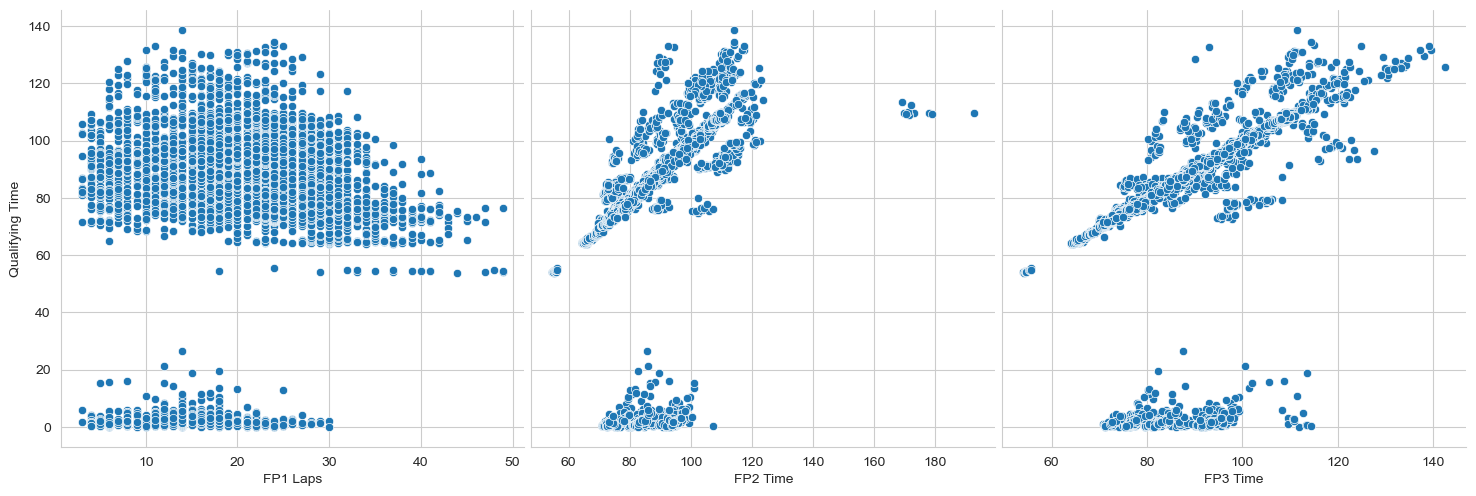

In [84]:
sns.pairplot(F1,
                y_vars = ['Qualifying Time'],
                x_vars = ['FP1 Laps', 'FP2 Time', 'FP3 Time'],
                height = 5)

plt.show()

In [89]:
filename = 'F1DataQual.csv'

In [90]:
F1.to_csv(filename, sep=',', index=False, encoding='utf-8')